________
<a id="top"></a>
# DS 7331 Data Mining: Section 407: Group 2 : Lab 2 iPython Notebook
Created On: February 27, 2019
### Authors:  
- Arora, Tanvi                
- Chandna, Rajat
- Henderson Kuns, Nicol
- Ramasundaram, Kumar
- Vasquez, James


# Classification Task 1

## Data Preparation Part 1

In [2]:
# Importing the needed modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)


# To display plots inside the iPython Notebook itself
%matplotlib inline

In [3]:
# To verify how data is orgainzed in file(to find the delimiter) and then
# use corresponding function to open the file. eg
# data could be in .csv. .tsv, excel format etc.
pathOfDataFile = "data/bank-full.csv"
firstFewLines = list()
noOfLinesToView = 5

with open(pathOfDataFile) as dataFile:
    firstFewLines = [next(dataFile) for i in range(noOfLinesToView)]
    for line in firstFewLines:
        print(line)

"age";"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"

58;"management";"married";"tertiary";"no";2143;"yes";"no";"unknown";5;"may";261;1;-1;0;"unknown";"no"

44;"technician";"single";"secondary";"no";29;"yes";"no";"unknown";5;"may";151;1;-1;0;"unknown";"no"

33;"entrepreneur";"married";"secondary";"no";2;"yes";"yes";"unknown";5;"may";76;1;-1;0;"unknown";"no"

47;"blue-collar";"married";"unknown";"no";1506;"yes";"no";"unknown";5;"may";92;1;-1;0;"unknown";"no"



In [4]:
# Import the semi-colon delimited data file into pandas dataFrame
bankPromo_df = pd.read_csv(pathOfDataFile, sep = ";")

# Rename the Target/Final Outcome column from "y" to "Subscribed" as based on data description.
bankPromo_df = bankPromo_df.rename(columns={"y":"Subscribed"})

bankPromo_df.head(7)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no


In [5]:
bankPromo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age           45211 non-null int64
job           45211 non-null object
marital       45211 non-null object
education     45211 non-null object
default       45211 non-null object
balance       45211 non-null int64
housing       45211 non-null object
loan          45211 non-null object
contact       45211 non-null object
day           45211 non-null int64
month         45211 non-null object
duration      45211 non-null int64
campaign      45211 non-null int64
pdays         45211 non-null int64
previous      45211 non-null int64
poutcome      45211 non-null object
Subscribed    45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
bankPromo_df.isnull().any()

age           False
job           False
marital       False
education     False
default       False
balance       False
housing       False
loan          False
contact       False
day           False
month         False
duration      False
campaign      False
pdays         False
previous      False
poutcome      False
Subscribed    False
dtype: bool

**As all the missing/unknown values in the dataset have been accounted already. Our dataset contains no missing values.**

In [7]:
# To find duplicated rows in data Frame
bankPromo_df.duplicated().any()

False

**There are no duplicate values for any observations/rows in our data set.**

In [8]:
# Get the unique values(Levels) for categorical variables.
# List to hold names of categorical variables
categoricalVars = list()
# List to hold names of numerical variables
numericalVars = list()

for colName in bankPromo_df.columns:
    if bankPromo_df[colName].dtype == np.int64:
        numericalVars.append(colName)
    elif bankPromo_df[colName].dtype == np.object:
        categoricalVars.append(colName)
    else:
        pass
    
# Remove Target column from final categorical Var list
categoricalVars.remove('Subscribed')

print(numericalVars)
print(categoricalVars)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


________________________________________________________________________________________________________
### Perform One Hot Encoding for categorical variables in dataset

In [9]:
# Make a copy of original data frame
bankPromoModel_Df = bankPromo_df.copy()
bankPromoModel_Df['Target'] = bankPromoModel_Df['Subscribed'].apply(lambda resp : 1 if resp == "yes" else 0)
bankPromoModel_Df['Target'] = bankPromoModel_Df['Target'].astype(np.int)
# Delete the original 'Subscribed' column
del bankPromoModel_Df['Subscribed']





In [10]:
# Covert all categorical variables to corresponding indicator variables
for categoricalVar in categoricalVars:
    tmpDf = pd.DataFrame()
    # Remove 1st class level to avoid multicollinearity
    tmpDf = pd.get_dummies(bankPromoModel_Df[categoricalVar], prefix=categoricalVar, drop_first=True)
    bankPromoModel_Df = pd.concat((bankPromoModel_Df, tmpDf), axis=1)

# Now remove the original categorical vars since indicator variables are created from them.
bankPromoModel_Df.drop(categoricalVars, inplace=True, axis=1)
bankPromoModel_Df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
age                    45211 non-null int64
balance                45211 non-null int64
day                    45211 non-null int64
duration               45211 non-null int64
campaign               45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
Target                 45211 non-null int64
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
job_unknown            45211 non-null uint8
marital_married        45211 non-null uint8
marital_sin

In [11]:
### Seperate the class and predictor variables
if 'Target' in bankPromoModel_Df:
    y = bankPromoModel_Df['Target'].values # get the labels we want
    del bankPromoModel_Df['Target']        # get rid of the class label
    X = bankPromoModel_Df.values  

### Feature Elimination Using Lasso Logistic Regression 

Although our dataset doesnot have very high dimensionality, we would try to eliminate any features that are not useful to our task of classification. For this purpose, we would reuse the grid parameters that we obtained during Mini Lab assignment on the same dataset and then using that model, choose which features could be eliminated. The Grid parameters were obtained after 5 Fold Shuffle Split CV process. This 5 Fold Shuffle Split CV process is ONLY done to obtain logistic model for feature elimination. Later, for all Model building and validation, a 10 Fold Shuffle Split/KFold cross validation method is used. 

contact_unknown has weight of -0.6597315984958265
housing_yes has weight of -0.364837856042494
month_jul has weight of -0.318203764590302
month_may has weight of -0.2584637916413089
campaign has weight of -0.25795599972949423
month_aug has weight of -0.24537494097298698
month_nov has weight of -0.21237240999934962
loan_yes has weight of -0.18028932771331468
month_jan has weight of -0.17433524557762353
job_blue-collar has weight of -0.09690184567558643
poutcome_unknown has weight of -0.08376379509723139
marital_married has weight of -0.07058223958471573
job_housemaid has weight of -0.04149136012147627
job_services has weight of -0.02375670285655495
job_entrepreneur has weight of -0.02116010632413146
job_self-employed has weight of -0.019972719427760327
job_unknown has weight of -0.003909140346890532
age has weight of 0.0
contact_telephone has weight of 0.0
default_yes has weight of 0.0
job_management has weight of 0.0
job_technician has weight of 0.0
job_unemployed has weight of 0.0
mon

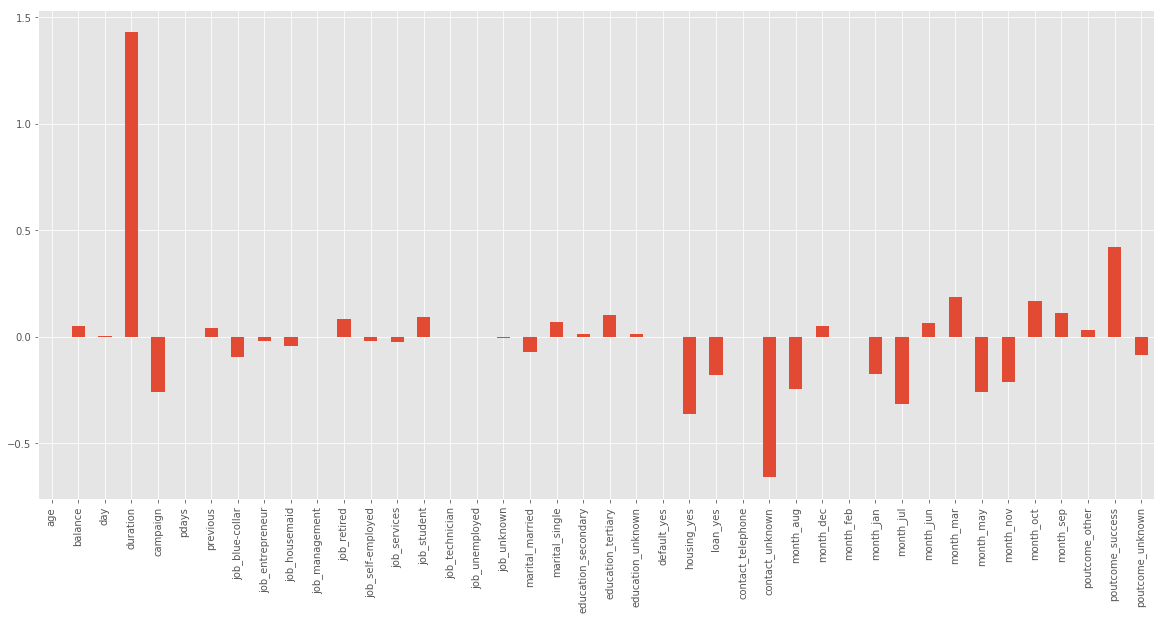

In [12]:
### Create a Logistic Lasso Model based upon Grid Search Parameters obtained in Mini Lab.
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

logisticModel = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', C=0.009102981779915217,\
                                                                   class_weight='balanced', random_state=999, \
                                                                   solver='liblinear'))
logisticModel.fit(X,y) 
classifier_model = logisticModel.named_steps['logisticregression']
# sort these attributes and spit them out
zip_vars = zip(classifier_model.coef_.T, bankPromoModel_Df.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0])

plt.style.use('ggplot')
plt.figure(figsize=(20,9))
weights = pd.Series(classifier_model.coef_[0],index=bankPromoModel_Df.columns)
weights.plot(kind='bar')
plt.show()

As seen above, from results of Lasso Logistic Model with degree = 1 that following features( with coff. = 0) can be eliminated. Next, we will explore them one by one:

age has weight of 0.0  
contact_telephone has weight of 0.0   
default_yes has weight of 0.0    
job_management has weight of 0.0     
job_technician has weight of 0.0    
job_unemployed has weight of 0.0   
month_feb has weight of 0.0     
pdays has weight of 0.0    


Out of the features selected for elimination: job_ related, month_ related and contact_ related variables are levels of categorical variables. And some of the levels of these categorical variables are also have been found important for the model. So, if we remove these levels then whole corresponding categorical variable and all its level would be requried to be removed. **But since many of the levels of these categorical variables have been identified as important, we would keep corresponding whole categorical variables with all levels. Next we look at remaining "age", "default" and pdays variables.**

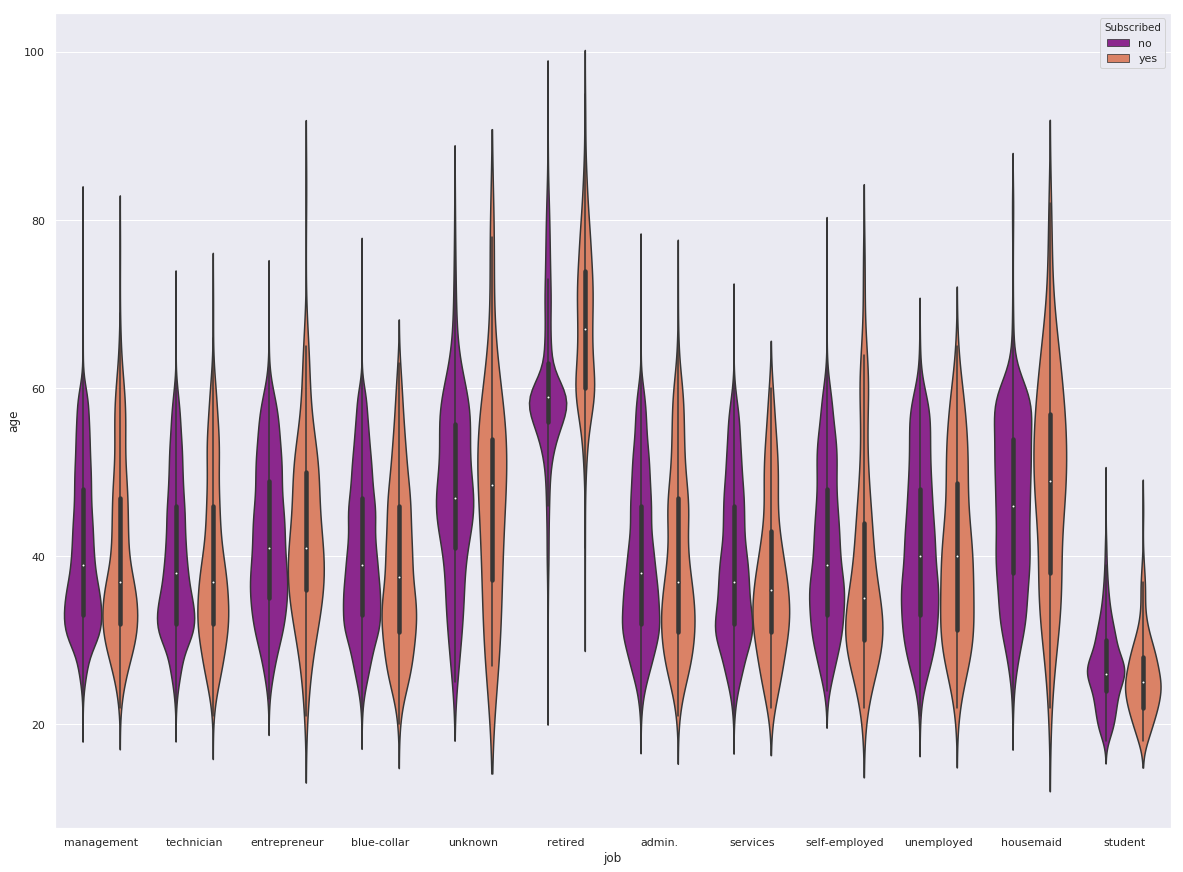

In [13]:
### Next we look at Age variable
sns.set(style="darkgrid")
fig1, ax_ageVar = plt.subplots(figsize = (20,15))
sns.violinplot(data = bankPromo_df, x = "job", y = "age", hue="Subscribed", \
               palette="plasma")

Although "age" has not been identified as an important feature by degree = 1 logistic lasso model( not covering feature interactions), our EDA reveals that there could be interaction between age and job variables with respect to class variable in that:
1. People who are retired from their job and have median age around 70 are more likely to subscribe to the promotion than group of retired people who have median age less than 60. This could very well be likely that as people get older they want to save more for inheritance purposes or for future medical expenditures.
2. Older housemaids are more likely to subscribe to the bank promotion than relatively younger housemaids.
3. Self employed people less than 40 years of age are more likely to subscribe to the promotion than people who are self employed but more than 40 years of age.

**Since such interactions would not have been captured by degree = 1 model, based on the EDA, we would keep "age" variable in our dataset**

Next we look at "default" variable    
In the realm of our business case, **we would keep "default" variable in our dataset** since based upon intuition, simillar interactions of "default" variable with other variables in our dataset could be significant such as people who have defaulted and are older would be less likely to open savings account because of their financial and health conditions.

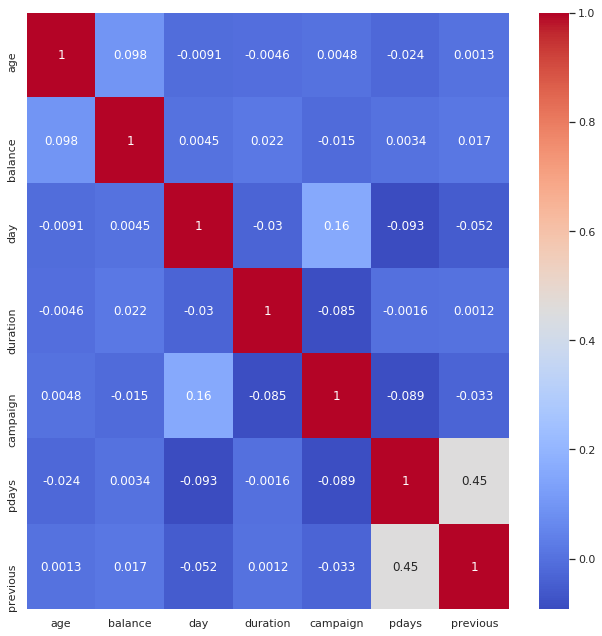

In [14]:
### Next we look at "pDays" variable
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(bankPromo_df.corr(), cmap="coolwarm", annot=True)
f.tight_layout()

As seen from above heatmap that "pDays" variable is moderately correlated with "previous" variable( r = 0.45) and our model predicts that this "pdays" variable is not important for our classification task, hence **we would eliminate this pDays variable from our dataset for model building.**

In [15]:
# Drop the pDays feature as it had high correlation with "previous" feature
del bankPromoModel_Df['pdays']


### Summary and Objectives tracking for section:  Data Preparation Part 1
Define and prepare your class variables.  
// "Subscribed" variable is identified and prepared as class variable.  

Use proper variable representations (int, float, one-hot, etc.).       
// As can be seen from above code, all the numericals variables have been appropriatly represented in the dataset and all categorical variables have been encoded using one-hot encoding.

Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc.      
// Scaling of the variables would be later performed before model preparation using pipeline which would first scale the variables before fitting them to model. Since, our data is not that high dimensional in feature space, hence no dimensionality reduction technique was performed. Rest all pre-processing was performed.      

Remove variables that are not needed/useful for the analysis.     
// Non important feature "pDays" was identified and eliminated using lasso shrinkage via logistic model.

## Data Preparation Part 2

In [16]:
bankPromoModel_Df.describe()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,0.580323,0.215257,0.032890,0.027427,0.209197,...,0.152507,0.118135,0.010551,0.304483,0.087810,0.016323,0.012807,0.040698,0.033421,0.817478
std,10.618762,3044.765829,8.322476,257.527812,3.098021,2.303441,0.411005,0.178351,0.163326,0.406740,...,0.359516,0.322771,0.102174,0.460193,0.283022,0.126718,0.112441,0.197592,0.179735,0.386278
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,275.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
display(bankPromoModel_Df.info())
# Removing pDays for test array also
X = bankPromoModel_Df.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 41 columns):
age                    45211 non-null int64
balance                45211 non-null int64
day                    45211 non-null int64
duration               45211 non-null int64
campaign               45211 non-null int64
previous               45211 non-null int64
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
job_unknown            45211 non-null uint8
marital_married        45211 non-null uint8
marital_single         45211 non-null uint8
education_secondary    45211 non-null uint8
education_t

None

**So we would use above 41 predictors to create and validate our models; and variable "Subscribed" has been renamed to Target variable and would be used as class label.** The description of these variables is as:

- **Age** – Age is a numeric variable that ranges from ages 18-95 years.  
- **Job** – Job type is a categorical variable that entered the client into types of occupations.  The choices were: admin., unknown, unemployed, management, housemaid, entrepreneur, student, blue-collar, self-employed, retired, technician and services.  
- **Marital** – Marital status is a categorical variable that describes if the client is married, divorced or single.  For widowed clients, the bank has selected the divorced selection.
- **Education** – Education represents the client’s highest level of education.  The categorical variable has the following selections:  unknown, primary, secondary or tertiary.  Primary level is equivalent to the US elementary and middle school grades.  Secondary is similar to the US high school, but is split between more professional teachings versus vocations.  Tertiary level represents all level of higher education from special licenses, bachelors to post doctorate school (https://www.scholaro.com/pro/Countries/Portugal/Education-System).
- **Default** – Default represents if the client has defaulted in their credit history as a binary variable denoted with yes for default or no for no default.
- **Balance** – Balance is a numeric variable which signifies the yearly average balance in Euros.
- **Housing** – Housing is a binary variable which represents if the client has a home loan or not.  The selections are yes or no.
- **Loan** – Loan is similar to the housing variable except it represents if the client has a personal loan.
- **Contact** – Contact is a categorical variable describing the method of telecommunication between the bank and the client.  The selections are:  unknown, telephone or cellular.
- **Day** – Day is a numeric variable that represents the day of the month of the last contact.
- **Month** – Month is represented as a categorical variable where each month is denoted by the first three letters.  Every month of the year is represented.  The month corresponds to the last contact made with the client.
- **Duration** – Duration is the amount of time (a numeric variable) in seconds that the last contact with the client lasted.  This attribute is not the total time the clients were interviewed.     
- **Campaign** – Campaign is a numeric variable which represents the number of times the bank has contacted, using any method of communication, the client during this particular marketing campaign.
- **Previous** – Previous is a numeric variable that identifies the number of times a client has been involved with a marketing campaign with this bank prior to the current campaign. 
- **pOutcome** – pOutcome represents the outcome of a previous marketing campaign.  The categorical variable is identified by:  unknown, other, failure or success.  Each client that has not participated in a previous marketing campaign has been marked as unknown for pOutcome.
- **Subscribed** – Y signifies yes if the customer accepted a term deposit during the current marketing campaign.  The binary variable is defined as yes or no.  In the remaining portions of the report, this variable is denoted as subscribed with the results remaining as yes or no. 


### Summary and Objectives tracking for section:  Data Preparation Part 2
Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).    
// The final dataset that is to be used for classification in Task 1 has been described as above. No new variables were created for this analysis.

## Modeling and Evaluation 1

Choose and explain your evaluation metrics that you will use (i.e., accuracy,
precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.

- Since our dataset is imbalanced with ~89% people called NOT subscribing to offer and only ~11% people subscribing to offer, a fairly dumb model (or unfitted model) would have the accuracy of 89% by just guessing class as NO. So just accuracy wouldn’t be a good performance metric for our model evaluation. Also in realm of our business problem, we would not like to misclassify people who really want to subscribe to promotion and open savings account(recall) as this would lead to revenue loss and on the other hand, we would also not want our model to give highly optimistic predictions for people who actually are not likely to subscribe to offer(precision), as this would lead to making high number of unnecessary calls, leading to wastage of resources in terms of time, effort and operating costs. Hence, we need to strike a balance between recall and precision values. For this purpose, we would like to **choose F1 Score that is harmonic mean of recall and precision values as our primary metric for evaluation of our models**.         
- **Another primary metric would be AuC scores** as accuracy is just calculated at threshold value of 0.5 in reality probability of people subscribing to a term deposit is not 50-50 and this data was collected at time of economic recession, so it’s very well likely that prior probabilities of subscribing vs not subscribing were not at 50-50 level. **Hence, AuC score (in conjunction to ROC curve) score which basically provides accuracies at different threshold values, would overall provide a better measure of model performance.**

- Next, we would like to use **recall** ( tpr / (tpr + fnr)) as evaluation metric for our models since, in realm of our business problem, increased false positive rate means that bank would be making some extra calls that would not yield positive result but since recall is high, model is less likely to miss people who actually want to subscribe to bank deposit. And, in realm of our business problem, false negative results have higher significance in terms of missed revenue than false positive results that result in higher operating costs.

- **Accuracy** will follow all the above-mentioned evaluation metrices for our model evaluation criterion.

## Modeling and Evaluation 2

Choose the method you will use for dividing your data into training and
testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why
your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time.

Since our dataset has a class imbalance, so using standard K-Fold cross validation wouldnot be appropriate for dividing our dataset into training and test sets as this CV technique wouldnot preserve respective class proportions.
So next we would explore **stratified 10-fold and stratified 10-fold Shuffle Split** as possible Cross validation techniques for dividing our dataet into training and testing splits.

In [18]:
from sklearn.model_selection import StratifiedKFold
# To use the cross validation object in scikit learn, we need to grab an instance
# of the object and set it up. This object will be able to split our data into 
# training and testing splits
num_cv_iterations = 10
stratifiedKfold_cv_object = StratifiedKFold(n_splits=num_cv_iterations, random_state=999)
                         
print(stratifiedKfold_cv_object)


StratifiedKFold(n_splits=10, random_state=999, shuffle=False)


In [19]:
## Next we would evaluate this CV technique using one or our possible SVC model

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

# Standardize the features first, since standardizing the features could lead to
# gradient desent algo to converge faster and then run SVM model

svmModel = make_pipeline(StandardScaler(), SVC(C=1.0, kernel='rbf', degree=3 , gamma='auto', random_state=999))
scores = cross_validate(svmModel, X, y=y, cv=stratifiedKfold_cv_object, n_jobs=-1, scoring=scoring)
display(pd.DataFrame(scores))

testCol = ['test_F1_Score', 'test_AUC', 'test_Accuracy', 'test_Precision', 'test_Recall' ]
trainCol = ['train_F1_Score', 'train_AUC', 'train_Accuracy', 'train_Precision', 'train_Recall' ]

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)


,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,103.072398,22.363425,0.026119,0.540348,0.889240,0.944899,0.884564,0.917545,1.000000,0.776684,0.013233,0.414286
1,120.745957,22.358980,0.007308,0.546727,0.370369,0.942571,0.819770,0.918823,0.010274,0.788287,0.005671,0.418487
2,101.994766,22.124689,0.051690,0.559631,0.455206,0.945343,0.788985,0.920324,0.054507,0.791699,0.049149,0.432773
3,98.398962,21.933471,0.050304,0.569840,0.393581,0.947252,0.757797,0.922045,0.046474,0.803749,0.054820,0.441387
4,100.405534,22.279854,0.144304,0.555252,0.580249,0.942971,0.850476,0.920079,0.218391,0.795455,0.107750,0.426471
5,95.374979,22.316624,0.197415,0.559253,0.503552,0.944690,0.848927,0.919931,0.260870,0.785334,0.158790,0.434244
6,95.064139,22.325191,0.166983,0.553717,0.575662,0.946234,0.805795,0.919145,0.167619,0.781394,0.166352,0.428782
7,83.732700,20.548586,0.032051,0.618125,0.208879,0.955003,0.398806,0.927820,0.019746,0.810986,0.085066,0.499370
8,84.764721,17.228545,0.260456,0.543772,0.609869,0.942091,0.827914,0.918801,0.261950,0.793312,0.258979,0.413655
9,68.230051,14.290260,0.292779,0.660222,0.723169,0.954828,0.525442,0.935219,0.177246,0.854521,0.840909,0.537912



 Mean values for Performance Metrices on Train Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.570689,0.946588,0.921973,0.798142,0.444737



 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.122941,0.530977,0.750848,0.221708,0.174072


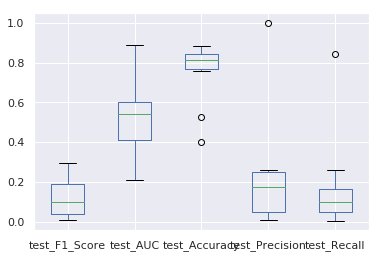

In [20]:
pd.DataFrame(scores)[testCol].boxplot()

In [21]:
## Now create a stratified Shuffle split CV object
from sklearn.model_selection import StratifiedShuffleSplit

num_cv_iterations = 10
stratified_cv_object = StratifiedShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.1, random_state=999)
                         
print(stratified_cv_object)

StratifiedShuffleSplit(n_splits=10, random_state=999, test_size=0.1,
            train_size=None)


In [22]:
## Next we fit same SVM model using 10 Fold Stratified Shuffle Split technique

scores = cross_validate(svmModel, X, y=y, cv=stratified_cv_object, n_jobs=-1, scoring=scoring)
display(pd.DataFrame(scores))

testCol = ['test_F1_Score', 'test_AUC', 'test_Accuracy', 'test_Precision', 'test_Recall' ]
trainCol = ['train_F1_Score', 'train_AUC', 'train_Accuracy', 'train_Precision', 'train_Recall' ]

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,101.824902,23.114928,0.417303,0.531750,0.908562,0.941528,0.898717,0.916636,0.638132,0.775362,0.310019,0.404622
1,98.953990,22.948467,0.407692,0.533407,0.902380,0.942467,0.897833,0.916587,0.633466,0.771679,0.300567,0.407563
2,116.094311,22.826712,0.417989,0.527909,0.917261,0.941210,0.902698,0.916439,0.696035,0.778460,0.298677,0.399370
3,117.582630,23.318922,0.457921,0.528076,0.915729,0.941518,0.903140,0.916759,0.663082,0.784030,0.349716,0.398109
4,100.900115,23.014336,0.487745,0.527029,0.919111,0.941848,0.907563,0.915923,0.693380,0.770724,0.376181,0.400420
5,125.971514,23.034063,0.464516,0.524649,0.917543,0.941426,0.908226,0.915874,0.731707,0.773863,0.340265,0.396849
6,129.346598,22.869948,0.449032,0.529346,0.906563,0.942651,0.905573,0.916833,0.707317,0.783128,0.328922,0.399790
7,105.775184,23.329791,0.398977,0.530274,0.904165,0.941959,0.896064,0.916488,0.616601,0.775263,0.294896,0.402941
8,90.995323,17.505491,0.449749,0.533352,0.908160,0.942342,0.903140,0.916955,0.670412,0.778315,0.338374,0.405672
9,86.817166,17.418546,0.424242,0.529469,0.906373,0.942125,0.899160,0.916611,0.638783,0.778866,0.317580,0.401050



 Mean values for Performance Metrices on Train Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.529526,0.941907,0.916511,0.776969,0.401639



 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.437517,0.910585,0.902211,0.668892,0.32552


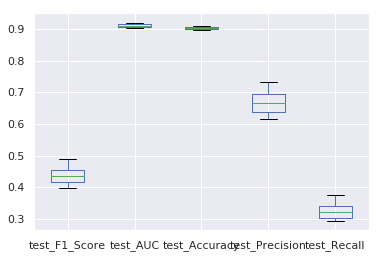

In [23]:
pd.DataFrame(scores)[testCol].boxplot()

As seen from above results, the results obtained via standard 10 Fold Stratified CV are having very high variations across different test/train Splits and have some outlier results for certain folds whereas results obtained via  10 Fold Stratified Shuffle CV are must more consistent. This could be due the fact that standard K fold are getting really hard to classify samples in some fold, compounded by overall class imbalance in our dataset as each test split would be only having **~450 obervations from minority class, this could lead to bias in certain folds**. **Since, 10 Fold Stratified Shuffle split has yielded more consistent results, we would go ahead and use this CV technique for dividing our dataset in test and train splits.**

Finally, since we have choosen 10 Fold Stratified Shuffle split as our CV strategy, we would like to go ahead and compare 10 Fold Stratified Shuffle split with 90/10 Split vs 80/20 Split. As we want to have **test splits approx ~1K minority class instances so as to reduce chances of bias.**  

In [24]:
## Now create a stratified Shuffle 80/20 split CV object
from sklearn.model_selection import StratifiedShuffleSplit

num_cv_iterations = 10
stratified_cv_object = StratifiedShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2, random_state=999)
                         
print(stratified_cv_object)

StratifiedShuffleSplit(n_splits=10, random_state=999, test_size=0.2,
            train_size=None)


In [25]:
## Next we fit same SVM model using 10 Fold Stratified Shuffle 80/20 Split technique

scores = cross_validate(svmModel, X, y=y, cv=stratified_cv_object, n_jobs=-1, scoring=scoring)
display(pd.DataFrame(scores))

testCol = ['test_F1_Score', 'test_AUC', 'test_Accuracy', 'test_Precision', 'test_Recall' ]
trainCol = ['train_F1_Score', 'train_AUC', 'train_Accuracy', 'train_Precision', 'train_Recall' ]

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,76.691545,40.591886,0.442489,0.536374,0.905848,0.943094,0.901913,0.917358,0.660413,0.780235,0.332703,0.408650
1,80.212508,40.243458,0.409762,0.533934,0.908474,0.942348,0.898374,0.917026,0.639279,0.778533,0.301512,0.406287
2,85.349567,41.708889,0.460468,0.522341,0.910840,0.942594,0.905673,0.916058,0.695985,0.781176,0.344045,0.392342
3,75.817598,41.417710,0.442467,0.534931,0.903748,0.942832,0.903019,0.917358,0.675728,0.782787,0.328922,0.406287
4,75.729189,40.722151,0.447059,0.526694,0.905101,0.943542,0.901250,0.916169,0.648115,0.775632,0.341210,0.398724
5,83.955038,41.201207,0.443450,0.525689,0.911227,0.940267,0.903682,0.916280,0.684418,0.779378,0.327977,0.396597
6,74.370531,41.144802,0.434286,0.535808,0.900787,0.944734,0.901471,0.917026,0.661509,0.775291,0.323251,0.409359
7,81.878769,41.281557,0.431423,0.527187,0.909024,0.941691,0.902355,0.916335,0.676768,0.777778,0.316635,0.398724
8,62.996238,30.760840,0.458831,0.529183,0.901194,0.943467,0.904788,0.916363,0.684803,0.774840,0.344991,0.401796
9,66.775756,30.612675,0.434069,0.529936,0.901098,0.942322,0.900807,0.916860,0.652751,0.782548,0.325142,0.400615



 Mean values for Performance Metrices on Train Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.530208,0.942689,0.916683,0.77882,0.401938



 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.44043,0.905734,0.902333,0.667977,0.328639


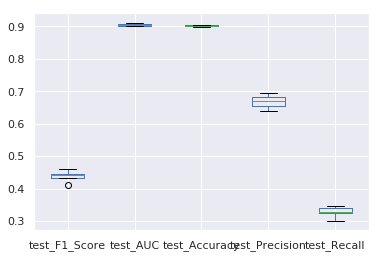

In [26]:
pd.DataFrame(scores)[testCol].boxplot()

As seen above, variation in test results obtained via 10 Fold Stratified Shuffle split 80/20 Split is slighty smaller than those obtained via 90/10 split. Hence, considering all the results obtained avove, we will use **10 Fold Stratified Shuffle split 80/20 Split** as our choice for Cross validation for our dataset.

## Modeling and Evaluation 3

Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!

Our general strategy to this task would be to:
- First fit the model with parameters values as defaults as provided by scikit-learn.
- Second run either a randomized grid search over larger range of there parameters and then run full grid searches near the best values as obtained from randomized grid searches( as done for SVM and Random Forest Model) or tune the parameters in serial fashion with running grid searches for individual or couple of parameters at once and then run a random grid search to compare results( as done for XGBoost algorithm)
- Fit the model with best score to dataset and obtain metrices for model performance evaluation.



### Simple SVM Model Fit

In [54]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

# Standardize the features first, since standardizing the features could lead to
# gradient desent algo to converge faster and then run SVM model

svmModel = make_pipeline(StandardScaler(), SVC(C=1.0, kernel='rbf', degree=3 , gamma='auto', random_state=999))
scores = cross_validate(svmModel, X, y=y, cv=stratified_cv_object, n_jobs=-1, scoring=scoring)
display(pd.DataFrame(scores))

testCol = ['test_F1_Score', 'test_AUC', 'test_Accuracy', 'test_Precision', 'test_Recall' ]
trainCol = ['train_F1_Score', 'train_AUC', 'train_Accuracy', 'train_Precision', 'train_Recall' ]

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

svmInitialModelCVTestResults = pd.DataFrame(scores)[testCol].copy()

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,78.710455,39.839801,0.442489,0.536374,0.905848,0.943094,0.901913,0.917358,0.660413,0.780235,0.332703,0.408650
1,76.341583,39.786597,0.409762,0.533934,0.908474,0.942348,0.898374,0.917026,0.639279,0.778533,0.301512,0.406287
2,78.602246,39.920496,0.460468,0.522341,0.910840,0.942594,0.905673,0.916058,0.695985,0.781176,0.344045,0.392342
3,76.932224,39.963490,0.442467,0.534931,0.903748,0.942832,0.903019,0.917358,0.675728,0.782787,0.328922,0.406287
4,77.755981,40.248206,0.447059,0.526694,0.905101,0.943542,0.901250,0.916169,0.648115,0.775632,0.341210,0.398724
5,83.955376,41.178099,0.443450,0.525689,0.911227,0.940267,0.903682,0.916280,0.684418,0.779378,0.327977,0.396597
6,77.484801,40.411924,0.434286,0.535808,0.900787,0.944734,0.901471,0.917026,0.661509,0.775291,0.323251,0.409359
7,77.278801,39.907014,0.431423,0.527187,0.909024,0.941691,0.902355,0.916335,0.676768,0.777778,0.316635,0.398724
8,63.190586,30.906670,0.458831,0.529183,0.901194,0.943467,0.904788,0.916363,0.684803,0.774840,0.344991,0.401796
9,67.825993,31.092156,0.434069,0.529936,0.901098,0.942322,0.900807,0.916860,0.652751,0.782548,0.325142,0.400615



 Mean values for Performance Metrices on Train Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.530208,0.942689,0.916683,0.77882,0.401938



 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.44043,0.905734,0.902333,0.667977,0.328639


**As we can see from above performace metrices that model is not performing very well as in terms of overall F1 Score, also we see that its not able to identify people who actually subscribed to offer( recall) about 33% of times. Model Accuracy is about 90% but since we class imbalance of around 89% No to 11% Yes, an underfitting model would have accuracy near 89%. Hence we would tune the model to see if we can gain on F1 Score and overall AuC**  

In [81]:
# Since we have class imbalance and we are not explicely oversampling from minority class, we would first adjust the 
# class_weight parameter

svmModel = make_pipeline(StandardScaler(), SVC(C=1.0, kernel='rbf', degree=3 , gamma='auto',class_weight="balanced", random_state=999))

scores = cross_validate(svmModel, X, y=y, cv=stratified_cv_object, n_jobs=-1, scoring=scoring)

display(pd.DataFrame(scores))

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)


,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,127.387424,47.197426,0.565231,0.618541,0.917354,0.951077,0.842641,0.865295,0.417607,0.462475,0.874291,0.933585
1,106.341098,46.980860,0.574226,0.615540,0.918856,0.950382,0.850934,0.863470,0.431214,0.458957,0.859168,0.934294
2,108.470454,47.410843,0.563450,0.614334,0.923069,0.949960,0.844410,0.862530,0.419400,0.457222,0.858223,0.935949
3,124.345891,47.858464,0.569612,0.616824,0.922687,0.949735,0.850271,0.864106,0.429119,0.460214,0.846881,0.935004
4,119.371728,46.830678,0.557196,0.617228,0.916606,0.950806,0.840761,0.863996,0.412944,0.460093,0.856333,0.937367
5,123.859952,48.356327,0.575558,0.616045,0.926412,0.949458,0.850603,0.863968,0.431059,0.459863,0.865784,0.932876
6,123.965903,46.313679,0.565765,0.621253,0.912692,0.951827,0.847396,0.866567,0.424057,0.465045,0.849716,0.935476
7,109.477986,47.203012,0.569221,0.616609,0.922874,0.949332,0.845848,0.864189,0.422865,0.460319,0.870510,0.933585
8,124.397591,46.455384,0.567192,0.617201,0.918168,0.950508,0.848280,0.863775,0.425663,0.459722,0.849716,0.938785
9,108.905928,46.979444,0.561512,0.619668,0.919971,0.950812,0.843525,0.865904,0.417704,0.463678,0.856333,0.933822



 Mean values for Performance Metrices on Train Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.617324,0.95039,0.86438,0.460759,0.935074



 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.566896,0.919869,0.846467,0.423163,0.858696


As we see after this tuning, overall **F1 Score increased from about 0.44 to 0.57**. **AuC score improved from 90% to 92%. Recall improved significantly from 33% to nearly 86%.** Accuracy and Precision have dropped a bit but that could be because with higher weights attached to misclassifying minority class, model is really trying hard to not misclassify minority class instances and this is leading to more false positives. Hence, precision and accuracy could have suffered a little. Next we will tune rest of the hyperparameters using randomized and full grid searches.

________________________________________________________________________________________________________

### Tuning The Model Hyper Parameters for SVM Using Grid Search


In [31]:
########## Random Search SVM Model with RbF kernel ############################

## Param Grid for SVM. 
param_grid = {
    'svc__kernel' : ['rbf'],
   'svc__C' : np.logspace(-10, 2, 5),
   'svc__degree' : [1,2,3],
   'svc__gamma': np.logspace(-9, 3, 5)}

print(param_grid)


{'svc__kernel': ['rbf'], 'svc__C': array([1.e-10, 1.e-07, 1.e-04, 1.e-01, 1.e+02]), 'svc__degree': [1, 2, 3], 'svc__gamma': array([1.e-09, 1.e-06, 1.e-03, 1.e+00, 1.e+03])}


Since our SVM model with kermel trick involves nearly 45K different features, its really computationally expensive and takes long time to fit. Hence, these random grid searches on SVM model are performed as 5 Fold Stratified Shuffle in place of  5 Fold Stratified Shuffle. This is only done for Grid Searches, final SVM model would be cross validated using  10 Fold Stratified Shuffle CV only

In [32]:
from sklearn.model_selection import RandomizedSearchCV
#################################
# Random Search Training
#################################

# Use the random grid to search for best hyperparameters
# First create the base model to tune
SvmRandomGridEst = make_pipeline(StandardScaler(), SVC(random_state=999, class_weight = 'balanced'))

# Random search of parameters, using 10 fold cross validation,
# search across 200 different combinations, and use all available cores
svm_randomgrid = RandomizedSearchCV(estimator = SvmRandomGridEst, param_distributions = param_grid,
                                  n_iter = 75,
                                  cv = StratifiedShuffleSplit(n_splits=5, test_size  = 0.2, random_state=999),
                                  verbose=2,
                                  random_state=999,
                                  n_jobs = -1,
                                  scoring=scoring,
                                  refit='F1_Score', \
                                  return_train_score=True)


# Fit the random search model
svm_randomgrid.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
     % (svm_randomgrid.best_params_, svm_randomgrid.best_score_))

Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed: 111.7min
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed: 285.0min
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed: 329.8min finished


The best parameters are {'svc__kernel': 'rbf', 'svc__gamma': 0.001, 'svc__degree': 1, 'svc__C': 100.0} with a score of 0.57


In [60]:
svmModel = make_pipeline(StandardScaler(), SVC(C=100.0, kernel='rbf', degree=1 , gamma=0.001,class_weight="balanced", random_state=999))

scores = cross_validate(svmModel, X, y=y, cv=stratified_cv_object, n_jobs=-1, scoring=scoring)

display(pd.DataFrame(scores))

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)


,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,130.835131,61.690421,0.557367,0.591224,0.918415,0.937559,0.837886,0.853185,0.409494,0.438406,0.872401,0.907587
1,130.025232,61.676337,0.569839,0.586344,0.920776,0.937084,0.846069,0.849923,0.423324,0.432685,0.871456,0.909241
2,130.695007,62.748144,0.565681,0.583302,0.926927,0.936071,0.842420,0.848347,0.417454,0.429803,0.877127,0.907351
3,129.228486,61.802166,0.575853,0.587006,0.924584,0.936629,0.851598,0.850254,0.432574,0.433300,0.861059,0.909714
4,130.995886,61.687413,0.560219,0.589441,0.919888,0.937311,0.840097,0.851637,0.413004,0.435796,0.870510,0.910423
5,131.905218,63.069471,0.574684,0.585086,0.930700,0.935589,0.847285,0.850006,0.426222,0.432497,0.881853,0.904042
6,129.431080,60.240617,0.561187,0.590303,0.917554,0.938076,0.842972,0.853047,0.416896,0.438000,0.858223,0.904987
7,130.503402,61.943078,0.573972,0.585269,0.923805,0.936494,0.846511,0.849453,0.425000,0.431782,0.883743,0.908060
8,130.685878,61.132682,0.564516,0.588918,0.921497,0.937047,0.844742,0.851084,0.420129,0.434900,0.860113,0.911841
9,129.975041,61.435836,0.564965,0.586246,0.921109,0.936782,0.842641,0.849784,0.417533,0.432472,0.873346,0.909714



 Mean values for Performance Metrices on Train Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.587314,0.936864,0.850672,0.433964,0.908296



 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.566828,0.922525,0.844222,0.420163,0.870983


In [27]:
## Running small grid with RBf 

param_grid = {
    'svc__kernel' : ['rbf'],
   'svc__C' : [50, 100, 150, 200],
   'svc__degree' : [1],
   'svc__gamma': [0.001, 0.0001, 0.00001]}

print(param_grid)


{'svc__kernel': ['rbf'], 'svc__C': [50, 100, 150, 200], 'svc__degree': [1], 'svc__gamma': [0.001, 0.0001, 1e-05]}


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Create grid search object

grid = GridSearchCV(make_pipeline(StandardScaler(), SVC(class_weight='balanced', random_state=999)), \
                   param_grid = param_grid, cv = StratifiedShuffleSplit(n_splits=5, test_size  = 0.2, random_state=999), \
                   verbose=2, n_jobs=-1, scoring=scoring, refit='F1_Score', \
                   return_train_score=True)

grid.fit(X, y=y)


print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  60 | elapsed: 13.8min remaining: 18.0min
[Parallel(n_jobs=-1)]: Done  57 out of  60 | elapsed: 14.9min remaining:   46.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 15.2min finished


The best parameters are {'svc__C': 150, 'svc__degree': 1, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'} with a score of 0.57


In [29]:
svmModel = make_pipeline(StandardScaler(), SVC(C=150.0, kernel='rbf', degree=1 , gamma=0.001,class_weight="balanced", random_state=999))

scores = cross_validate(svmModel, X, y=y, cv=stratified_cv_object, n_jobs=-1, scoring=scoring)

display(pd.DataFrame(scores))

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,120.431242,46.900541,0.559081,0.594620,0.917528,0.939229,0.838660,0.854595,0.410928,0.441203,0.874291,0.911605
1,120.476676,47.094972,0.572491,0.590791,0.920357,0.938491,0.847396,0.852079,0.425806,0.436730,0.873346,0.912787
2,121.190363,47.935254,0.569240,0.586648,0.926796,0.937645,0.844521,0.850033,0.421124,0.432910,0.878072,0.909714
3,122.237972,47.546404,0.574771,0.590666,0.923938,0.938016,0.851266,0.852079,0.431829,0.436701,0.859168,0.912314
4,119.611658,47.112317,0.561169,0.593776,0.919514,0.938885,0.840540,0.853821,0.413824,0.439891,0.871456,0.913259
5,121.894123,48.388288,0.575131,0.588226,0.930176,0.937123,0.847728,0.851277,0.426935,0.435009,0.880907,0.908060
6,121.000511,46.472513,0.561058,0.594503,0.917666,0.939635,0.842198,0.854374,0.415869,0.440854,0.862004,0.912550
7,120.031012,47.097718,0.572311,0.588936,0.923658,0.937987,0.846953,0.851056,0.425161,0.434866,0.875236,0.912078
8,118.346209,46.861904,0.564214,0.592083,0.921480,0.938678,0.845405,0.852411,0.420930,0.437493,0.855388,0.915623
9,120.861957,47.322799,0.565576,0.591027,0.920893,0.938322,0.842862,0.851803,0.417985,0.436394,0.874291,0.915386



 Mean values for Performance Metrices on Train Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.591128,0.938401,0.852353,0.437205,0.912338



 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.567504,0.922201,0.844753,0.421039,0.870416


As we see from results above Random Grid search and subsequent grid search didnt produce evaluation metrices that are significantly different from initial model with class_weight param = balanced. Next we will try to explore Grid search with "poly" kernel

In [31]:
########## Grid Search SVM Model with Poly Kernel ############################

## Param Grid for SVM
param_grid = {
     'svc__kernel' : ['poly'],
    'svc__C' : [0.1, 1, 10],
    'svc__degree' : [1,2,3],
    'svc__gamma': [0.001, 0.0001]}

print(param_grid)

{'svc__kernel': ['poly'], 'svc__C': [0.1, 1, 10], 'svc__degree': [1, 2, 3], 'svc__gamma': [0.001, 0.0001]}


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Create grid search object

grid = GridSearchCV(make_pipeline(StandardScaler(), SVC(class_weight='balanced', random_state=999)), \
                   param_grid = param_grid, cv = StratifiedShuffleSplit(n_splits=3, test_size  = 0.2, random_state=999), \
                   verbose=2, n_jobs=-1, scoring=scoring, refit='F1_Score', \
                   return_train_score=True)

grid.fit(X, y=y)


print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  54 | elapsed: 13.3min remaining: 52.0min
[Parallel(n_jobs=-1)]: Done  39 out of  54 | elapsed: 26.7min remaining: 10.3min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed: 27.9min finished


The best parameters are {'svc__C': 0.1, 'svc__degree': 1, 'svc__gamma': 0.001, 'svc__kernel': 'poly'} with a score of 0.57


In [40]:
## Fitting the above obtained params
svmModel = make_pipeline(StandardScaler(), SVC(C=0.1, kernel='poly', degree=1 , gamma=0.001,class_weight="balanced", random_state=999))

scores = cross_validate(svmModel, X, y=y, cv=stratified_cv_object, n_jobs=-1, scoring=scoring)

display(pd.DataFrame(scores))

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,141.201927,70.350298,0.563579,0.566999,0.908131,0.908926,0.862988,0.867950,0.449186,0.459921,0.756144,0.739069
1,138.816497,70.127580,0.568713,0.567453,0.906438,0.909257,0.869512,0.867645,0.463647,0.459333,0.735350,0.742141
2,139.660727,70.567479,0.569176,0.564208,0.911232,0.907745,0.867080,0.865074,0.458430,0.453423,0.750473,0.746632
3,137.213453,69.766051,0.560263,0.566370,0.909851,0.908461,0.866858,0.866595,0.456548,0.456932,0.724953,0.744741
4,137.255610,70.992572,0.573381,0.565535,0.909031,0.908777,0.868849,0.866650,0.462834,0.456914,0.753308,0.741905
5,135.852882,69.392960,0.581871,0.564708,0.915107,0.907003,0.873493,0.867480,0.474374,0.458555,0.752363,0.734814
6,136.521705,69.768229,0.547191,0.571873,0.901069,0.910394,0.863651,0.870631,0.447447,0.466557,0.704159,0.738596
7,136.878190,70.135313,0.555917,0.568480,0.904265,0.909483,0.864315,0.868198,0.450440,0.460681,0.725898,0.742141
8,137.499493,70.127971,0.559069,0.567108,0.905030,0.909416,0.865863,0.866235,0.454223,0.456299,0.726843,0.748996
9,135.323396,68.056515,0.555792,0.568867,0.903688,0.910085,0.861772,0.868364,0.445330,0.461098,0.739130,0.742378



 Mean values for Performance Metrices on Train Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.56716,0.908955,0.867482,0.458971,0.742141



 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.563495,0.907384,0.866438,0.456246,0.736862


In [33]:
## Param Grid for SVM
param_grid = {
     'svc__kernel' : ['poly'],
    'svc__C' : [0.001,0.01,0.1],
    'svc__degree' : [1],
    'svc__gamma': [0.001, 0.01, 0.1]}

print(param_grid)

{'svc__kernel': ['poly'], 'svc__C': [0.001, 0.01, 0.1], 'svc__degree': [1], 'svc__gamma': [0.001, 0.01, 0.1]}


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Create grid search object

grid = GridSearchCV(make_pipeline(StandardScaler(), SVC(class_weight='balanced', random_state=999)), \
                   param_grid = param_grid, cv = StratifiedShuffleSplit(n_splits=3, test_size  = 0.2, random_state=999), \
                   verbose=2, n_jobs=-1, scoring=scoring, refit='F1_Score', \
                   return_train_score=True)

grid.fit(X, y=y)


print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  27 | elapsed:  9.8min remaining: 12.3min
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 15.4min finished


The best parameters are {'svc__C': 0.001, 'svc__degree': 1, 'svc__gamma': 0.1, 'svc__kernel': 'poly'} with a score of 0.57


In [41]:
## Fitting the above obtained params
svmModel = make_pipeline(StandardScaler(), SVC(C=0.001, kernel='poly', degree=1 , gamma=0.1,class_weight="balanced", random_state=999))

scores = cross_validate(svmModel, X, y=y, cv=stratified_cv_object, n_jobs=-1, scoring=scoring)

display(pd.DataFrame(scores))

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,136.177562,66.498199,0.563579,0.566999,0.908131,0.908926,0.862988,0.867950,0.449186,0.459921,0.756144,0.739069
1,135.139211,69.999660,0.568713,0.567453,0.906438,0.909257,0.869512,0.867645,0.463647,0.459333,0.735350,0.742141
2,136.030056,71.175368,0.569176,0.564208,0.911232,0.907745,0.867080,0.865074,0.458430,0.453423,0.750473,0.746632
3,134.270393,68.729009,0.560263,0.566370,0.909851,0.908461,0.866858,0.866595,0.456548,0.456932,0.724953,0.744741
4,138.049599,70.124936,0.573381,0.565535,0.909031,0.908777,0.868849,0.866650,0.462834,0.456914,0.753308,0.741905
5,136.584269,70.884867,0.581871,0.564657,0.915108,0.907004,0.873493,0.867452,0.474374,0.458487,0.752363,0.734814
6,133.942000,68.250187,0.547191,0.571873,0.901069,0.910394,0.863651,0.870631,0.447447,0.466557,0.704159,0.738596
7,135.261135,69.879054,0.555716,0.568532,0.904265,0.909484,0.864204,0.868226,0.450176,0.460748,0.725898,0.742141
8,134.628268,71.568843,0.559069,0.567108,0.905030,0.909416,0.865863,0.866235,0.454223,0.456299,0.726843,0.748996
9,136.965549,69.356389,0.555792,0.568867,0.903688,0.910085,0.861772,0.868364,0.445330,0.461098,0.739130,0.742378



 Mean values for Performance Metrices on Train Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.56716,0.908955,0.867482,0.458971,0.742141



 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.563475,0.907384,0.866427,0.45622,0.736862


In [36]:
## Param Grid for SVM
param_grid = {
     'svc__kernel' : ['poly'],
    'svc__C' : [0.001,0.0001,0.00001],
    'svc__degree' : [1],
    'svc__gamma': [0.1,1,5]}

print(param_grid)

{'svc__kernel': ['poly'], 'svc__C': [0.001, 0.0001, 1e-05], 'svc__degree': [1], 'svc__gamma': [0.1, 1, 5]}


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Create grid search object

grid = GridSearchCV(make_pipeline(StandardScaler(), SVC(class_weight='balanced', random_state=999)), \
                   param_grid = param_grid, cv = StratifiedShuffleSplit(n_splits=3, test_size  = 0.2, random_state=999), \
                   verbose=2, n_jobs=-1, scoring=scoring, refit='F1_Score', \
                   return_train_score=True)

grid.fit(X, y=y)


print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  27 | elapsed:  9.6min remaining: 12.1min
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 15.3min finished


The best parameters are {'svc__C': 1e-05, 'svc__degree': 1, 'svc__gamma': 5, 'svc__kernel': 'poly'} with a score of 0.57


In [42]:
## Fitting the above obtained params
svmModel = make_pipeline(StandardScaler(), SVC(C=0.00001, kernel='poly', degree=1 , gamma=5,class_weight="balanced", random_state=999))

scores = cross_validate(svmModel, X, y=y, cv=stratified_cv_object, n_jobs=-1, scoring=scoring)

display(pd.DataFrame(scores))

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,158.993232,84.432725,0.567507,0.565689,0.905684,0.906008,0.871060,0.873866,0.467033,0.473617,0.723062,0.702198
1,157.303783,80.578029,0.563446,0.567920,0.903876,0.907021,0.875594,0.875470,0.477946,0.477959,0.686200,0.699598
2,159.299783,83.224087,0.573926,0.563160,0.908206,0.904729,0.876037,0.871876,0.479975,0.468402,0.713611,0.705980
3,160.220421,82.612747,0.566732,0.566980,0.906684,0.906033,0.877585,0.873894,0.483634,0.473818,0.684310,0.705743
4,165.660413,83.582920,0.579611,0.565850,0.907547,0.906219,0.878248,0.874585,0.486227,0.475470,0.717391,0.698653
5,157.861564,82.559746,0.575896,0.565010,0.912643,0.904189,0.877032,0.874198,0.482737,0.474394,0.713611,0.698416
6,157.340067,82.708544,0.548898,0.572004,0.898211,0.907326,0.870950,0.876576,0.464356,0.481207,0.671078,0.705034
7,159.843087,81.763728,0.561832,0.568180,0.901596,0.907101,0.873051,0.875055,0.471191,0.476901,0.695652,0.702671
8,157.849962,80.804389,0.564697,0.567139,0.902342,0.906395,0.875373,0.872456,0.477466,0.470277,0.690926,0.714252
9,155.462823,84.210382,0.560149,0.568212,0.901147,0.907282,0.869402,0.874862,0.462200,0.476404,0.710775,0.703853



 Mean values for Performance Metrices on Train Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.567014,0.90623,0.874284,0.474845,0.70364



 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.566269,0.904793,0.874433,0.475276,0.700662


In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Create grid search object

grid = GridSearchCV(make_pipeline(StandardScaler(), SVC(class_weight='balanced', random_state=999)), \
                   param_grid = param_grid, cv = StratifiedShuffleSplit(n_splits=3, test_size  = 0.2, random_state=999), \
                   verbose=2, n_jobs=-1, scoring=scoring, refit='F1_Score', \
                   return_train_score=True)

grid.fit(X, y=y)


print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  27 | elapsed: 14.7min remaining: 18.4min
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 16.4min finished


The best parameters are {'svc__C': 1e-05, 'svc__degree': 1, 'svc__gamma': 5, 'svc__kernel': 'poly'} with a score of 0.57


As seen from above grid searches aboven the best params achieved for SVM Model are:
The best parameters are {'svc__C': 150, 'svc__degree': 1, 'svc__gamma': 0.001, 'svc__kernel': 'rbf', 'class_weight': 'balanced'}

Next fitting the best obtained params and fitting the final tuned SVM model to dataset.
    

In [55]:
svmModel = make_pipeline(StandardScaler(), SVC(C=150.0, kernel='rbf', degree=1 , gamma=0.001,class_weight="balanced", random_state=999))

scores = cross_validate(svmModel, X, y=y, cv=stratified_cv_object, n_jobs=-1, scoring=scoring)

display(pd.DataFrame(scores))

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

svmFinalModelCVTestResults = pd.DataFrame(scores)[testCol].copy()

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,149.596121,63.390704,0.558308,0.592353,0.917827,0.938524,0.838328,0.853489,0.410302,0.439097,0.873346,0.909950
1,148.570659,63.002337,0.569040,0.588092,0.920400,0.937956,0.846069,0.850614,0.423112,0.434054,0.868620,0.911605
2,151.742498,63.528926,0.568029,0.585782,0.927042,0.936836,0.843415,0.849536,0.419369,0.432020,0.879962,0.909478
3,146.982640,63.229350,0.575929,0.589946,0.925203,0.937472,0.851156,0.851830,0.431947,0.436185,0.863894,0.911132
4,148.225896,62.772937,0.560657,0.590116,0.919791,0.938180,0.840208,0.851858,0.413268,0.436263,0.871456,0.911605
5,153.250902,62.194428,0.578053,0.588587,0.930508,0.936546,0.849055,0.851692,0.429490,0.435676,0.883743,0.906878
6,148.105534,61.279620,0.559828,0.594145,0.917939,0.938980,0.841756,0.854346,0.414957,0.440736,0.860113,0.911368
7,149.912282,61.985315,0.574869,0.587159,0.923371,0.937231,0.847728,0.850310,0.426868,0.433412,0.879962,0.909950
8,118.208622,46.280061,0.568579,0.590958,0.922097,0.938033,0.846953,0.851913,0.424186,0.436534,0.862004,0.914441
9,117.460561,46.332778,0.565576,0.588585,0.921030,0.937720,0.842862,0.850724,0.417985,0.434323,0.874291,0.912787



 Mean values for Performance Metrices on Train Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.589572,0.937748,0.851631,0.43583,0.910919



 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.567887,0.922521,0.844753,0.421148,0.871739


### Simple Random Forest Model Fit

In [56]:
########## Random Forest ############################

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

baseRfModel = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1))
scores = cross_validate(baseRfModel, X, y=y, cv=stratified_cv_object, n_jobs=-1, scoring=scoring)

display(pd.DataFrame(scores))

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

rfInitialModelCVTestResults = pd.DataFrame(scores)[testCol].copy()


,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,0.642111,0.628452,0.441088,0.963994,0.887794,0.999714,0.897711,0.991844,0.611390,0.996719,0.344991,0.933349
1,0.720996,0.640354,0.432030,0.968424,0.888017,0.999747,0.898817,0.992811,0.629295,0.996003,0.328922,0.942330
2,0.543609,0.567405,0.454159,0.962628,0.892616,0.999738,0.900586,0.991539,0.634975,0.995957,0.353497,0.931458
3,0.508083,0.555446,0.426980,0.964416,0.892466,0.999737,0.897600,0.991927,0.618280,0.995472,0.326087,0.935240
4,0.506254,0.631094,0.446301,0.967860,0.889007,0.999801,0.897379,0.992701,0.605178,0.997991,0.353497,0.939494
5,0.613581,0.686298,0.424090,0.965534,0.890089,0.999742,0.898485,0.992175,0.630597,0.995980,0.319471,0.936894
6,0.517900,0.600686,0.436881,0.970923,0.889342,0.999798,0.899370,0.993364,0.632616,0.996023,0.333648,0.947057
7,0.591346,0.554567,0.444170,0.965526,0.893627,0.999672,0.900365,0.992175,0.639432,0.996229,0.340265,0.936658
8,0.607486,0.552069,0.454600,0.969167,0.887864,0.999763,0.899701,0.992977,0.624793,0.996257,0.357278,0.943512
9,0.654005,0.546756,0.435474,0.965635,0.895221,0.999768,0.897932,0.992203,0.616984,0.996730,0.336484,0.936422



 Mean values for Performance Metrices on Train Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.966411,0.999748,0.992372,0.996336,0.938242



 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.439577,0.890604,0.898795,0.624354,0.339414


As we can see from above results, that our initial random forest model is struggling from over fitting and is not generalizing well to test data. F1 Score, AuC and Recall scores are comparatively low as this model is not generalizing well. Next we would tune its parameters so that it fits and generalize well.

In [84]:
from sklearn.ensemble import RandomForestClassifier

baseRfModel = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1, class_weight='balanced'))
scores = cross_validate(baseRfModel, X, y=y, cv=stratified_cv_object, n_jobs=-1, scoring=scoring)

display(pd.DataFrame(scores))

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,0.263164,0.552017,0.389994,0.959902,0.884491,0.999784,0.894836,0.990959,0.606786,0.997452,0.287335,0.925077
1,0.269374,0.544108,0.388213,0.966122,0.889455,0.999820,0.894393,0.992314,0.602386,0.997233,0.286389,0.936894
2,0.390311,0.546109,0.427097,0.960813,0.900944,0.999790,0.901802,0.991152,0.672764,0.996950,0.312854,0.927204
3,0.263672,0.546357,0.407668,0.964011,0.896346,0.999761,0.897490,0.991844,0.629191,0.996218,0.301512,0.933822
4,0.261915,0.543124,0.402292,0.962800,0.887832,0.999799,0.896163,0.991595,0.615984,0.998224,0.298677,0.929804
5,0.258662,0.547361,0.399222,0.963850,0.896299,0.999804,0.897490,0.991816,0.635052,0.997220,0.291115,0.932640
6,0.352658,0.543309,0.400522,0.964869,0.885631,0.999819,0.898374,0.992037,0.646316,0.996975,0.290170,0.934767
7,0.367012,0.543586,0.420168,0.961275,0.894401,0.999735,0.900807,0.991263,0.664622,0.998218,0.307183,0.926968
8,0.299066,0.546243,0.411952,0.962230,0.885061,0.999753,0.897711,0.991457,0.629126,0.996456,0.306238,0.930277
9,0.285113,0.549224,0.383226,0.963479,0.892699,0.999787,0.894283,0.991733,0.603659,0.996967,0.280718,0.932167



 Mean values for Performance Metrices on Train Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.962935,0.999785,0.991617,0.997191,0.930962



 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.403035,0.891316,0.897335,0.630589,0.296219


In [85]:
from sklearn.ensemble import RandomForestClassifier

baseRfModel = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1, class_weight='balanced_subsample'))
scores = cross_validate(baseRfModel, X, y=y, cv=stratified_cv_object, n_jobs=-1, scoring=scoring)

display(pd.DataFrame(scores))

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,0.339928,0.544409,0.405303,0.960402,0.885783,0.999806,0.895831,0.991069,0.610266,0.997708,0.303403,0.925786
1,0.375099,0.545020,0.421525,0.965004,0.887292,0.999754,0.900144,0.992065,0.654076,0.996725,0.310964,0.935240
2,0.338434,0.551572,0.413342,0.960873,0.895181,0.999769,0.900807,0.991180,0.670913,0.998725,0.298677,0.925786
3,0.395754,0.545644,0.415601,0.964700,0.892869,0.999770,0.898927,0.992010,0.642292,0.998231,0.307183,0.933349
4,0.386817,0.543673,0.428215,0.965996,0.887825,0.999797,0.898706,0.992286,0.630515,0.997232,0.324197,0.936658
5,0.342021,0.543752,0.397145,0.964246,0.890493,0.999734,0.897269,0.991899,0.633540,0.996720,0.289225,0.933822
6,0.354852,0.542363,0.365535,0.967341,0.881672,0.999829,0.892514,0.992590,0.590717,0.998491,0.264650,0.938076
7,0.304823,0.548220,0.408946,0.962320,0.888018,0.999777,0.897711,0.991484,0.631164,0.997464,0.302457,0.929567
8,0.388922,0.546255,0.399235,0.964120,0.885501,0.999770,0.895831,0.991871,0.613725,0.996720,0.295841,0.933585
9,0.408463,0.543569,0.388387,0.961312,0.887478,0.999784,0.895168,0.991263,0.611789,0.997206,0.284499,0.927913



 Mean values for Performance Metrices on Train Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.963632,0.999779,0.991772,0.997522,0.931978



 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.404323,0.888211,0.897291,0.6289,0.29811


### Tuning The Model Hyper Parameters for Random Forest Model Using Grid Search

In [30]:
#################################
# Create randomized grid
#################################

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'log2', 8, 9, 10]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

#Class weights
class_weight = ['balanced', 'balanced_subsample', None]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'randomforestclassifier__n_estimators': n_estimators,
               'randomforestclassifier__max_features': max_features,
               'randomforestclassifier__max_depth': max_depth,
               'randomforestclassifier__min_samples_split': min_samples_split,
               'randomforestclassifier__min_samples_leaf': min_samples_leaf,
               'randomforestclassifier__class_weight': class_weight,
               'randomforestclassifier__bootstrap': bootstrap}

print(random_grid)

{'randomforestclassifier__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'randomforestclassifier__max_features': ['auto', 'log2', 8, 9, 10], 'randomforestclassifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'randomforestclassifier__min_samples_split': [2, 5, 10, 15], 'randomforestclassifier__min_samples_leaf': [1, 2, 4], 'randomforestclassifier__class_weight': ['balanced', 'balanced_subsample', None], 'randomforestclassifier__bootstrap': [True, False]}


In [18]:
from sklearn.model_selection import RandomizedSearchCV
#################################
# Random Search Training
#################################

# Use the random grid to search for best hyperparameters
# First create the base model to tune
#rf = RandomForestClassifier() #Originally was this
rf = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1)) 

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_randomgrid = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                                   n_iter = 100, 
                                   cv = stratified_cv_object,
                                   verbose=2, 
                                   random_state=999, 
                                   n_jobs = -1,
                                   scoring=scoring,
                                   refit='F1_Score', \
                                   return_train_score=True)


# Fit the random search model
rf_randomgrid.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (rf_randomgrid.best_params_, rf_randomgrid.best_score_))
#rf_random.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 237 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 520 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 45.7min finished


The best parameters are {'randomforestclassifier__n_estimators': 1200, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__max_depth': 50, 'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__bootstrap': False} with a score of 0.62


In [15]:
########################################################
# Create Smaller grid 1 based upon Random Grid CV results
#######################################################

# Number of trees in random forest
n_estimators = [1209, 1211, 1213, 1207]

# Number of features to consider at every split
max_features = ['auto']

# Maximum number of levels in tree
max_depth = [49,51]

# Minimum number of samples required to split a node
min_samples_split = [3,4,17]

# Minimum number of samples required at each leaf node
min_samples_leaf = [2,4,6]

#Class weights
class_weight = ['balanced']

# Method of selecting samples for training each tree
bootstrap = [False]

# Create the random grid
subGrid = {'randomforestclassifier__n_estimators': n_estimators,
        'randomforestclassifier__max_features': max_features,
        'randomforestclassifier__max_depth': max_depth,
        'randomforestclassifier__min_samples_split': min_samples_split,
        'randomforestclassifier__min_samples_leaf': min_samples_leaf,
        'randomforestclassifier__class_weight': class_weight,
        'randomforestclassifier__bootstrap': bootstrap}

print(subGrid)


{'randomforestclassifier__n_estimators': [1209, 1211, 1213, 1207], 'randomforestclassifier__max_features': ['auto'], 'randomforestclassifier__max_depth': [49, 51], 'randomforestclassifier__min_samples_split': [3, 4, 17], 'randomforestclassifier__min_samples_leaf': [2, 4, 6], 'randomforestclassifier__class_weight': ['balanced'], 'randomforestclassifier__bootstrap': [False]}


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#################################
# Sub Grid Search
#################################

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

rfSubGridEstimator = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1)) 

rfSubGridModel = GridSearchCV(estimator = rfSubGridEstimator, 
                              param_grid= subGrid,  
                              cv = stratified_cv_object,
                              verbose=2, 
                              n_jobs = -1,
                              scoring=scoring,
                              refit='F1_Score', 
                              return_train_score=True)


# Fit the random search model
rfSubGridModel.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (rfSubGridModel.best_params_, rfSubGridModel.best_score_))


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 237 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 520 tasks      | elapsed: 37.2min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 47.4min finished


The best parameters are {'randomforestclassifier__bootstrap': False, 'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 49, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__min_samples_split': 17, 'randomforestclassifier__n_estimators': 1209} with a score of 0.61


In [17]:
########################################################
# Create Smaller grid 2 based upon Random Grid CV results
#######################################################

# Number of trees in random forest
n_estimators = [1190, 1175, 1150, 1125]

# Number of features to consider at every split
max_features = ['auto']

# Maximum number of levels in tree
max_depth = [45,55]

# Minimum number of samples required to split a node
min_samples_split = [2,25,30]

# Minimum number of samples required at each leaf node
min_samples_leaf = [11,12,14]

#Class weights
class_weight = ['balanced']

# Method of selecting samples for training each tree
bootstrap = [False]

# Create the random grid
subGrid = {'randomforestclassifier__n_estimators': n_estimators,
        'randomforestclassifier__max_features': max_features,
        'randomforestclassifier__max_depth': max_depth,
        'randomforestclassifier__min_samples_split': min_samples_split,
        'randomforestclassifier__min_samples_leaf': min_samples_leaf,
        'randomforestclassifier__class_weight': class_weight,
        'randomforestclassifier__bootstrap': bootstrap}

print(subGrid)

{'randomforestclassifier__n_estimators': [1190, 1175, 1150, 1125], 'randomforestclassifier__max_features': ['auto'], 'randomforestclassifier__max_depth': [45, 55], 'randomforestclassifier__min_samples_split': [2, 25, 30], 'randomforestclassifier__min_samples_leaf': [11, 12, 14], 'randomforestclassifier__class_weight': ['balanced'], 'randomforestclassifier__bootstrap': [False]}


In [18]:
#################################
# Sub Grid Search
#################################

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

rfSubGridEstimator = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1)) 

rfSubGridModel = GridSearchCV(estimator = rfSubGridEstimator, 
                              param_grid= subGrid,  
                              cv = stratified_cv_object,
                              verbose=2, 
                              n_jobs = -1,
                              scoring=scoring,
                              refit='F1_Score', 
                              return_train_score=True)


# Fit the random search model
rfSubGridModel.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (rfSubGridModel.best_params_, rfSubGridModel.best_score_))

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 237 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 520 tasks      | elapsed: 32.6min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 41.4min finished


The best parameters are {'randomforestclassifier__bootstrap': False, 'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 45, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__min_samples_leaf': 11, 'randomforestclassifier__min_samples_split': 25, 'randomforestclassifier__n_estimators': 1190} with a score of 0.58


In [15]:
########################################################
# Create Smaller grid 3 based upon Random Grid CV results
#######################################################

# Number of trees in random forest
n_estimators = [1192, 1194, 1196, 1198]

# Number of features to consider at every split
max_features = ['auto']

# Maximum number of levels in tree
max_depth = [48,50]

# Minimum number of samples required to split a node
min_samples_split =  [9,11,13]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1,4,7]

#Class weights
class_weight = ['balanced']

# Method of selecting samples for training each tree
bootstrap = [False]

# Create the random grid
subGrid = {'randomforestclassifier__n_estimators': n_estimators,
        'randomforestclassifier__max_features': max_features,
        'randomforestclassifier__max_depth': max_depth,
        'randomforestclassifier__min_samples_split': min_samples_split,
        'randomforestclassifier__min_samples_leaf': min_samples_leaf,
        'randomforestclassifier__class_weight': class_weight,
        'randomforestclassifier__bootstrap': bootstrap}

print(subGrid)



{'randomforestclassifier__n_estimators': [1192, 1194, 1196, 1198], 'randomforestclassifier__max_features': ['auto'], 'randomforestclassifier__max_depth': [48, 50], 'randomforestclassifier__min_samples_split': [9, 11, 13], 'randomforestclassifier__min_samples_leaf': [1, 4, 7], 'randomforestclassifier__class_weight': ['balanced'], 'randomforestclassifier__bootstrap': [False]}


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#################################
# Sub Grid Search
#################################

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

rfSubGridEstimator = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1)) 

rfSubGridModel = GridSearchCV(estimator = rfSubGridEstimator, 
                              param_grid= subGrid,  
                              cv = stratified_cv_object,
                              verbose=2, 
                              n_jobs = -1,
                              scoring=scoring,
                              refit='F1_Score', 
                              return_train_score=True)


# Fit the random search model
rfSubGridModel.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (rfSubGridModel.best_params_, rfSubGridModel.best_score_))



Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 122.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 273.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 491.4min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 548.5min finished


The best parameters are {'randomforestclassifier__bootstrap': False, 'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 48, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 13, 'randomforestclassifier__n_estimators': 1196} with a score of 0.61


In [17]:
########################################################
# Create Smaller grid 4 based upon Random Grid CV results
#######################################################

# Number of trees in random forest
n_estimators = [1210, 1225, 1250, 1275]

# Number of features to consider at every split
max_features = ['auto']

# Maximum number of levels in tree
max_depth = [49,51]

# Minimum number of samples required to split a node
min_samples_split = [5,15,20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [8,9,10]

#Class weights
class_weight = ['balanced']

# Method of selecting samples for training each tree
bootstrap = [False]

# Create the random grid
subGrid = {'randomforestclassifier__n_estimators': n_estimators,
        'randomforestclassifier__max_features': max_features,
        'randomforestclassifier__max_depth': max_depth,
        'randomforestclassifier__min_samples_split': min_samples_split,
        'randomforestclassifier__min_samples_leaf': min_samples_leaf,
        'randomforestclassifier__class_weight': class_weight,
        'randomforestclassifier__bootstrap': bootstrap}

print(subGrid)


{'randomforestclassifier__n_estimators': [1210, 1225, 1250, 1275], 'randomforestclassifier__max_features': ['auto'], 'randomforestclassifier__max_depth': [49, 51], 'randomforestclassifier__min_samples_split': [5, 15, 20], 'randomforestclassifier__min_samples_leaf': [8, 9, 10], 'randomforestclassifier__class_weight': ['balanced'], 'randomforestclassifier__bootstrap': [False]}


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#################################
# Sub Grid Search
#################################

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

rfSubGridEstimator = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1)) 

rfSubGridModel = GridSearchCV(estimator = rfSubGridEstimator, 
                              param_grid= subGrid,  
                              cv = stratified_cv_object,
                              verbose=2, 
                              n_jobs = -1,
                              scoring=scoring,
                              refit='F1_Score', 
                              return_train_score=True)


# Fit the random search model
rfSubGridModel.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (rfSubGridModel.best_params_, rfSubGridModel.best_score_))


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 71.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 165.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 296.8min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 336.1min finished


The best parameters are {'randomforestclassifier__bootstrap': False, 'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 49, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__min_samples_leaf': 8, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 1250} with a score of 0.59


In [20]:
########################################################
# Create Smaller grid 5 based upon Random Grid CV results
#######################################################

# Number of trees in random forest
n_estimators = [1202, 1204, 1206, 1208]

# Number of features to consider at every split
max_features = ['auto']

# Maximum number of levels in tree
max_depth = [50,52]

# Minimum number of samples required to split a node
min_samples_split = [8,10,12]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3]

#Class weights
class_weight = ['balanced']

# Method of selecting samples for training each tree
bootstrap = [False]

# Create the random grid
subGrid = {'randomforestclassifier__n_estimators': n_estimators,
        'randomforestclassifier__max_features': max_features,
        'randomforestclassifier__max_depth': max_depth,
        'randomforestclassifier__min_samples_split': min_samples_split,
        'randomforestclassifier__min_samples_leaf': min_samples_leaf,
        'randomforestclassifier__class_weight': class_weight,
        'randomforestclassifier__bootstrap': bootstrap}

print(subGrid)


{'randomforestclassifier__n_estimators': [1202, 1204, 1206, 1208], 'randomforestclassifier__max_features': ['auto'], 'randomforestclassifier__max_depth': [50, 52], 'randomforestclassifier__min_samples_split': [8, 10, 12], 'randomforestclassifier__min_samples_leaf': [1, 2, 3], 'randomforestclassifier__class_weight': ['balanced'], 'randomforestclassifier__bootstrap': [False]}


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#################################
# Sub Grid Search
#################################

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

rfSubGridEstimator = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1)) 

rfSubGridModel = GridSearchCV(estimator = rfSubGridEstimator, 
                              param_grid= subGrid,  
                              cv = stratified_cv_object,
                              verbose=2, 
                              n_jobs = -1,
                              scoring=scoring,
                              refit='F1_Score', 
                              return_train_score=True)


# Fit the random search model
rfSubGridModel.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (rfSubGridModel.best_params_, rfSubGridModel.best_score_))



Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed: 85.8min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 100.5min finished


The best parameters are {'randomforestclassifier__bootstrap': False, 'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 50, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__n_estimators': 1206} with a score of 0.62


Fitting the Random Forest model with best params as obtained via Random Grid search and subsequent grid searches.

In [57]:
finalRfModel = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1, bootstrap = False, \
                                                                     class_weight = 'balanced', max_depth = 50, \
                                                                     max_features = 'auto', min_samples_leaf = 2, \
                                                                     min_samples_split = 10, n_estimators = 1206 ))


scores = cross_validate(finalRfModel, X, y=y, cv=stratified_cv_object, n_jobs=-1, scoring=scoring)

display(pd.DataFrame(scores))

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

rfFinalModelCVTestResults = pd.DataFrame(scores)[testCol].copy()

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,126.188606,15.943042,0.602142,0.851565,0.928742,0.999651,0.884994,0.959218,0.505784,0.741500,0.743856,1.0
1,128.659940,15.613900,0.617860,0.850965,0.931816,0.999654,0.894946,0.959025,0.537815,0.740592,0.725898,1.0
2,123.653699,16.321166,0.638867,0.850794,0.934793,0.999694,0.898485,0.958969,0.547170,0.740332,0.767486,1.0
3,127.050170,15.680672,0.614892,0.850965,0.932597,0.999658,0.893619,0.959025,0.533333,0.740592,0.725898,1.0
4,121.419262,17.427951,0.617486,0.854920,0.929837,0.999703,0.891629,0.960296,0.525931,0.746603,0.747637,1.0
5,124.316266,16.563826,0.632202,0.850025,0.935653,0.999711,0.896937,0.958720,0.542683,0.739168,0.757089,1.0
6,127.405140,15.856338,0.607200,0.853368,0.927849,0.999679,0.891408,0.959799,0.526352,0.744239,0.717391,1.0
7,125.687826,16.089877,0.618067,0.848236,0.933475,0.999693,0.893398,0.958140,0.532060,0.736466,0.737240,1.0
8,60.821294,9.849038,0.613333,0.848066,0.930522,0.999667,0.890965,0.958084,0.524129,0.736210,0.739130,1.0
9,57.960607,8.912640,0.607294,0.848917,0.929726,0.999658,0.886874,0.958361,0.511312,0.737493,0.747637,1.0



 Mean values for Performance Metrices on Train Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.850782,0.999677,0.958964,0.74032,1.0



 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.616934,0.931501,0.892326,0.528657,0.740926


It appears that best model obtained via grid search is still bit overfitting. But since Cross validation was performed, results could generalize to future datasets well. If overfitting is suspected it can be controlled by manually manupulating parameters as "max_depth", "min_samples_split", "min_samples_leaf" etc as done below but for extra level of validation we would later run this model on holdout dataset as well.

In [88]:
sampleRfModel = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1, bootstrap = False, \
                                                                     class_weight = 'balanced', max_depth = 30, \
                                                                     max_features = 'auto', min_samples_leaf = 7, \
                                                                     min_samples_split = 10, n_estimators = 300 ))


scores = cross_validate(sampleRfModel, X, y=y, cv=stratified_cv_object, n_jobs=-1, scoring=scoring)

display(pd.DataFrame(scores))

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,3.793849,3.352304,0.579085,0.703902,0.927005,0.986747,0.857569,0.902234,0.442557,0.545065,0.837429,0.993382
1,4.666589,1.822476,0.598023,0.703282,0.929918,0.986784,0.869623,0.902013,0.467733,0.544535,0.828922,0.992673
2,4.730882,1.711410,0.610147,0.697304,0.934178,0.986743,0.870839,0.899110,0.471620,0.537193,0.863894,0.993382
3,5.260551,1.448529,0.598036,0.701359,0.930754,0.986399,0.868738,0.900990,0.465963,0.541881,0.834594,0.993855
4,4.820527,1.529651,0.588040,0.697065,0.928785,0.987154,0.862877,0.898971,0.453381,0.536841,0.836484,0.993619
5,5.188142,1.446171,0.607527,0.702414,0.935048,0.986315,0.870839,0.901488,0.471324,0.543141,0.854442,0.993855
6,5.332538,1.335301,0.594213,0.701240,0.926882,0.986465,0.866637,0.900769,0.461338,0.541249,0.834594,0.995509
7,5.304108,1.355978,0.584886,0.701145,0.931472,0.986389,0.864536,0.901100,0.455890,0.542259,0.815690,0.991728
8,5.029763,1.585419,0.584938,0.698355,0.927684,0.986636,0.864094,0.899635,0.455071,0.538511,0.818526,0.993146
9,5.284050,1.253345,0.586139,0.702558,0.928349,0.986603,0.861329,0.901626,0.450304,0.543526,0.839319,0.993146



 Mean values for Performance Metrices on Train Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.700862,0.986623,0.900794,0.54142,0.993429



 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.593103,0.930007,0.865708,0.459518,0.836389


### Simple XGBoost Model Fit

In [58]:
#### Start XGBoost ####
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

#class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, 
#                            silent=True, objective='binary:logistic', booster='gbtree', n_jobs=1,
#                            nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1,
#                            colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
#                            scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

xgb_baseModel = XGBClassifier(n_jobs=-1, random_state=999)
scores = cross_validate(xgb_baseModel, X, y=y, cv=stratified_cv_object, n_jobs=-1, scoring=scoring)
display(pd.DataFrame(scores))

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

xgBoostInitialModelCVTestResults = pd.DataFrame(scores)[testCol].copy()

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,4.806285,0.211054,0.477972,0.497419,0.922039,0.930914,0.904346,0.908483,0.661102,0.695541,0.374291,0.387143
1,5.365359,0.199727,0.460695,0.512528,0.921989,0.931250,0.902134,0.910169,0.648370,0.701726,0.357278,0.403687
2,4.940185,0.210010,0.507126,0.489957,0.924644,0.930365,0.908216,0.907321,0.682109,0.687740,0.403592,0.380525
3,5.471350,0.207250,0.469660,0.500827,0.924256,0.931075,0.903351,0.908179,0.655932,0.687861,0.365784,0.393760
4,5.916477,0.204114,0.483568,0.504308,0.920983,0.930557,0.902687,0.909340,0.637771,0.699664,0.389414,0.394233
5,5.887265,0.211228,0.483557,0.500831,0.928431,0.929023,0.906226,0.908676,0.679795,0.694468,0.375236,0.391633
6,5.899839,0.200938,0.457846,0.509183,0.919940,0.930568,0.902577,0.909119,0.656085,0.691403,0.351607,0.402978
7,5.938135,0.207344,0.479369,0.498946,0.920590,0.930127,0.905120,0.907985,0.669492,0.687267,0.373346,0.391633
8,3.952403,0.148649,0.483262,0.506100,0.918979,0.930944,0.906115,0.909340,0.678632,0.697674,0.375236,0.397069
9,3.844845,0.152195,0.476190,0.502187,0.920090,0.930367,0.902687,0.908731,0.643087,0.693750,0.378072,0.393524



 Mean values for Performance Metrices on Train Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.502229,0.930519,0.908734,0.693709,0.393619



 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.477925,0.922194,0.904346,0.661237,0.374386


As we see from above results that, out of the box, XGBoost model AuC is around 92% but it also has relatively poor F1 score and recall is just 37%. We would tune this model furthur so as to improve our F1 score, recall values and overall AuC.

In [91]:
xgb_baseModel = XGBClassifier(scale_pos_weight=8.1, n_jobs=-1, random_state=999)
scores = cross_validate(xgb_baseModel, X, y=y, cv=stratified_cv_object, n_jobs=-1, scoring=scoring)
display(pd.DataFrame(scores))

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,4.139477,0.153438,0.543353,0.557144,0.921778,0.931585,0.825279,0.832974,0.391341,0.403826,0.888469,0.898133
1,4.013011,0.153665,0.545940,0.560024,0.921678,0.930971,0.830587,0.834826,0.397668,0.406762,0.870510,0.898606
2,3.886441,0.156693,0.548719,0.562114,0.925275,0.930845,0.830477,0.835490,0.398461,0.408144,0.880907,0.902623
3,3.915284,0.156279,0.553773,0.560076,0.925054,0.931077,0.833905,0.834384,0.403813,0.406287,0.880907,0.901205
4,4.049535,0.157699,0.541239,0.560265,0.921683,0.931789,0.827159,0.834771,0.392507,0.406774,0.871456,0.899787
5,4.021110,0.159031,0.554706,0.557795,0.929298,0.930561,0.832578,0.833195,0.402647,0.404271,0.891304,0.899315
6,3.994456,0.151213,0.549985,0.559641,0.920745,0.931742,0.832246,0.834439,0.400778,0.406213,0.876181,0.899315
7,4.002697,0.242620,0.550415,0.561256,0.921749,0.931936,0.832357,0.835435,0.401037,0.407820,0.877127,0.899787
8,3.962166,0.156331,0.544091,0.561243,0.919352,0.931627,0.831914,0.835296,0.398506,0.407661,0.857278,0.900496
9,3.983846,0.170184,0.548662,0.560898,0.921496,0.931482,0.830255,0.835628,0.398207,0.407929,0.881853,0.897424



 Mean values for Performance Metrices on Train Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.560046,0.931362,0.834644,0.406569,0.899669



 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.548088,0.922811,0.830676,0.398497,0.877599


As seen from results above, that by adding scale_pos_weight param improves F1 score and recall value. This was done since we have class imbalance in our dataset.

In [24]:
#####################################################################################
# Create randomized grid for Boosting Params only for now with default tree params
#####################################################################################

# Number of boosted trees to fit.
n_estimators = [int(x) for x in np.arange(10, 1000, 20)]

# Boosting learning rate (xgb’s “eta”)
learning_rate = [x for x in np.arange(0.05, 3, 0.05)]


# Create the random grid for boosting params
random_grid_boosting = {'n_estimators': n_estimators,
              'learning_rate': learning_rate}

print(random_grid_boosting)

{'n_estimators': [10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250, 270, 290, 310, 330, 350, 370, 390, 410, 430, 450, 470, 490, 510, 530, 550, 570, 590, 610, 630, 650, 670, 690, 710, 730, 750, 770, 790, 810, 830, 850, 870, 890, 910, 930, 950, 970, 990], 'learning_rate': [0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.3, 0.35000000000000003, 0.4, 0.45, 0.5, 0.55, 0.6000000000000001, 0.6500000000000001, 0.7000000000000001, 0.7500000000000001, 0.8, 0.8500000000000001, 0.9000000000000001, 0.9500000000000001, 1.0, 1.05, 1.1, 1.1500000000000001, 1.2000000000000002, 1.2500000000000002, 1.3, 1.35, 1.4000000000000001, 1.4500000000000002, 1.5000000000000002, 1.55, 1.6, 1.6500000000000001, 1.7000000000000002, 1.7500000000000002, 1.8, 1.85, 1.9000000000000001, 1.9500000000000002, 2.0, 2.05, 2.1, 2.15, 2.1999999999999997, 2.25, 2.3, 2.35, 2.4, 2.45, 2.5, 2.55, 2.6, 2.65, 2.7, 2.75, 2.8, 2.85, 2.9, 2.95]}


In [25]:
# Finding optimal value of n_estimators param based upon leaning rate
from sklearn.model_selection import RandomizedSearchCV
#################################
# Random Search Training
#################################

# Use the random grid to search for best hyperparameters for Boosting while keeping tree 
# parameters to default values

xgbEstimator = XGBClassifier(scale_pos_weight=8.1, n_jobs=-1, random_state=999)

# Perform Random Grid search using Stratified Shuffle Split CV Object.
xgb_randomgrid = RandomizedSearchCV(estimator = xgbEstimator, param_distributions = random_grid_boosting, 
                                   n_iter = 250, 
                                   cv = stratified_cv_object,
                                   verbose=2, 
                                   random_state=999, 
                                   n_jobs = -1,
                                   scoring=scoring,
                                   refit='F1_Score', \
                                   return_train_score=True)


# Fit the random search model
xgb_randomgrid.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (xgb_randomgrid.best_params_, xgb_randomgrid.best_score_))

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 237 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 520 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 885 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 1330 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 1857 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed: 31.6min finished


The best parameters are {'n_estimators': 510, 'learning_rate': 0.45} with a score of 0.60


In [26]:
## Running Grid Search for boosting parameters in vicinity of values found during Random Grid Search
# Number of boosted trees to fit.

n_estimators = [int(x) for x in np.arange(495, 526, 3)]

# Boosting learning rate (xgb’s “eta”)
learning_rate = [x for x in np.arange(0.30, 0.51, 0.02)]


# Create the random grid for boosting params
sub_grid_boosting = {'n_estimators': n_estimators,
              'learning_rate': learning_rate}

print(sub_grid_boosting)

{'n_estimators': [495, 498, 501, 504, 507, 510, 513, 516, 519, 522, 525], 'learning_rate': [0.3, 0.32, 0.34, 0.36000000000000004, 0.38000000000000006, 0.4000000000000001, 0.4200000000000001, 0.4400000000000001, 0.46000000000000013, 0.48000000000000015, 0.5000000000000002]}


In [28]:
######################################
# Sub Grid Search for boosting params
######################################

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

xgbSubGridEstimator = XGBClassifier(scale_pos_weight=8.1, n_jobs=-1, random_state=999)

xgbSubGridModel = GridSearchCV(estimator = xgbSubGridEstimator, 
                              param_grid = sub_grid_boosting,  
                              cv = stratified_cv_object,
                              verbose=2, 
                              n_jobs = -1,
                              scoring=scoring,
                              refit='F1_Score', 
                              return_train_score=True)


# Fit the random search model
xgbSubGridModel.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (xgbSubGridModel.best_params_, xgbSubGridModel.best_score_))

Fitting 10 folds for each of 121 candidates, totalling 1210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 237 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 520 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 885 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 1210 out of 1210 | elapsed: 18.1min finished


The best parameters are {'learning_rate': 0.4400000000000001, 'n_estimators': 519} with a score of 0.60


In [29]:
########################################################################################
# Create randomized grid for 2 Important Tree Params using Boosting Params obtained 
# via Grid Search
########################################################################################

# Maximum tree depth for base learners.
max_depth = [int(x) for x in np.arange(3, 11)]

# Minimum sum of instance weight(hessian) needed in a child.
min_child_weight = [int(x) for x in np.arange(1, 7)]


# Create the random grid for boosting params
sub_grid_tree = {'max_depth': max_depth,
              'min_child_weight': min_child_weight}

print(sub_grid_tree)

{'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 'min_child_weight': [1, 2, 3, 4, 5, 6]}


In [30]:
############################################################
# Sub Grid Search for 2max_depth and min_child_weight params
############################################################

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

xgbSubGridEstimator = XGBClassifier(learning_rate = 0.44, n_estimators = 519, scale_pos_weight=8.1, n_jobs=-1, random_state=999)

xgbSubGridModel = GridSearchCV(estimator = xgbSubGridEstimator, 
                              param_grid = sub_grid_tree,  
                              cv = stratified_cv_object,
                              verbose=2, 
                              n_jobs = -1,
                              scoring=scoring,
                              refit='F1_Score', 
                              return_train_score=True)


# Fit the random search model
xgbSubGridModel.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (xgbSubGridModel.best_params_, xgbSubGridModel.best_score_))

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 237 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 13.3min finished


The best parameters are {'max_depth': 4, 'min_child_weight': 5} with a score of 0.60


In [32]:
## Tune gamma parameter value
gamma_vals = {
 'gamma':[i/20.0 for i in range(0,11)]
}

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

xgbSubGridEstimator = XGBClassifier(learning_rate = 0.44, n_estimators = 519, scale_pos_weight=8.1, max_depth = 4, \
                                    min_child_weight = 5, n_jobs=-1, random_state=999)

xgbSubGridModel = GridSearchCV(estimator = xgbSubGridEstimator, 
                              param_grid = gamma_vals,  
                              cv = stratified_cv_object,
                              verbose=2, 
                              n_jobs = -1,
                              scoring=scoring,
                              refit='F1_Score', 
                              return_train_score=True)


# Fit the random search model
xgbSubGridModel.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (xgbSubGridModel.best_params_, xgbSubGridModel.best_score_))


Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of 110 | elapsed:  1.2min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:  2.1min remaining:   19.7s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:  2.1min finished


The best parameters are {'gamma': 0.1} with a score of 0.60


In [33]:
## Tune Subsample and colsample_bytree tree params
param_test_2vars = {
 'subsample':[i/10.0 for i in range(3,11)],
 'colsample_bytree':[i/10.0 for i in range(3,11)]
}

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

xgbSubGridEstimator = XGBClassifier(learning_rate = 0.44, n_estimators = 519, scale_pos_weight=8.1, max_depth = 4, \
                                    min_child_weight = 5, gamma = 0.1, n_jobs=-1, random_state=999)

xgbSubGridModel = GridSearchCV(estimator = xgbSubGridEstimator, 
                              param_grid = param_test_2vars,  
                              cv = stratified_cv_object,
                              verbose=2, 
                              n_jobs = -1,
                              scoring=scoring,
                              refit='F1_Score', 
                              return_train_score=True)


# Fit the random search model
xgbSubGridModel.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (xgbSubGridModel.best_params_, xgbSubGridModel.best_score_))

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done 237 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed: 10.5min finished


The best parameters are {'colsample_bytree': 0.7, 'subsample': 1.0} with a score of 0.60


In [34]:
# Tune the Regularization Param - L1 Penalty
param_test_regularization = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100,300]
}

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

xgbSubGridEstimator = XGBClassifier(learning_rate = 0.44, n_estimators = 519, scale_pos_weight=8.1, max_depth = 4, \
                                    min_child_weight = 5, gamma = 0.1, colsample_bytree = 0.7, subsample = 1,\
                                    n_jobs=-1, random_state=999)

xgbSubGridModel = GridSearchCV(estimator = xgbSubGridEstimator, 
                              param_grid = param_test_regularization,  
                              cv = stratified_cv_object,
                              verbose=2, 
                              n_jobs = -1,
                              scoring=scoring,
                              refit='F1_Score', 
                              return_train_score=True)


# Fit the random search model
xgbSubGridModel.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (xgbSubGridModel.best_params_, xgbSubGridModel.best_score_))

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  60 | elapsed:   43.6s remaining:   57.0s
[Parallel(n_jobs=-1)]: Done  57 out of  60 | elapsed:   49.9s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   50.4s finished


The best parameters are {'reg_alpha': 1e-05} with a score of 0.60


In [36]:
# Tune the Regularization Param further

param_test_regularization = {
 'reg_alpha':[0.0001, 0.00001, 0.00005, 0.000025, 0.00000001]
}

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

xgbSubGridEstimator = XGBClassifier(learning_rate = 0.44, n_estimators = 519, scale_pos_weight=8.1, max_depth = 4, \
                                    min_child_weight = 5, gamma = 0.1, colsample_bytree = 0.7, subsample = 1,\
                                    n_jobs=-1, random_state=999)

xgbSubGridModel = GridSearchCV(estimator = xgbSubGridEstimator, 
                              param_grid = param_test_regularization,  
                              cv = stratified_cv_object,
                              verbose=2, 
                              n_jobs = -1,
                              scoring=scoring,
                              refit='F1_Score', 
                              return_train_score=True)


# Fit the random search model
xgbSubGridModel.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (xgbSubGridModel.best_params_, xgbSubGridModel.best_score_))

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  50 | elapsed:   47.8s remaining:   40.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   49.5s finished


The best parameters are {'reg_alpha': 2.5e-05} with a score of 0.60


In [38]:
## Tune Boosting Params again Now as final step

# Number of boosted trees to fit.
n_estimators = [int(x) for x in np.arange(10, 2000, 20)]

# Boosting learning rate (xgb’s “eta”)
learning_rate = [x for x in np.arange(0.05, 3, 0.05)]


# Create the random grid for boosting params
random_grid_boosting = {'n_estimators': n_estimators,
              'learning_rate': learning_rate}



In [40]:
#### Random Parallel Grid Search for XgBoost ######
# Number of boosted trees to fit.
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.arange(10, 1000, 20)]

# Boosting learning rate (xgb’s “eta”)
learning_rate = [x for x in np.arange(0.05, 5, 0.05)]


# Create the random grid for boosting params
random_grid_boosting = {'n_estimators': n_estimators,
              'learning_rate': learning_rate}

xgbEstimator = XGBClassifier( scale_pos_weight=8.1, max_depth = 4, \
                              min_child_weight = 5, gamma = 0.1, colsample_bytree = 0.7, subsample = 1,\
                              reg_alpha = 0.000025, n_jobs=-1, random_state=999)

# Perform Random Grid search using Stratified Shuffle Split CV Object.
xgb_randomgrid = RandomizedSearchCV(estimator = xgbEstimator, param_distributions = random_grid_boosting, 
                                   n_iter = 250, 
                                   cv = stratified_cv_object,
                                   verbose=2, 
                                   random_state=999, 
                                   n_jobs = -1,
                                   scoring=scoring,
                                   refit='F1_Score', \
                                   return_train_score=True)


# Fit the random search model
xgb_randomgrid.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (xgb_randomgrid.best_params_, xgb_randomgrid.best_score_))

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 237 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 520 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 885 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 1330 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 1857 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed: 28.2min finished


The best parameters are {'n_estimators': 710, 'learning_rate': 0.2} with a score of 0.61


In [41]:
#### Random Grid Search for XGBoost

# Number of boosted trees to fit.
n_estimators = [int(x) for x in np.arange(10, 1000, 20)]

# Boosting learning rate (xgb’s “eta”)
learning_rate = [x for x in np.arange(0.05, 3, 0.05)]

# Maximum tree depth for base learners.
max_depth = [int(x) for x in np.arange(2, 9)]

# Minimum sum of instance weight(hessian) needed in a child.
min_child_weight = [int(x) for x in np.arange(1, 9)]

gamma = [i/20.0 for i in range(0,7)]

subsample  = [i/10.0 for i in range(5,11)]

colsample_bytree = [i/10.0 for i in range(5,11)]

reg_alpha = [0.0001, 0.00001, 0.00005, 0.000025]

scale_pos_weight = [7.5, 8.0, 8.5, 9.0, 9.5, 10]

# Create the random grid for all params
sub_grid_tree = {'max_depth': max_depth,
                 'min_child_weight': min_child_weight,
                 'n_estimators' : n_estimators,
                'learning_rate': learning_rate, 
                'gamma': gamma, 
                'subsample': subsample,
                 'colsample_bytree': colsample_bytree,
                 'reg_alpha': reg_alpha,
                 'scale_pos_weight': scale_pos_weight
                }

print(sub_grid_tree)

{'max_depth': [2, 3, 4, 5, 6, 7, 8], 'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8], 'n_estimators': [10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250, 270, 290, 310, 330, 350, 370, 390, 410, 430, 450, 470, 490, 510, 530, 550, 570, 590, 610, 630, 650, 670, 690, 710, 730, 750, 770, 790, 810, 830, 850, 870, 890, 910, 930, 950, 970, 990], 'learning_rate': [0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.3, 0.35000000000000003, 0.4, 0.45, 0.5, 0.55, 0.6000000000000001, 0.6500000000000001, 0.7000000000000001, 0.7500000000000001, 0.8, 0.8500000000000001, 0.9000000000000001, 0.9500000000000001, 1.0, 1.05, 1.1, 1.1500000000000001, 1.2000000000000002, 1.2500000000000002, 1.3, 1.35, 1.4000000000000001, 1.4500000000000002, 1.5000000000000002, 1.55, 1.6, 1.6500000000000001, 1.7000000000000002, 1.7500000000000002, 1.8, 1.85, 1.9000000000000001, 1.9500000000000002, 2.0, 2.05, 2.1, 2.15, 2.1999999999999997, 2.25, 2.3, 2.35, 2.4, 2.45, 2.5, 2.55, 2.6, 2.65, 2.7, 2.75, 2.8, 2.85, 2.9, 2.95], 'gamm

In [42]:
xgbEstimator = XGBClassifier(n_jobs=-1, random_state=999)

# Perform Random Grid search using Stratified Shuffle Split CV Object.
xgb_randomgrid = RandomizedSearchCV(estimator = xgbEstimator, param_distributions = sub_grid_tree, 
                                   n_iter = 300, 
                                   cv = stratified_cv_object,
                                   verbose=2, 
                                   random_state=999, 
                                   n_jobs = -1,
                                   scoring=scoring,
                                   refit='F1_Score', \
                                   return_train_score=True)


# Fit the random search model
xgb_randomgrid.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (xgb_randomgrid.best_params_, xgb_randomgrid.best_score_))

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 237 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 520 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 885 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 1330 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 1857 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 2464 tasks      | elapsed: 39.1min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 47.3min finished


The best parameters are {'subsample': 0.9, 'scale_pos_weight': 7.5, 'reg_alpha': 0.0001, 'n_estimators': 950, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.0, 'colsample_bytree': 0.9} with a score of 0.62


Fitting the final XGBoost Model based upon above received params:

In [59]:
scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

finalXGBModel = XGBClassifier(max_depth=7, learning_rate=0.05, n_estimators=950, \
                              n_jobs=-1, gamma=0, min_child_weight=5, subsample=0.9, \
                              colsample_bytree=0.9, reg_alpha=0.0001, scale_pos_weight=7.5, random_state=999)


scores = cross_validate(finalXGBModel, X, y=y, cv=stratified_cv_object, n_jobs=-1, scoring=scoring)
display(pd.DataFrame(scores))

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

xgBoostFinalModelCVTestResults = pd.DataFrame(scores)[testCol].copy()

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,119.424469,7.465521,0.609410,0.822636,0.928558,0.996549,0.884330,0.949652,0.503704,0.699636,0.771267,0.998109
1,119.325384,7.031232,0.615851,0.818226,0.932948,0.996440,0.887980,0.948159,0.514250,0.693623,0.767486,0.997400
2,118.998500,7.010531,0.623672,0.817258,0.931481,0.996574,0.890302,0.947772,0.520913,0.691779,0.776938,0.998346
3,119.363098,7.539200,0.627737,0.819612,0.933471,0.996699,0.892845,0.948629,0.528803,0.695502,0.772212,0.997636
4,122.398155,7.135839,0.602110,0.826648,0.924942,0.997011,0.883225,0.951006,0.500627,0.705225,0.755198,0.998582
5,120.152152,6.220424,0.636295,0.814216,0.937217,0.996597,0.894062,0.946666,0.531726,0.687094,0.792060,0.999055
6,120.716597,7.568942,0.613272,0.817733,0.927869,0.996542,0.887869,0.947937,0.514066,0.692459,0.759924,0.998346
7,120.404387,7.454843,0.627023,0.818332,0.932903,0.996379,0.890412,0.948159,0.520951,0.693432,0.787335,0.998109
8,78.594237,3.641588,0.621426,0.820627,0.927497,0.996800,0.890191,0.948933,0.520767,0.696505,0.770321,0.998582
9,77.814753,3.704633,0.611756,0.821571,0.931109,0.996607,0.885326,0.949320,0.506510,0.698444,0.772212,0.997400



 Mean values for Performance Metrices on Train Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.819686,0.99662,0.948623,0.69537,0.998156



 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.618855,0.930799,0.888654,0.516231,0.772495


**We suspect that our random forest and XGBoost final models are overfitting. So as an extra level of validation, we want to test them on hold out dataset and validate our findings**

### Validate Random Forest and XGBoost Final Models on holdout dataset

In [50]:
pathOfAdditionalDataFile = "data/bank.csv"

# Import the semi-colon delimited data file into pandas dataFrame
bankPromoAdditional_df = pd.read_csv(pathOfAdditionalDataFile, sep = ";")

# Rename the Target/Final Outcome column from "y" to "Subscribed" as based on data description.
bankPromoAdditional_df = bankPromoAdditional_df.rename(columns={"y":"Subscribed"})

bankPromoAdditional_df.info()

bankPromoAdditional_df['Target'] = bankPromoAdditional_df['Subscribed'].apply(lambda resp : 1 if resp == "yes" else 0)
bankPromoAdditional_df['Target'] = bankPromoAdditional_df['Target'].astype(np.int)
# Delete the original 'Subscribed' column
del bankPromoAdditional_df['Subscribed']

# Remove pDays
del bankPromoAdditional_df['pdays']

# Covert all categorical variables to corresponding indicator variables
for categoricalVar in categoricalVars:
    tmpDf = pd.DataFrame()
    # Remove 1st class level to avoid multicollinearity
    tmpDf = pd.get_dummies(bankPromoAdditional_df[categoricalVar], prefix=categoricalVar, drop_first=True)
    bankPromoAdditional_df = pd.concat((bankPromoAdditional_df, tmpDf), axis=1)

# Now remove the original categorical vars since indicator variables are created from them.
bankPromoAdditional_df.drop(categoricalVars, inplace=True, axis=1)

if 'Target' in bankPromoAdditional_df:
    y_Final = bankPromoAdditional_df['Target'].values # get the labels we want
    del bankPromoAdditional_df['Target']        # get rid of the class label
    X_Final = bankPromoAdditional_df.values

bankPromoAdditional_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age           4521 non-null int64
job           4521 non-null object
marital       4521 non-null object
education     4521 non-null object
default       4521 non-null object
balance       4521 non-null int64
housing       4521 non-null object
loan          4521 non-null object
contact       4521 non-null object
day           4521 non-null int64
month         4521 non-null object
duration      4521 non-null int64
campaign      4521 non-null int64
pdays         4521 non-null int64
previous      4521 non-null int64
poutcome      4521 non-null object
Subscribed    4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 41 columns):
age                    4521 non-null int64
balance                4521 non-null int64
day                    4521 non-null int64
duration        

In [53]:
from sklearn import metrics as mt
from xgboost import plot_importance
# Initialize an Empty Dataframe to store Model performance Stats
modelPerformanceMetrices = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])

# Standardize the features first, since standardizing the features could lead to
# gradient desent algo to converge faster and then run logistic regression model

finalXGBModel = XGBClassifier(max_depth=7, learning_rate=0.05, n_estimators=950, \
                              n_jobs=-1, gamma=0, min_child_weight=5, subsample=0.9, \
                              colsample_bytree=0.9, reg_alpha=0.0001, scale_pos_weight=7.5, random_state=999)

# Fit the whole training dataset now, since validation would be done on additional dataset
finalXGBModel.fit(X,y=y) 
y_hat = finalXGBModel.predict(X_Final) # get test set precitions

# now let's get the accuracy,precision,recall,auc,F1 and confusion matrix for this iterations of training/testing
tmpDict = dict()
tmpDict['Accuracy'] = mt.accuracy_score(y_Final,y_hat)
tmpDict['AuC'] = mt.roc_auc_score(y_Final,y_hat)
tmpDict['F1 Score'] = mt.f1_score(y_Final,y_hat)
tmpDict['Precision'] = mt.precision_score(y_Final,y_hat)
tmpDict['Recall'] = mt.recall_score(y_Final,y_hat)
    
modelPerformanceMetrices = modelPerformanceMetrices.append(tmpDict, ignore_index=True)

conf = mt.confusion_matrix(y_Final,y_hat)
  
print("confusion matrix\n",conf)
    
print("\n Model Performnace Metrices")
display(modelPerformanceMetrices)


confusion matrix
 [[3713  287]
 [   1  520]]

 Model Performnace Metrices


,Accuracy,AuC,F1 Score,Precision,Recall
0,0.936297,0.963165,0.783133,0.644362,0.998081


**As seen from results above that our XGBoost Model performed even better on Holdout dataset, the unseen data. That pacifies the concerns that model was overfitting earlier.**

In [96]:
# Initialize an Empty Dataframe to store Model performance Stats
modelPerformanceMetrices = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])


finalRfModel = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1, bootstrap = False, \
                                                                     class_weight = 'balanced', max_depth = 50, \
                                                                     max_features = 'auto', min_samples_leaf = 2, \
                                                                     min_samples_split = 10, n_estimators = 1206 ))

# Fit the whole training dataset now, since validation would be done on additional dataset
finalRfModel.fit(X,y=y) 
y_hat = finalRfModel.predict(X_Final) # get test set precitions

# now let's get the accuracy,precision,recall,auc,F1 and confusion matrix for this iterations of training/testing
tmpDict = dict()
tmpDict['Accuracy'] = mt.accuracy_score(y_Final,y_hat)
tmpDict['AuC'] = mt.roc_auc_score(y_Final,y_hat)
tmpDict['F1 Score'] = mt.f1_score(y_Final,y_hat)
tmpDict['Precision'] = mt.precision_score(y_Final,y_hat)
tmpDict['Recall'] = mt.recall_score(y_Final,y_hat)
    
modelPerformanceMetrices = modelPerformanceMetrices.append(tmpDict, ignore_index=True)

conf = mt.confusion_matrix(y_Final,y_hat)
  
print("confusion matrix\n",conf)
    
print("\n Model Performnace Metrices")
display(modelPerformanceMetrices)

confusion matrix
 [[3802  198]
 [   0  521]]

 Model Performnace Metrices


,Accuracy,AuC,F1 Score,Precision,Recall
0,0.956204,0.97525,0.840323,0.724618,1.0


**As seen from results above, as with XGBoost Model, our final random Forest model performed even better on Holdout dataset, the unseen data. That pacifies the concerns that model was overfitting earlier.**

In [97]:
# Initialize an Empty Dataframe to store Model performance Stats
modelPerformanceMetrices = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])


finalSvmModel = make_pipeline(StandardScaler(), SVC(C=150.0, kernel='rbf', degree=1 , gamma=0.001,class_weight="balanced", random_state=999))

# Fit the whole training dataset now, since validation would be done on additional dataset
finalSvmModel.fit(X,y=y) 
y_hat = finalSvmModel.predict(X_Final) # get test set precitions

# now let's get the accuracy,precision,recall,auc,F1 and confusion matrix for this iterations of training/testing
tmpDict = dict()
tmpDict['Accuracy'] = mt.accuracy_score(y_Final,y_hat)
tmpDict['AuC'] = mt.roc_auc_score(y_Final,y_hat)
tmpDict['F1 Score'] = mt.f1_score(y_Final,y_hat)
tmpDict['Precision'] = mt.precision_score(y_Final,y_hat)
tmpDict['Recall'] = mt.recall_score(y_Final,y_hat)
    
modelPerformanceMetrices = modelPerformanceMetrices.append(tmpDict, ignore_index=True)

conf = mt.confusion_matrix(y_Final,y_hat)
  
print("confusion matrix\n",conf)
    
print("\n Model Performnace Metrices")
display(modelPerformanceMetrices)

confusion matrix
 [[3315  685]
 [  55  466]]

 Model Performnace Metrices


,Accuracy,AuC,F1 Score,Precision,Recall
0,0.836319,0.861592,0.557416,0.404865,0.894434


## Modeling and Evaluation 4

Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.

In [113]:
InitCol = ['Initial_F1_Score', 'Initial_AUC', 'Initial_Accuracy', 'Initial_Precision', 'Initial_Recall' ]
FinalCol = ['Final_F1_Score', 'Final_AUC', 'Final_Accuracy', 'Final_Precision', 'Final_Recall' ]

svmInitialModelCVTestResults.columns = InitCol
svmFinalModelCVTestResults.columns = FinalCol

rfInitialModelCVTestResults.columns = InitCol
rfFinalModelCVTestResults.columns = FinalCol

xgBoostInitialModelCVTestResults.columns = InitCol
xgBoostFinalModelCVTestResults.columns = FinalCol


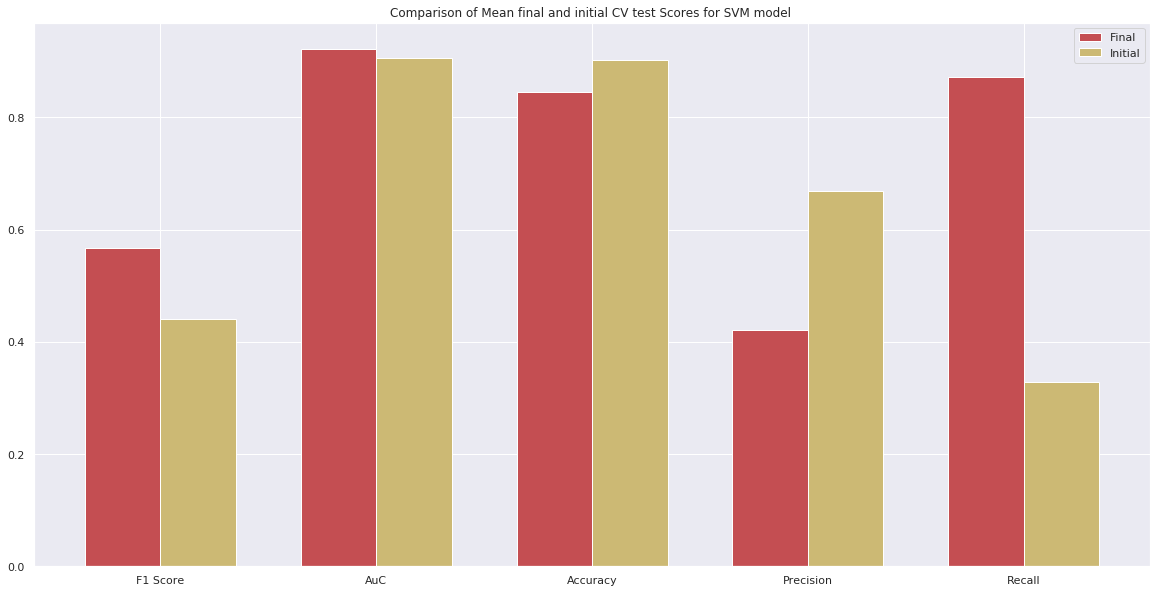

,Final_F1_Score,Final_AUC,Final_Accuracy,Final_Precision,Final_Recall
0,0.567887,0.922521,0.844753,0.421148,0.871739


,Initial_F1_Score,Initial_AUC,Initial_Accuracy,Initial_Precision,Initial_Recall
0,0.44043,0.905734,0.902333,0.667977,0.328639


In [112]:
N = 5

fig, ax = plt.subplots(figsize=(20,10))

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, svmFinalModelCVTestResults.mean(), width, color='r', bottom=0)


p2 = ax.bar(ind + width, svmInitialModelCVTestResults.mean(), width, color='y', bottom=0)

ax.set_title('Comparison of Mean final and initial CV test Scores for SVM model ')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('F1 Score', 'AuC', 'Accuracy', 'Precision', 'Recall'))

ax.legend((p1[0], p2[0]), ('Final', 'Initial'))
ax.autoscale_view()

plt.show()

display(pd.DataFrame(svmFinalModelCVTestResults.mean()).T)
display(pd.DataFrame(svmInitialModelCVTestResults.mean()).T)

As seen from above results and graph, after tuning the parameters of the model, our important evaluation metrices that are F1 Score: Improved from 0.44 to 0.57, AuC: Improved from 0.90 to 0.92, Recall: Improved from 0.33 to 0.87. Precision decreased but thats because of precision-recall tradeoff. Overall Accuracy has decreased a bit from 0.90 to 0.84 but since we have an class imbalance, an unfit model would have an accuracy of around 89% for our dataset. Hence, accuracy is not a good evaluation metric for our dataset.But since, overall AuC and F1 improved, by changing Prior probabilities, a balance between pricision and recall could be achieved. Moreover, in reality probabilty of people subscribing to a term deposit is not 50-50. Also, increased false positive rate means that bank would be making some extra calls that would not yield positive result but since recall is high, model is less likely to miss people who actually want to subscribe to bank deposit.

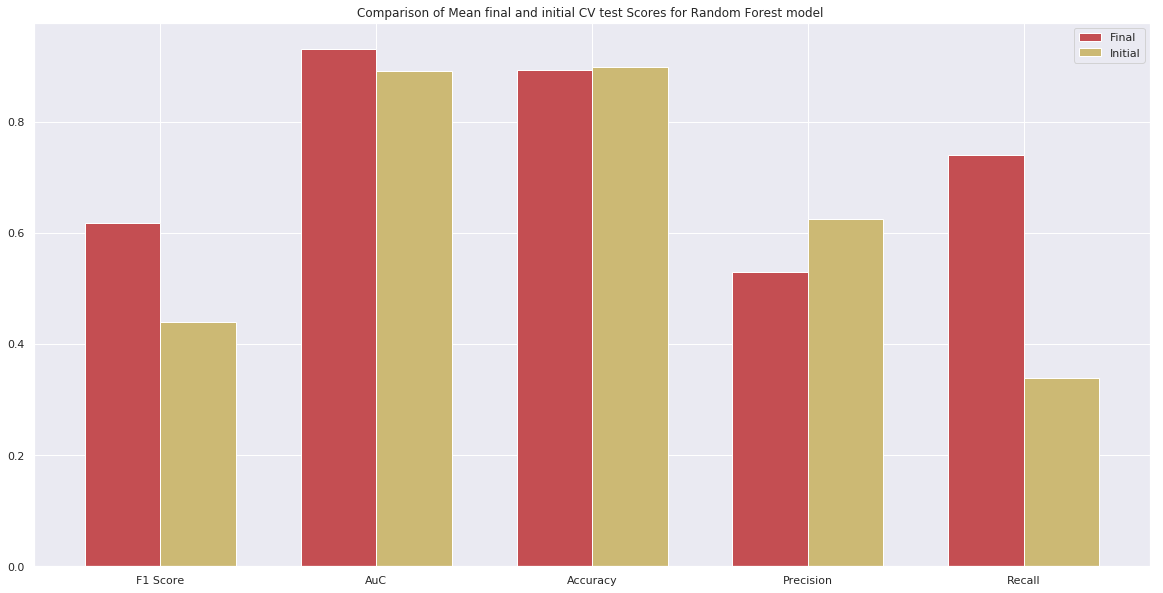

,Final_F1_Score,Final_AUC,Final_Accuracy,Final_Precision,Final_Recall
0,0.616934,0.931501,0.892326,0.528657,0.740926


,Initial_F1_Score,Initial_AUC,Initial_Accuracy,Initial_Precision,Initial_Recall
0,0.439577,0.890604,0.898795,0.624354,0.339414


In [116]:
N = 5

fig, ax = plt.subplots(figsize=(20,10))

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, rfFinalModelCVTestResults.mean(), width, color='r', bottom=0)


p2 = ax.bar(ind + width, rfInitialModelCVTestResults.mean(), width, color='y', bottom=0)

ax.set_title('Comparison of Mean final and initial CV test Scores for Random Forest model ')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('F1 Score', 'AuC', 'Accuracy', 'Precision', 'Recall'))

ax.legend((p1[0], p2[0]), ('Final', 'Initial'))
ax.autoscale_view()

plt.show()

display(pd.DataFrame(rfFinalModelCVTestResults.mean()).T)
display(pd.DataFrame(rfInitialModelCVTestResults.mean()).T)

As seen from above results and graph, after tuning the parameters of the model, our important evaluation metrices that are F1 Score: Improved from 0.44 to 0.62, AuC: Improved from 0.89 to 0.93, Recall: Improved from 0.33 to 0.74. Overall Accuracy almost remained same. This model performed better than our previous SVM model.

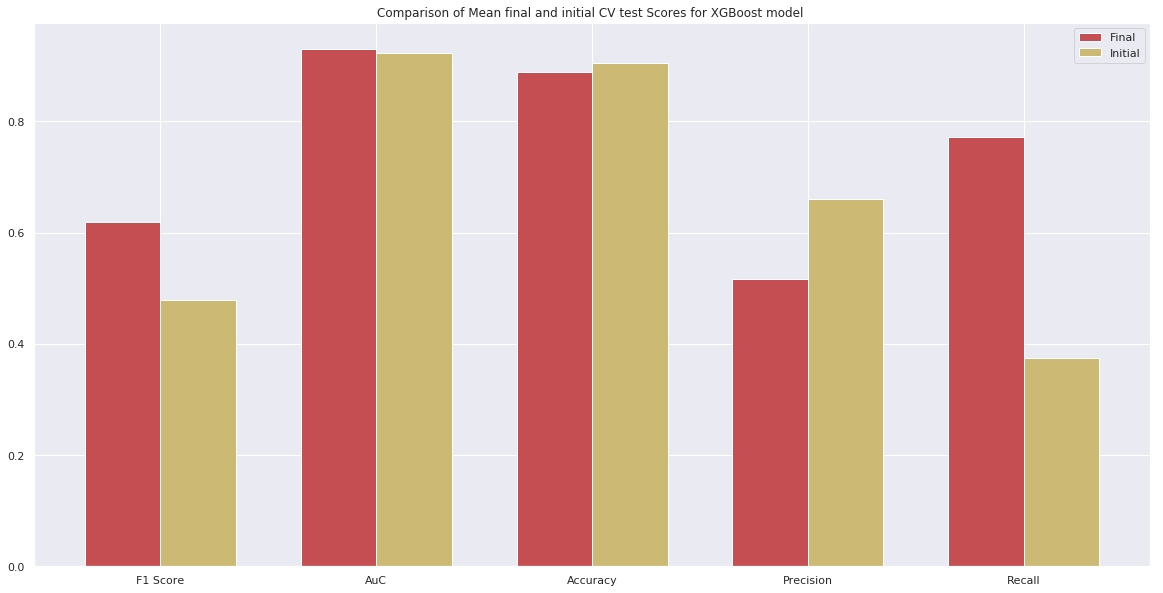

,Final_F1_Score,Final_AUC,Final_Accuracy,Final_Precision,Final_Recall
0,0.618855,0.930799,0.888654,0.516231,0.772495


,Initial_F1_Score,Initial_AUC,Initial_Accuracy,Initial_Precision,Initial_Recall
0,0.477925,0.922194,0.904346,0.661237,0.374386


In [118]:
N = 5

fig, ax = plt.subplots(figsize=(20,10))

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, xgBoostFinalModelCVTestResults.mean(), width, color='r', bottom=0)


p2 = ax.bar(ind + width, xgBoostInitialModelCVTestResults.mean(), width, color='y', bottom=0)

ax.set_title('Comparison of Mean final and initial CV test Scores for XGBoost model ')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('F1 Score', 'AuC', 'Accuracy', 'Precision', 'Recall'))

ax.legend((p1[0], p2[0]), ('Final', 'Initial'))
ax.autoscale_view()

plt.show()

display(pd.DataFrame(xgBoostFinalModelCVTestResults.mean()).T)
display(pd.DataFrame(xgBoostInitialModelCVTestResults.mean()).T)

Our XGBoot model performed equally well as our random Forest Model with gains in F1 score, AuC and Recall. A very slight decrease in accuracy.

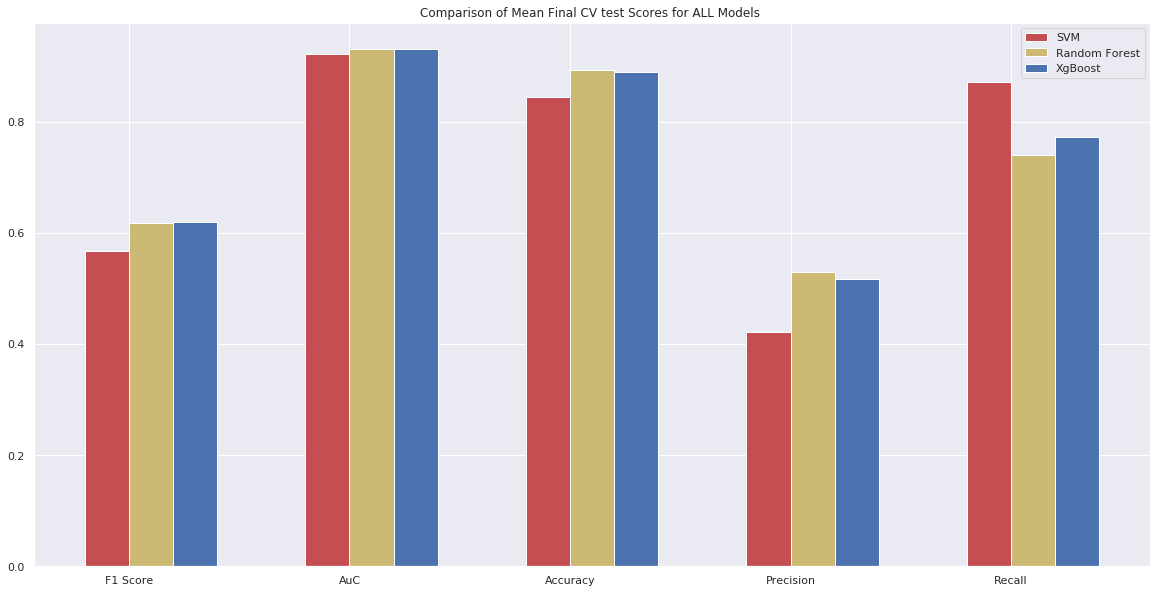

In [123]:
N = 5

fig, ax = plt.subplots(figsize=(20,10))

ind = np.arange(N)    # the x locations for the groups
width = 0.20         # the width of the bars
p1 = ax.bar(ind, svmFinalModelCVTestResults.mean(), width, color='r', bottom=0)

p2 = ax.bar(ind + width, rfFinalModelCVTestResults.mean(), width, color='y', bottom=0)

p3 = ax.bar(ind + 2*width, xgBoostFinalModelCVTestResults.mean(), width, color='b', bottom=0)

ax.set_title('Comparison of Mean Final CV test Scores for ALL Models ')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('F1 Score', 'AuC', 'Accuracy', 'Precision', 'Recall'))

ax.legend((p1[0], p2[0], p3[0]), ('SVM', 'Random Forest', 'XgBoost'))
ax.autoscale_view()

plt.show()


As seen from graph above, our all three models have high AuC scores and relatively high F1 scores. Out of all three models Random Forest and XGBoost were able improve AUC Score and F1 Score with basically no drop in accuracy. Since our dataset has class imbalance, overall improvement in AuC and F1 Score are more important eval metrices for our usecase. Our models are highly tuned for high recall so that they will be less likely to miss a customer who actually wants to subscribe to bank promotion. Also we tried to maximize F1 scores during model tuning, using our RF and XGboost models would provide less false negative results without inflating flase positive results. In our case, cost of flase negatives outweigh cost of false positives as revenue earned from not missing potential customer outweigh resources required for making extra calls, given that we are not making very large number of extra calls. Also, our RF and XGBoost models provided accuracies over 95% on our HOLD Out datasets. Furthur giving indications that these models would generalize well to future data. 

## Modeling and Evaluation 5

Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.

Since our dataset is imbalanced and we have only 2 classes, we would use RoC curves as primary method for model comparison. Next we will also do pair wise T test on accuracies received from these models. Also, since SVM doesnt return probabilities by default, we would be using its AuC score as reference.

/home/chandna_rajat/myenv/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


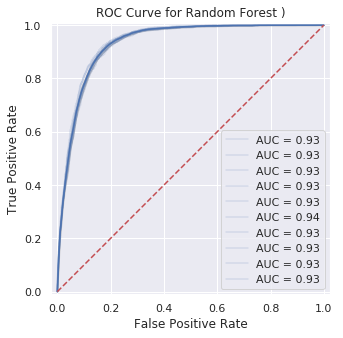

In [166]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interp

from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc


finalRfModel = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1, bootstrap = False, \
                                                                     class_weight = 'balanced', max_depth = 50, \
                                                                     max_features = 'auto', min_samples_leaf = 2, \
                                                                     min_samples_split = 10, n_estimators = 1206 ))



finalXGBModel = XGBClassifier(max_depth=7, learning_rate=0.05, n_estimators=950, \
                              n_jobs=-1, gamma=0, min_child_weight=5, subsample=0.9, \
                              colsample_bytree=0.9, reg_alpha=0.0001, scale_pos_weight=7.5, random_state=999)

finalSvmModel = make_pipeline(StandardScaler(), SVC(C=150.0, kernel='rbf', degree=1 , gamma=0.001,class_weight="balanced", random_state=999))

    
tprs = []
base_fpr = np.linspace(0, 1, 101)

plt.figure(figsize=(5, 5))

for i, (train, test) in enumerate(stratified_cv_object.split(X,y)):
    model = finalRfModel.fit(X[train], y[train])
    y_score = finalRfModel.predict_proba(X[test])
    fpr, tpr, _ = roc_curve(y[test], y_score[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, 'b', alpha=0.15,label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    tpr = interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)

tprs = np.array(tprs)
mean_tprs = tprs.mean(axis=0)
std = tprs.std(axis=0)

tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std


plt.plot(base_fpr, mean_tprs, 'b')
plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.axes().set_aspect('equal', 'datalim')
plt.title("ROC Curve for Random Forest )")
plt.show()

/home/chandna_rajat/myenv/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


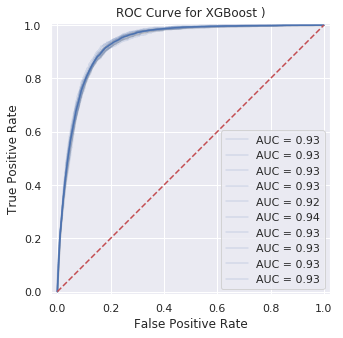

In [167]:
## Generate ROC Curve for XGBoost

tprs = []
base_fpr = np.linspace(0, 1, 101)

plt.figure(figsize=(5, 5))

for i, (train, test) in enumerate(stratified_cv_object.split(X,y)):
    model = finalXGBModel.fit(X[train], y[train])
    y_score = finalXGBModel.predict_proba(X[test])
    fpr, tpr, _ = roc_curve(y[test], y_score[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, 'b', alpha=0.15,label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    tpr = interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)

tprs = np.array(tprs)
mean_tprs = tprs.mean(axis=0)
std = tprs.std(axis=0)

tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std


plt.plot(base_fpr, mean_tprs, 'b')
plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.axes().set_aspect('equal', 'datalim')
plt.title("ROC Curve for XGBoost )")
plt.show()

For AuC under the ROC curve, there appears no difference between Random Forest( AuC = 0.93) and XGBoost( AuC = 0.93) Models. Both models performed equally well in cross validation results. Also very low variance around all 10 folds for both models show that these would generalize well to future data. AuC for SVM model is 0.922521, a figure very close to both Random Forest and XGBoost, but as we saw Random Forest and XGBoost performed quite well on hold out data as compared to SVM. So, all said, we found Random Forest and XGBoost models to be eually good for our dataset followed by SVM. Also, SVM with kernel trick become really computationally expensive with 45K instances in our dataset and took most time to train and validate. For all the before mentioned reasons, we think Random Forest and XGBoost would be good models over SVM for our dataset because of thier overall high AuC, high accuracy on hold out dataset and comparitively low training/validation times. 

In [174]:
## Next performing the pair wise T test for 3 models for difference in accuracies

t = 2.26 / np.sqrt(10)

## Compare SVM and Random Forest Best Models
acc1 = svmFinalModelCVTestResults['Final_Accuracy']
acc2 = rfFinalModelCVTestResults['Final_Accuracy']

e = (1-acc1)-(1-acc2)
stdtot = np.std(e)

dbar = np.mean(e)
print("Compare SVM and Random Forest Best Models")
print("==========================================================")
print ('Range of:', dbar-t*stdtot,dbar+t*stdtot )
print (np.mean(acc1), np.mean(acc2))
print (dbar/stdtot)
print()

## Compare Random Forest and XGBoost Best Models
acc1 = rfFinalModelCVTestResults['Final_Accuracy']
acc2 = xgBoostFinalModelCVTestResults['Final_Accuracy']

e = (1-acc1)-(1-acc2)
stdtot = np.std(e)

dbar = np.mean(e)
print("Compare Random Forest and XGBoost Best Models")
print("==========================================================")
print ('Range of:', dbar-t*stdtot,dbar+t*stdtot )
print (np.mean(acc1), np.mean(acc2))
print (dbar/stdtot)
print()

## Compare XGBoost and SVM Best Models
acc1 = xgBoostFinalModelCVTestResults['Final_Accuracy']
acc2 = svmFinalModelCVTestResults['Final_Accuracy']

e = (1-acc1)-(1-acc2)
stdtot = np.std(e)

dbar = np.mean(e)
print("Compare XGBoost and SVM Best Models")
print("==========================================================")
print ('Range of:', dbar-t*stdtot,dbar+t*stdtot )
print (np.mean(acc1), np.mean(acc2))
print (dbar/stdtot)

Compare SVM and Random Forest Best Models
Range of: 0.04496594022359712 0.050179476120536456
0.8447528475063587 0.8923255556784252
13.042592992080076

Compare Random Forest and XGBoost Best Models
Range of: -0.0057559619403008706 -0.0015867340676610875
0.8923255556784252 0.8886542076744444
-1.2586597813591236

Compare XGBoost and SVM Best Models
Range of: -0.04520092889527812 -0.0426017914408935
0.8886542076744444 0.8447528475063587
-24.14277367474695


A pair wise T test for difference in accuracies of 3 models reveals that:
- There exists a statistically significant difference between accuracies of SVM and random forest model as 0 is not present in the 95% confidence interval for difference. So, based upon accuracy metric, Random Forest model outperformed SVM model for our dataset.
- Although T test reveals a statistically significant differnce in accuracies of Random Forest and XGBoost, the practical difference( or effect size) is observed ever so small. Based upon this, we cannot conclude that in terms of model accuracy, Random Forest model out performed XG Boost model, for our dataset.
- As with the case between SVM and Random Forest, pairwise T test reveals a statistically significant difference between accuracies of SVM and XGBoost model as 0 is not present in the 95% confidence interval for difference. So, based upon accuracy metric, we can say that XG Boost model outperformed SVM model for our dataset.
    

### Modeling and Evaluation 6

Since Random Forest and XGBoost performed equally well on our dataset( with random forest with slight edge), we **choose random forest model to obtain feature importance.**

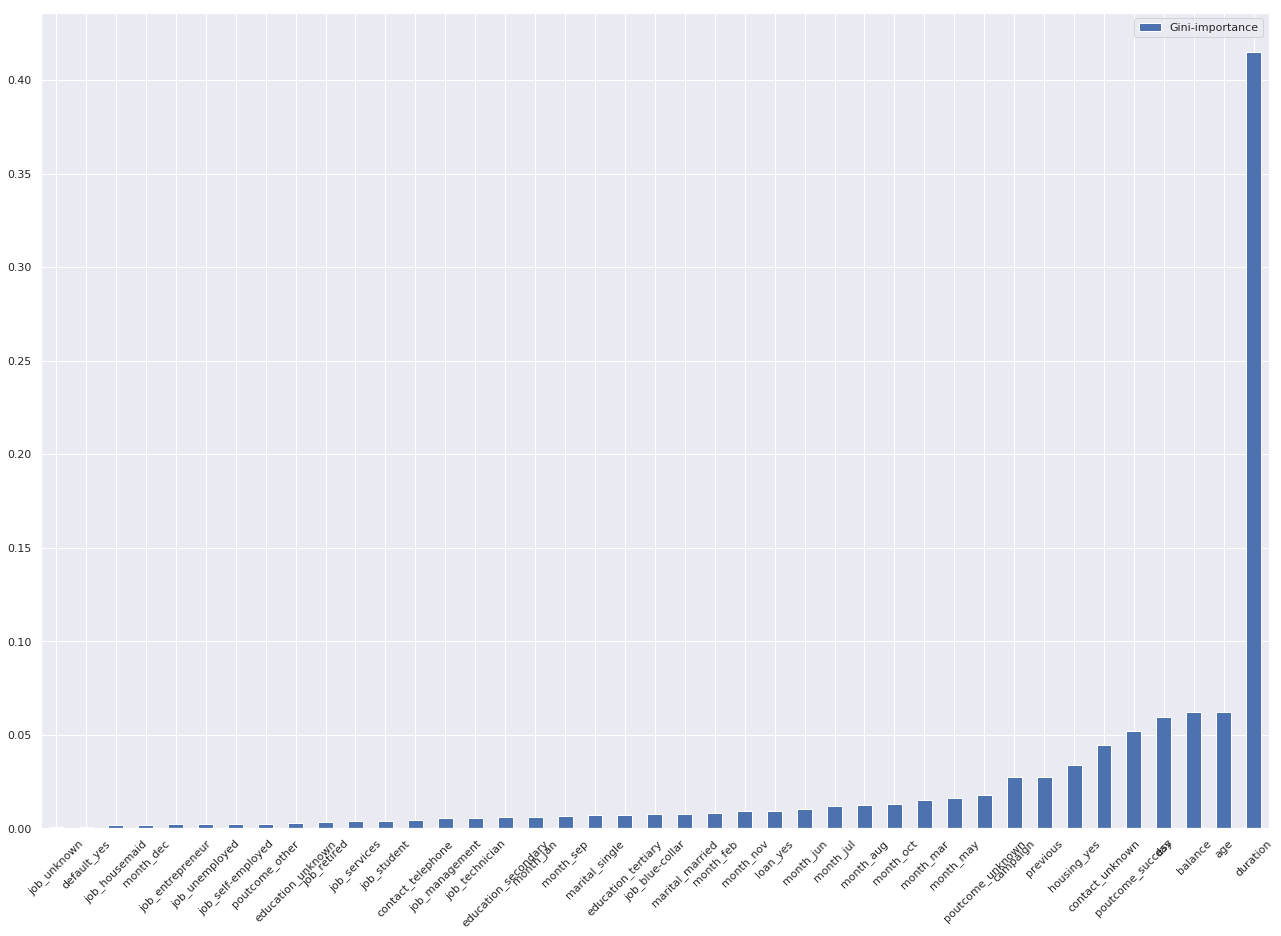

In [165]:
import pandas as pd
%matplotlib inline
#do code to support model
#"data" is the X dataframe and model is the SKlearn object

finalRfModel = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1, bootstrap = False, \
                                                                     class_weight = 'balanced', max_depth = 50, \
                                                                     max_features = 'auto', min_samples_leaf = 2, \
                                                                     min_samples_split = 10, n_estimators = 1206 ))

finalRfModel.fit(X, y=y)

classifier_model = finalRfModel.named_steps['randomforestclassifier']

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(bankPromoModel_Df.columns, classifier_model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45, figsize = (22, 15))


From the above plot of gini importance it is easily seen that duration is feature with the highest importance of ~0.41.  The features below this are not scored nearly as high with a score of less than 0.06.

Gini Importance calculates each feature importance as the sum over the number of splits (across all tress) that include the feature, proportionally to the number of samples it splits.

- This **duration variable** is the amount of time in seconds that the last contact with the client lasted.  This variable could possible be the most important as to having clients subscribe due to making a connection with the client on the call.  A longer duration more than likely leads to a better possibility of subscribing where as a short duration would lead to more negative results.

- The next variable with the most importance is **balance**, which signifies the yearly average in euros.  We speaking to subscribing for additional loans we can assume the clients with a high positive average would say yes to subscribing.  The clients probably have additional disposable income to do more with rather than clients with low or 0 balance.

- **Age** variable is the next one that is of importance when looking at clients who would subscribe to an additional loan.  In a career from leaving tertiary school to university and then to having work experience.  We can safely assume that clients who are older more than likely have more work experience or a higher level education.  These clients also probably have slightly larger incomes than their younger peers.  Having an elevated salary could lead to the clients wanting to invest or spend more of their income.

- **Poutcome Success** ranks into a feature that shows some importance.  From EDA phase , it is known that majority of the contacted people are new. But it seems that the likelihood of previously contacted customers who subscribed then and who would subscribe again is high. While it may be a tendency to ignore existing customers to fetch new ones, it would be good to contact existing customers to retain them.

- Next significant feature is **housing_yes** ,i.e. customers who have a housing loan and this has a generally have less part of income to save  presenting higher probability of not subscribing. This is intuitive since generally people who already have invested in a property have a loan and would less likely be able to invest further. Majority of the customers are belong to lower to average income households and so would have less opportunity to make multiple investments.

- Another important feature is the **campaign** , i.e number of times customer is contacted during the current campaign.  It appers more time contacted shows higher likelihood of not subscribing to term deposit . If a customer is interested , will respond positively in the first few contacts made. If not there could be multiple valid reasons for the customer to not invest and any number of calls made is not going to change that.

- **Job** related features, have close to equal likelihood of subscribing or not subscribing to term deposit and thus appear to have relatively low importance.


# Classification Task 2

________
<a id="tsk2_bu_understanding"></a>
### Business Understanding (2nd Variable)

The team decided that the variable **Housing** would be of interest to the banks as this could be an avenue for additional revenue for the industry.  Individuals and families that own homes could be swayed into refinancing homes for a lower interest rate or need other loans to pay for home improvements.  These transactions, though benefiting the home owner in the short term, in the long run banks do benefit additionally with fees and service transactions that must be paid.

The Housing variable is a binary response that is balanced in our sampled data set (_the population of the bank clients that have a home loan are unknown_).  The variable represents if the client has or does not have a home loan.

From the figure 1 we can see several trends happening during the time of the dataset (ref: https://tradingeconomics.com/portugal):
- Household savings increasing
- Bank lending decreasing
- Average wage increasing
- Consumer spending decreasing

**_Figure 1:_**

![alt text](https://github.com/nhendersonkuns/awesomedataminers/raw/master/ReferenceMaterial/HousingReasons.PNG "Key Indicators")

_During the time of the marketing campaign, a global recession occurred (figure 2).  We inferred that to prepare for the possiblity of upcoming hardships, many individuals/families would have attemped to save more of their disposable income.  The above charts yields us to that inference.  The banks could use this data to direct resources in an attempt to help these home owners refinance and save additional disposable income.  This helps out the customers in the short term and helps out the bank in the long term now that they have gained customers and revenue from interest payments._ 

**_Figure 2:_**
![alt text](https://github.com/nhendersonkuns/awesomedataminers/raw/master/ReferenceMaterial/StockMarketCompare.PNG "US vs Portugal Stock")


**Note: The overall accuracy for our models could turn up low( still better than random chance) as our original dataset was collected for predicting bank promotion subscription so many variables that are relevant to predicting whether a person would sign for a home loan, variables as monthly disposable income, Income/Expenditure ratio, family size etc as not present in this dataset. So, we would try to create models that can extract most of the relevant information about whether a bank customer would be likely to sign up for a home loan.**

________
<a href="#top">Back to Top</a>
<a id="tsk2_dataprepI"></a>
## Data Preparation Part 1 for Task 2

<a id="tsk2_dataprepmodules"></a>
### Import Modules

In [1]:
# Importing the needed modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime 
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)

# To display plots inside the iPython Notebook itself
%matplotlib inline

<a id="tsk2_dataprepviewdata"></a>
### Analyze Data

In [2]:
# To verify how data is orgainzed in file(to find the delimiter) and then
# use corresponding function to open the file. eg
# data could be in .csv. .tsv, excel format etc.
pathOfDataFile = "data/bank-full.csv"
firstFewLines = list()
noOfLinesToView = 5

with open(pathOfDataFile) as dataFile:
    firstFewLines = [next(dataFile) for i in range(noOfLinesToView)]
    for line in firstFewLines:
        print(line)

# Import the semi-colon delimited data file into pandas dataFrame
bankPromo_df = pd.read_csv(pathOfDataFile, sep = ";")

# Rename the Target/Final Outcome column from "y" to "Subscribed" as based on data description.
bankPromo_df = bankPromo_df.rename(columns={"y":"Subscribed"})

bankPromo_df.head(7)

"age";"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"

58;"management";"married";"tertiary";"no";2143;"yes";"no";"unknown";5;"may";261;1;-1;0;"unknown";"no"

44;"technician";"single";"secondary";"no";29;"yes";"no";"unknown";5;"may";151;1;-1;0;"unknown";"no"

33;"entrepreneur";"married";"secondary";"no";2;"yes";"yes";"unknown";5;"may";76;1;-1;0;"unknown";"no"

47;"blue-collar";"married";"unknown";"no";1506;"yes";"no";"unknown";5;"may";92;1;-1;0;"unknown";"no"



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no


<a id="tsk2_dataprepnulls"></a>
#### Validate Nulls

In [3]:
#Check for null values in data Frame
bankPromo_df.isnull().any()

age           False
job           False
marital       False
education     False
default       False
balance       False
housing       False
loan          False
contact       False
day           False
month         False
duration      False
campaign      False
pdays         False
previous      False
poutcome      False
Subscribed    False
dtype: bool

**_As all the missing/unknown values in the dataset have been accounted already. Our dataset contains no missing values_**

<a id="tsk2_dataprepdups"></a>
#### Identify duplicate entires

In [4]:
# To find duplicated rows in data Frame
bankPromo_df.duplicated().any()

False

**_There are no duplicate values for any observations/rows in our data set._**

________
<a href="#top">Back to Top</a>
<a id="tsk2_datapreptarget"></a>
### Set Target Variable

#### Get list of categorical variables , keeping 'Housing' as target/response variable for Task 2

In [5]:
# Make a copy of original data frame
bankPromoModel_hsng_Df = bankPromo_df.copy()
bankPromoModel_hsng_Df['Target'] = bankPromoModel_hsng_Df['housing'].apply(lambda resp : 1 if resp == "yes" else 0)
bankPromoModel_hsng_Df['Target'] = bankPromoModel_hsng_Df['Target'].astype(np.int)

# Delete the original 'housing' column
del bankPromoModel_hsng_Df['housing']

# List final variables of the new dataset
bankPromoModel_hsng_Df.info()

# Get the unique values(Levels) for categorical variables.
# List to hold names of categorical variables
categoricalVars = list()
# List to hold names of numerical variables
numericalVars = list()

for colName in bankPromoModel_hsng_Df.columns:
    if bankPromoModel_hsng_Df[colName].dtype == np.int64:
        numericalVars.append(colName)
    elif bankPromoModel_hsng_Df[colName].dtype == np.object:
        categoricalVars.append(colName)
    else:
        pass
    
# Remove Target column from final categorical Var list
#categoricalVars.remove('housing')

print(numericalVars)
print(categoricalVars)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age           45211 non-null int64
job           45211 non-null object
marital       45211 non-null object
education     45211 non-null object
default       45211 non-null object
balance       45211 non-null int64
loan          45211 non-null object
contact       45211 non-null object
day           45211 non-null int64
month         45211 non-null object
duration      45211 non-null int64
campaign      45211 non-null int64
pdays         45211 non-null int64
previous      45211 non-null int64
poutcome      45211 non-null object
Subscribed    45211 non-null object
Target        45211 non-null int64
dtypes: int64(8), object(9)
memory usage: 5.9+ MB
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'Target']
['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'poutcome', 'Subscribed']


________
<a href="#top">Back to Top</a>
<a id="TrainingSet_CategVarSetUp"></a>
       
### Perform One Hot Encoding for categorical variables in dataset

In [6]:
## Training Dataset
###################
# Convert all categorical variables to corresponding indicator variables
for categoricalVar in categoricalVars:
    tmpDf = pd.DataFrame()
    # Remove 1st class level to avoid multicollinearity
    tmpDf = pd.get_dummies(bankPromoModel_hsng_Df[categoricalVar], prefix=categoricalVar, drop_first=True)
    bankPromoModel_hsng_Df = pd.concat((bankPromoModel_hsng_Df, tmpDf), axis=1)

# Now remove the original categorical vars since indicator variables are created from them.
bankPromoModel_hsng_Df.drop(categoricalVars, inplace=True, axis=1)
print("Training dataset info")
print("=====================")
bankPromoModel_hsng_Df.info()


Training dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
age                    45211 non-null int64
balance                45211 non-null int64
day                    45211 non-null int64
duration               45211 non-null int64
campaign               45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
Target                 45211 non-null int64
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
job_unknown            45211 non-null uint8
marital_married        45211 non-

________
<a id="top"></a>
<a id="TrainingSetClassPredVar"></a>
       
#### Seperate Class and Predictor Variables

In [7]:
### Seperate the class and predictor variables
if 'Target' in bankPromoModel_hsng_Df:
    y = bankPromoModel_hsng_Df['Target'].values # get the labels we want
    del bankPromoModel_hsng_Df['Target']        # get rid of the class label
    X = bankPromoModel_hsng_Df.values           # use everything else to predict!


________
<a href="#top">Back to Top</a>
<a id="#TrainingSetFeatElim"></a>

### Feature Elimination

________
<a href="#top">Back to Top</a>
<a id="FEUsingLassoLogisticRegression"></a>

### Feature Elimination Using Lasso Logistic Regression

Featuring the same dataset as Task1 , it does not have a very high dimensionality , an attempt is made to eliminate any features that may not be useful to our task of classification of the response variable. A simple Logistic Regression model is run to analyze any features that can be eliminated.
From our EDA phase, we know that dataset hosts an almost balanced set for response variable("housing") classifiers - 56% for Yes and 44% for No. So for executing a simple model, class_weight as None is used.

month_aug has weight of -0.8218055880934713
month_jun has weight of -0.5133078366224679
age has weight of -0.34770575197344655
month_jul has weight of -0.33219653576913705
month_feb has weight of -0.30401987123143503
job_student has weight of -0.2298849457383366
month_jan has weight of -0.22251032200338852
month_sep has weight of -0.21537644820959612
month_oct has weight of -0.21508786998788285
Subscribed_yes has weight of -0.21214732837628966
marital_single has weight of -0.20485834964766605
job_retired has weight of -0.20184179660375864
job_unknown has weight of -0.17482566966737745
month_mar has weight of -0.16929127133360752
month_nov has weight of -0.1548033384929472
month_dec has weight of -0.13777989156208167
poutcome_success has weight of -0.12940030098315464
day has weight of -0.11748156842113988
job_housemaid has weight of -0.10266310732500522
job_unemployed has weight of -0.0914933371853685
contact_telephone has weight of -0.06990775131880754
education_unknown has weight of 

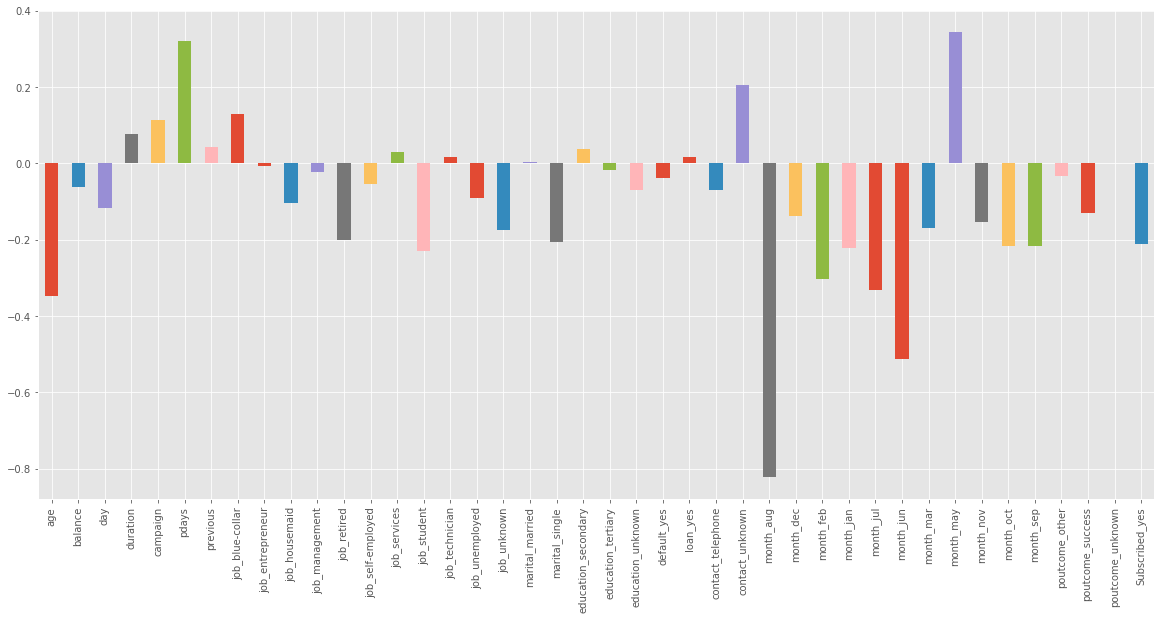

In [23]:
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Standardize the features first, since standardizing the features could lead to
# gradient desent algo to converge faster and then run logistic regression model

logisticModel_hsng = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', C=1.0,\
                                                                   class_weight=None, random_state=999, \
                                                                   solver='liblinear'))

# Fit the whole training dataset now, since validation would be done on additional dataset
logisticModel_hsng.fit(X,y) 

classifier_model = logisticModel_hsng.named_steps['logisticregression']
# sort these attributes and spit them out
zip_vars = zip(classifier_model.coef_.T, bankPromoModel_hsng_Df.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0])

plt.style.use('ggplot')
plt.figure(figsize=(20,9))
weights = pd.Series(classifier_model.coef_[0],index=bankPromoModel_hsng_Df.columns)
weights.plot(kind='bar')
plt.show()


**Based on the magnitude of the coefficients in above plot features- Month_Aug, Month_Jun, Age, Month_May, Month_Jul and PDays are among the most important features.**

As identified during the EDA in Lab 1, the clients could be contacted over a few months, but each of the months listed corresponds to the last month the client was contacted. The months that affect the housing model the most are August, June, May and July. **_It is necessary to note the difference between the housing and the subscribe models - the subscribe model does not weight any months with a high coefficient until the fifth variable. Also, most of the months in the housing model have negative coeffecients where the subscribe model are equally distributed between the months._**

The **age** of the client, which is the first non-month feature, is in the top 6. The age of prospective clients for home loans sounds as if that feature would be significant, _for example a 30 year old person is more likely to have a home loan as compared to an 18 year old._

**Pdays** is the last feature we will mention as significant (we were going to only mention the top 5 but continued until the next non-month attribute). Pdays is also the first non-month attribute to have a positive coefficient with Month_May being the only other feature mentioned here. Pdays is the number of days of contact between the current marketing campaign and a previous campaign. From the EDA in Lab 1, we discovered that 80% of the clients in this campaign were new to marketing campaigns from the bank. The right skewness of the data for this feature could have affected the singifance into the model.

**Discussing the least important features** from results of Lasso Logistic Model with degree = 1 that following features ( with coeff = 0 ) can be eliminated. Next, we will explore them one by one :
    
    poutcome_unknown has weight of 0.0
    
Only 1 feature shows a 0.0 coeff and is a level of categorical variable. **Hence this cannot be eliminated**. Next attempt was made to look at this model with different methods used for feature elimination to see if the results were different.

<a href="#top">Back to Top</a>
<a id="FEUsingDomainKnowledge"></a>

### Feature Elimination based on Domain knowledge

**Delete any features that do not relate to the response variable based on domain knowledge**

BankPromo dataset contains 

i) bank client data like age, balance, education, job , marital status , any loans - housing/personal , if they have defaulted  

ii) information regarding last contact  in current campaign - contact type, day/month when last contacted, duration of last call 

iii) other attributes like number of times contacted during current campaign ,number of days since last contact, number of contacts made in last campaign, outcome from previous campaign , outcome from current campagin i.e. Subscribed or not  


From business use case perspective, any information regarding Term deposit subscription campaign may have no effect on the client data but vice-versa may not be true. It will be interesting to find what features from the campaign information should be considered to predict if a customer has a housing loan or not

________
<a href="#top">Back to Top</a>
<a id="FEDifferentMethods"></a>
       
### Feature Elimination using different methods

In [24]:
# gather numerical variables for LDA

X_fs = bankPromoModel_hsng_Df.copy()
y_fs = y

print("X_fs info")
print("==========")
X_fs.info()

print("y_fs info")
print("==========")
print(y_fs.dtype)

X_fs info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 42 columns):
age                    45211 non-null int64
balance                45211 non-null int64
day                    45211 non-null int64
duration               45211 non-null int64
campaign               45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
job_unknown            45211 non-null uint8
marital_married        45211 non-null uint8
marital_single         45211 non-null uint8
e

### Chi-Sq Test

In [25]:
# Chi-Sq test for feature selection amongst categorical variables
# below code referred from http://www.insightsbot.com/blog/2AeuRL/chi-square-feature-selection-in-python
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfTabular = None
        self.dfExpected = None
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX, alpha)
    
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)

        
# Chi-sq test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X_fs)
chi_selector = SelectKBest(chi2, k=18)
chi_selector.fit(X_norm, y_fs)

chi_support = chi_selector.get_support()
chi_feature = X_fs.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

print(pd.DataFrame(chi_feature))

18 selected features
                      0
0       job_blue-collar
1         job_housemaid
2           job_retired
3          job_services
4           job_student
5           job_unknown
6   education_secondary
7    education_tertiary
8     contact_telephone
9       contact_unknown
10            month_aug
11            month_jun
12            month_mar
13            month_may
14            month_oct
15            month_sep
16     poutcome_success
17       Subscribed_yes


### Pearson Correlation

In [26]:
# Pearson Correlation
feature_name = X_fs.columns.tolist()

def cor_selector(X, y):
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-18:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

cor_support, cor_feature = cor_selector(X_fs, y_fs)
print(str(len(cor_feature)), 'selected features')

print(pd.DataFrame( cor_feature))

18 selected features
                      0
0           job_unknown
1             month_sep
2         job_housemaid
3     contact_telephone
4           job_student
5             month_oct
6      poutcome_success
7    education_tertiary
8   education_secondary
9             month_jun
10                pdays
11       Subscribed_yes
12          job_retired
13      job_blue-collar
14                  age
15      contact_unknown
16            month_aug
17            month_may


### Logistic Regression Fitting Estimator

In [27]:
## Logistic Regression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=18, step=10, verbose=5)
rfe_selector.fit(X_norm, y_fs)


rfe_support = rfe_selector.get_support()
rfe_feature = X_fs.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

print(pd.DataFrame(rfe_feature))

Fitting estimator with 42 features.
Fitting estimator with 32 features.
Fitting estimator with 22 features.
18 selected features
                   0
0                age
1            balance
2           duration
3           campaign
4              pdays
5        job_retired
6        job_student
7        job_unknown
8          month_aug
9          month_dec
10         month_feb
11         month_jan
12         month_mar
13         month_may
14         month_oct
15         month_sep
16  poutcome_success
17    Subscribed_yes


### Logistic Regression Feature Selection

In [28]:
## Embed

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1"), '1.25*median',max_features=18)
embeded_lr_selector.fit(X_norm, y_fs)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X_fs.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

print(pd.DataFrame(embeded_lr_feature))

17 selected features
              0
0           age
1       balance
2      duration
3      campaign
4         pdays
5   job_retired
6   job_student
7   job_unknown
8     month_aug
9     month_dec
10    month_feb
11    month_jan
12    month_jul
13    month_jun
14    month_mar
15    month_oct
16    month_sep


### Random Forest Feature Selection

In [29]:
## Random forest

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold='1.25*median', max_features=42)
embeded_rf_selector.fit(X_fs, y_fs)


embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_fs.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

print(pd.DataFrame(embeded_rf_feature))

17 selected features
                      0
0                   age
1               balance
2                   day
3              duration
4              campaign
5                 pdays
6              previous
7       job_blue-collar
8       marital_married
9   education_secondary
10             loan_yes
11      contact_unknown
12            month_aug
13            month_jul
14            month_jun
15            month_may
16       Subscribed_yes


### Light GBM Feature Selection

In [32]:
## LightGBM

from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, threshold='1.25*median',max_features=18)
embeded_lgb_selector.fit(X_fs, y_fs)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X_fs.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

print(pd.DataFrame(embeded_lgb_feature))

16 selected features
                     0
0                  age
1              balance
2                  day
3             duration
4             campaign
5                pdays
6             previous
7      job_blue-collar
8       job_technician
9       marital_single
10  education_tertiary
11            loan_yes
12     contact_unknown
13           month_jul
14           month_jun
15      Subscribed_yes


### Summary of the variable importance through above methods

In [33]:
## Summary

pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(42)

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,LightGBM,Total
1,pdays,True,False,True,True,True,True,5
2,month_jun,True,True,False,True,True,True,5
3,month_aug,True,True,True,True,True,False,5
4,age,True,False,True,True,True,True,5
5,Subscribed_yes,True,True,True,False,True,True,5
6,month_sep,True,True,True,True,False,False,4
7,month_oct,True,True,True,True,False,False,4
8,month_may,True,True,True,False,True,False,4
9,job_unknown,True,True,True,True,False,False,4
10,job_student,True,True,True,True,False,False,4


As can be seen through the various methods deployed, the features that show least or no importance from all methods are :
 
poutcome_unknown
poutcome_other
month_nov
job_unemployed
job_self-employed
job_management
job_entrepreneur
education_unknown
default_yes

**All features except default_yes are one of multiple levels of a categorical variable. Removing default did not yield better results and this not being a high-dimensional dataset, decision is made to proceed with all features**

________
<a href="#top">Back to Top</a>
<a id="SummaryObjDataPrep1"></a>
### Summary and Objectives tracking for section: Data Preparation Part 1

Define and prepare your class variables.
// "housing" variable is identified and prepared as class variable.

Use proper variable representations (int, float, one-hot, etc.).
// As can be seen from above code, all the numericals variables have been appropriatly represented in the dataset and all categorical variables have been encoded using one-hot encoding.

Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc.
// Scaling of the variables would be later performed before model preparation using pipeline which would first scale the variables before fitting them to model. Since, our data is not that high dimensional in feature space, hence no dimensionality reduction technique was performed. Rest all pre-processing was performed.

Remove variables that are not needed/useful for the analysis.
// No feature was deemed as non-important enough to be removed

________
<a href="#top">Back to Top</a>
<a id="tsk2_dataprepII"></a>

## Data Preparation Part 2 for Task 2

In [17]:
bankPromoModel_hsng_Df.describe()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,Subscribed_yes
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.215257,0.032890,0.027427,...,0.118135,0.010551,0.304483,0.087810,0.016323,0.012807,0.040698,0.033421,0.817478,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.411005,0.178351,0.163326,...,0.322771,0.102174,0.460193,0.283022,0.126718,0.112441,0.197592,0.179735,0.386278,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
bankPromoModel_hsng_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 42 columns):
age                    45211 non-null int64
balance                45211 non-null int64
day                    45211 non-null int64
duration               45211 non-null int64
campaign               45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
job_unknown            45211 non-null uint8
marital_married        45211 non-null uint8
marital_single         45211 non-null uint8
education_s

________
<a href="#top">Back to Top</a>
<a id="tsk2_predictordesc"></a>
### Variable Descriptions

**So we would use above 42 predictors to create and validate our models; and variable "Housing" has been renamed to Target variable and would be used as class label.** The description of these variables is as:

- **Age** – Age is a numeric variable that ranges from ages 18-95 years.  
- **Job** – Job type is a categorical variable that entered the client into types of occupations.  The choices were: admin., unknown, unemployed, management, housemaid, entrepreneur, student, blue-collar, self-employed, retired, technician and services.  
- **Marital** – Marital status is a categorical variable that describes if the client is married, divorced or single.  For widowed clients, the bank has selected the divorced selection.
- **Education** – Education represents the client’s highest level of education.  The categorical variable has the following selections:  unknown, primary, secondary or tertiary.  Primary level is equivalent to the US elementary and middle school grades.  Secondary is similar to the US high school, but is split between more professional teachings versus vocations.  Tertiary level represents all level of higher education from special licenses, bachelors to post doctorate school (https://www.scholaro.com/pro/Countries/Portugal/Education-System).
- **Default** – Default represents if the client has defaulted in their credit history as a binary variable denoted with yes for default or no for no default.
- **Balance** – Balance is a numeric variable which signifies the yearly average balance in Euros.
- **Housing** – Housing is a binary variable which represents if the client has a home loan or not.  The selections are yes or no.
- **Loan** – Loan is similar to the housing variable except it represents if the client has a personal loan.
- **Contact** – Contact is a categorical variable describing the method of telecommunication between the bank and the client.  The selections are:  unknown, telephone or cellular.
- **Day** – Day is a numeric variable that represents the day of the month of the last contact.
- **Month** – Month is represented as a categorical variable where each month is denoted by the first three letters.  Every month of the year is represented.  The month corresponds to the last contact made with the client.
- **Duration** – Duration is the amount of time (a numeric variable) in seconds that the last contact with the client lasted.  This attribute is not the total time the clients were interviewed.     
- **Campaign** – Campaign is a numeric variable which represents the number of times the bank has contacted, using any method of communication, the client during this particular marketing campaign.
- **Previous** – Previous is a numeric variable that identifies the number of times a client has been involved with a marketing campaign with this bank prior to the current campaign. 
- **pOutcome** – pOutcome represents the outcome of a previous marketing campaign.  The categorical variable is identified by:  unknown, other, failure or success.  Each client that has not participated in a previous marketing campaign has been marked as unknown for pOutcome.
- **pdays** - pdays represents the number of days since the last contact in a previous campaign. This feature has seen to be correlated to pOutcome in the analysis for Task1.
- **Subscribed** – Y signifies yes if the customer accepted a term deposit during the current marketing campaign.  The binary variable is defined as yes or no.  In the remaining portions of the report, this variable is denoted as subscribed with the results remaining as yes or no. 



________
<a href="#top">Back to Top</a>
<a id="tsk2_SummaryObjDataPrepII"></a>
### Summary and Objectives tracking for section: Data Preparation Part 2

Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).

// The final dataset that is to be used for classification in Task 2 has been described as above. No new variables were created for this analysis.

________
<a href="#top">Back to Top</a>
<a id="tsk2_ModelEval1"></a>
## Modeling and Evaluation 1 - Task 2

- In this task, we are predicting whether a bank client has a housing loan. 56% of the clients in this data set have housing loan and the remaining 44% do not, which dataset is closely balanced for this task. We used **accuracy** to evaluate the model performance and select the model parameters.

- From a business standpoint, it is equally important to know who has a loan or not. Banks could offer additional promotions regarding home refinancing for customers who have housing loans. Similarly, if the bank wants to attract new home owners, they can contact people who do not have housing loans. **Correct prediction is more important for this model and accuracy is chosen as a primary metric to evaluate the models.**

- **This will be followed by AuC scores**, as accuracy is calculated at a threshold value of 0.5. In real life, the probability of the population having a housing loan is not 50-50. This data set was collected at time of economic recession, so it is likely that prior probabilities of people having housing loan were not at 50-50 level. (reference: https://tradingeconomics.com/portugal/home-ownership-rate shows in 2010 the home ownership rate was ~75%, no 2008-2009 data was found) . **Hence, AuC score (in conjunction to ROC curve) score which basically provides accuracies at different threshold values, would overall provide a better measure of model performance.**

________
<a href="#top">Back to Top</a>
<a id="tsk2_ModelEval2"></a>
## Modeling and Evaluation 2 - Task 2
For task 2, we are using 10-fold cross validation method to split the training set. As shown, we also have a separate data set from UCI Machine Learning website for prediction and test. There are 45,211 instances in the training set and 4,521 in the holdout test dataset. Dataset for task2 is almost balanced (_ also assumed to be "balanced" for our model evaluations_),so a standard K-Fold cross validation would be appropriate for dividing our dataset into training and test sets. So next we would explore **Random 10-fold and 10-fold Shuffle Split** as possible Cross validation techniques for dividing our dataset into training and testing splits.

<a id="tsk2_LRMetricsKfold"></a>
### LR Metrics Standard K-Fold

In [9]:
# Training and Test Split
# Since housing is a balanced dataset ( with 56% yes and 44% No , we will use simple KFold cv objects)
from sklearn.model_selection import KFold
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

      
# To use the cross validation object in scikit learn, we need to grab an instance
# of the object and set it up. This object will be able to split our data into 
# training and testing splits
num_cv_iterations = 10
kfold_cv_object = KFold(n_splits=num_cv_iterations , shuffle = False , random_state=999)
#n_splits=num_cv_iterations,test_size  = 0.2, random_state=999
                         
print(kfold_cv_object)


KFold(n_splits=10, random_state=999, shuffle=False)


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
#from sklearn import metrics as mt

warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Initialize an Empty Dataframe to store Model performance Stats
#modelPerformanceMetrices = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])
scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

# Standardize the features first, since standardizing the features could lead to
# gradient desent algo to converge faster and then run logistic regression model

logisticModel = make_pipeline(StandardScaler(),  LogisticRegression(penalty='l1', C=1.0, class_weight=None, random_state=999))

start = datetime.now()
scores = cross_validate(logisticModel , X, y=y , cv = kfold_cv_object , n_jobs = -1 , scoring = scoring)
print()
display(pd.DataFrame(scores))
display(pd.DataFrame(scores).mean())
end = datetime.now()

print()
testCol = ['test_F1_Score', 'test_AUC', 'test_Accuracy', 'test_Precision', 'test_Recall' ]
trainCol = ['train_F1_Score', 'train_AUC', 'train_Accuracy', 'train_Precision', 'train_Recall' ]

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,1.3350,0.0325,0.944613,0.744731,0.574598,0.816525,0.895179,0.735653,0.897026,0.745085,0.997532,0.744378
1,1.3625,0.0500,0.853853,0.751690,0.585186,0.824778,0.752931,0.745441,0.908155,0.759814,0.805679,0.743738
2,1.3075,0.0525,0.500095,0.809572,0.627757,0.842206,0.418491,0.771369,0.343252,0.786251,0.920868,0.834318
3,1.3375,0.0400,0.088985,0.800586,0.538851,0.849564,0.438399,0.779258,0.553571,0.802225,0.048381,0.798954
4,1.2100,0.0400,0.245696,0.792306,0.669041,0.821918,0.786773,0.748169,0.581481,0.775134,0.155754,0.810256
5,1.2400,0.0400,0.590136,0.786064,0.761794,0.834171,0.685689,0.757483,0.719409,0.786815,0.500244,0.785315
6,1.2900,0.0300,0.455639,0.792442,0.696512,0.838221,0.629507,0.761637,0.705231,0.781817,0.336534,0.803358
7,2.2800,0.0400,0.878076,0.754189,0.772711,0.822239,0.807122,0.742910,0.891286,0.762158,0.865252,0.746384
8,0.8900,0.0400,0.900643,0.760999,0.843792,0.821425,0.846273,0.741927,0.857376,0.755513,0.948509,0.766564
9,0.9500,0.0300,0.377330,0.800729,0.646786,0.829804,0.630613,0.758270,0.292317,0.784798,0.532072,0.817321


fit_time           1.320250
score_time         0.039500
test_F1_Score      0.583507
train_F1_Score     0.779331
test_AUC           0.671703
train_AUC          0.830085
test_Accuracy      0.689098
train_Accuracy     0.754212
test_Precision     0.674911
train_Precision    0.773961
test_Recall        0.611083
train_Recall       0.785059
dtype: float64



 Mean values for Performance Metrices on Train Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.779331,0.830085,0.754212,0.773961,0.785059



 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.583507,0.671703,0.689098,0.674911,0.611083


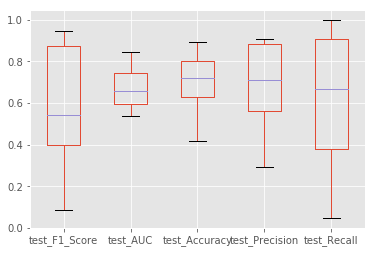

In [27]:
pd.DataFrame(scores)[testCol].boxplot()

<a id="tsk2_LRMetricsKShuffle"></a>
### LR Metrics Shuffle Split

In [29]:
from sklearn.model_selection import ShuffleSplit
# To use the cross validation object in scikit learn, we need to grab an instance
# of the object and set it up. This object will be able to split our data into 
# training and testing splits
num_cv_iterations = 10
shuffle_cv_object = ShuffleSplit(n_splits=num_cv_iterations, test_size = 0.1, random_state=999)
                         
print(shuffle_cv_object)


ShuffleSplit(n_splits=10, random_state=999, test_size=0.1, train_size=None)


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
#from sklearn import metrics as mt

warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Initialize an Empty Dataframe to store Model performance Stats
#modelPerformanceMetrices = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])
scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}


logisticModel = make_pipeline(StandardScaler(),  LogisticRegression(penalty='l1', C=1.0, class_weight=None, random_state=999))

start = datetime.now()
scores = cross_validate(logisticModel , X, y=y , cv = shuffle_cv_object , n_jobs = -1 , scoring = scoring)
print()
display(pd.DataFrame(scores))
display(pd.DataFrame(scores).mean())
end = datetime.now()


print()
testCol = ['test_F1_Score', 'test_AUC', 'test_Accuracy', 'test_Precision', 'test_Recall' ]
trainCol = ['train_F1_Score', 'train_AUC', 'train_Accuracy', 'train_Precision', 'train_Recall' ]

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,1.3850,0.03,0.775268,0.778855,0.827496,0.829789,0.749226,0.752316,0.772817,0.773054,0.777734,0.784745
1,1.4325,0.03,0.788132,0.777900,0.835867,0.828970,0.764706,0.750940,0.783452,0.771810,0.792869,0.784086
2,1.4050,0.03,0.781732,0.778234,0.838677,0.828603,0.755860,0.751505,0.779882,0.771818,0.783591,0.784757
3,1.3675,0.03,0.782011,0.778980,0.833092,0.829253,0.754533,0.751923,0.767836,0.772082,0.796719,0.786002
4,1.4000,0.04,0.787298,0.777778,0.838794,0.828522,0.764485,0.750399,0.781833,0.770795,0.792840,0.784888
5,1.3600,0.04,0.782333,0.777182,0.831703,0.829384,0.756966,0.750694,0.785601,0.771488,0.779093,0.782961
6,1.3500,0.03,0.774514,0.778807,0.824350,0.830311,0.748784,0.751702,0.763302,0.772398,0.786060,0.785323
7,1.3800,0.04,0.784175,0.778494,0.830247,0.829594,0.756303,0.751628,0.776270,0.771426,0.792244,0.785692
8,0.5900,0.02,0.768526,0.779463,0.823310,0.830286,0.743034,0.752759,0.761247,0.773899,0.775945,0.785109
9,0.5800,0.02,0.771485,0.779363,0.821751,0.830527,0.744803,0.752587,0.762128,0.773346,0.781075,0.785474


fit_time           1.225000
score_time         0.031000
test_F1_Score      0.779547
train_F1_Score     0.778506
test_AUC           0.830529
train_AUC          0.829524
test_Accuracy      0.753870
train_Accuracy     0.751645
test_Precision     0.773437
train_Precision    0.772212
test_Recall        0.785817
train_Recall       0.784904
dtype: float64



 Mean values for Performance Metrices on Train Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.778506,0.829524,0.751645,0.772212,0.784904



 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.779547,0.830529,0.75387,0.773437,0.785817


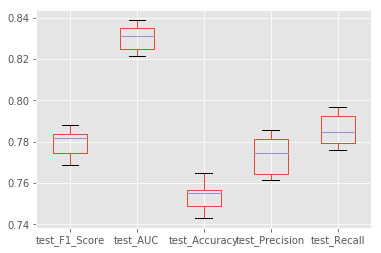

In [33]:
pd.DataFrame(scores)[testCol].boxplot()

<a href="#top">Back to Top</a>
<a id="tsk2_ModelEval2Summary"></a>
### Model 2 Summary
**Standard K-fold was chosen for this mode.** Reasons for using k-fold for splitting the data versus Shuffle split
•   Based on the visualization, there are no outliers in standard K-fold
•	ShuffleSplit will randomly sample the entire dataset during each iteration to generate a training set and a test set. Since we are sampling from the entire dataset during each iteration, values selected during one iteration, could be selected again during another iteration. Whereas in K-fold the test data is different in each fold. This generalizes the model for prediction on future datasets.


________
<a href="#top">Back to Top</a>
<a id="tsk2_ModelEval3"></a>
## Modeling and Evaluation 3 for Task 2

#### Getting ready Additional Test Dataset(with 10% instances) for final model fitting and evaluations

In [21]:
pathOfAdditionalDataFile = "data/bank.csv"

# Import the semi-colon delimited data file into pandas dataFrame
bankPromoAdditional_h_df = pd.read_csv(pathOfAdditionalDataFile, sep = ";")

# Rename the Target/Final Outcome column from "y" to "Subscribed" as based on data description.
bankPromoAdditional_h_df = bankPromoAdditional_h_df.rename(columns={"y":"Subscribed"})

bankPromoAdditional_h_df['Target'] = bankPromoAdditional_h_df['housing'].apply(lambda resp : 1 if resp == "yes" else 0)
bankPromoAdditional_h_df['Target'] = bankPromoAdditional_h_df['Target'].astype(np.int)
# Delete the original 'housing' column
del bankPromoAdditional_h_df['housing']

bankPromoAdditional_h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age           4521 non-null int64
job           4521 non-null object
marital       4521 non-null object
education     4521 non-null object
default       4521 non-null object
balance       4521 non-null int64
loan          4521 non-null object
contact       4521 non-null object
day           4521 non-null int64
month         4521 non-null object
duration      4521 non-null int64
campaign      4521 non-null int64
pdays         4521 non-null int64
previous      4521 non-null int64
poutcome      4521 non-null object
Subscribed    4521 non-null object
Target        4521 non-null int32
dtypes: int32(1), int64(7), object(9)
memory usage: 582.9+ KB


#### Creating Target Variable in Test Dataset

In [22]:
## Test Dataset
###################
# Covert all categorical variables to corresponding indicator variables
for categoricalVar in categoricalVars:
    tmpDf = pd.DataFrame()
    # Remove 1st class level to avoid multicollinearity
    tmpDf = pd.get_dummies(bankPromoAdditional_h_df[categoricalVar], prefix=categoricalVar, drop_first=True)
    bankPromoAdditional_h_df = pd.concat((bankPromoAdditional_h_df, tmpDf), axis=1)

# Now remove the original categorical vars since indicator variables are created from them.
bankPromoAdditional_h_df.drop(categoricalVars, inplace=True, axis=1)

if 'Target' in bankPromoAdditional_h_df:
    y_Final = bankPromoAdditional_h_df['Target'].values # get the labels we want
    del bankPromoAdditional_h_df['Target']        # get rid of the class label
    X_Final = bankPromoAdditional_h_df.values

print("Test dataset info")
print("=====================")
bankPromoAdditional_h_df.info()

Test dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 42 columns):
age                    4521 non-null int64
balance                4521 non-null int64
day                    4521 non-null int64
duration               4521 non-null int64
campaign               4521 non-null int64
pdays                  4521 non-null int64
previous               4521 non-null int64
job_blue-collar        4521 non-null uint8
job_entrepreneur       4521 non-null uint8
job_housemaid          4521 non-null uint8
job_management         4521 non-null uint8
job_retired            4521 non-null uint8
job_self-employed      4521 non-null uint8
job_services           4521 non-null uint8
job_student            4521 non-null uint8
job_technician         4521 non-null uint8
job_unemployed         4521 non-null uint8
job_unknown            4521 non-null uint8
marital_married        4521 non-null uint8
marital_single         4521 non-null uint8
education_secon

________
<a href="#top">Back to Top</a>
<a id="tsk2_ModelEval3Simple_LRFit"></a>

### Model 1 : Simple Logistic Model Fit

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
#from sklearn import metrics as mt
import warnings
from datetime import datetime 
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)

# Initialize an Empty Dataframe to store Model performance Stats
#modelPerformanceMetrices = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])
scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

# Standardize the features first, since standardizing the features could lead to
# gradient desent algo to converge faster and then run logistic regression model

logisticModel = make_pipeline(StandardScaler(),  LogisticRegression(penalty='l1', C=1.0, class_weight=None, random_state=999))

start = datetime.now()
scores_kfold = cross_validate(logisticModel , X, y=y , cv = kfold_cv_object , n_jobs = -1 , scoring = scoring)
print()
#display(pd.DataFrame(scores_kfold))
#display(pd.DataFrame(scores_kfold).mean())
end = datetime.now()
print("time taken for Logistic Regression with Kfold cv object")
print(end-start)
print()

testCol = ['test_F1_Score', 'test_AUC', 'test_Accuracy', 'test_Precision', 'test_Recall' ]
trainCol = ['train_F1_Score', 'train_AUC', 'train_Accuracy', 'train_Precision', 'train_Recall' ]

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores_kfold)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores_kfold)[testCol].mean()).T)

slrInitialModelCVTestResults = pd.DataFrame(scores_kfold)[testCol].copy()
slrInitialModelCVTestResults


time taken for Logistic Regression with Kfold cv object
0:00:05.423182


 Mean values for Performance Metrices on Train Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.779318,0.830085,0.754199,0.773957,0.785038



 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.583509,0.671702,0.689098,0.675076,0.611083


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.944613,0.574595,0.895179,0.897026,0.997532
1,0.853853,0.585188,0.752931,0.908155,0.805679
2,0.500095,0.627755,0.418491,0.343252,0.920868
3,0.088985,0.538850,0.438399,0.553571,0.048381
4,0.245889,0.669035,0.786994,0.583643,0.155754
5,0.589965,0.761793,0.685468,0.718904,0.500244
6,0.455639,0.696505,0.629507,0.705231,0.336534
7,0.878076,0.772716,0.807122,0.891286,0.865252
8,0.900643,0.843795,0.846273,0.857376,0.948509
9,0.377330,0.646789,0.630613,0.292317,0.532072


________
<a href="#top">Back to Top</a>
<a id="tsk2_ModelEval3Simple_LRPoly"></a>
### Polynomial Logistic Regression of degree 2

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Initialize an Empty Dataframe to store Model performance Stats
#modelPerformanceMetrices = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])
scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

# Standardize the features first, since standardizing the features could lead to
# gradient desent algo to converge faster and then run logistic regression model

logisticModel2 = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(),  LogisticRegression(penalty='l1', C=1.0, class_weight=None, random_state=999))

start = datetime.now()
scores_kfold2 = cross_validate(logisticModel2 , X, y=y , cv = kfold_cv_object , n_jobs = -1 , scoring = scoring)
print()
display(pd.DataFrame(scores_kfold2))
display(pd.DataFrame(scores_kfold2).mean())
end = datetime.now()
print("time taken for Logistic Regression with Kfold cv object")
print(end-start)
print()

testCol = ['test_F1_Score', 'test_AUC', 'test_Accuracy', 'test_Precision', 'test_Recall' ]
trainCol = ['train_F1_Score', 'train_AUC', 'train_Accuracy', 'train_Precision', 'train_Recall' ]

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores_kfold2)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores_kfold2)[testCol].mean()).T)

p2lrInitialModelCVTestResults = pd.DataFrame(scores_kfold2)[testCol].copy()
p2lrInitialModelCVTestResults

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,305.752405,1.271256,0.945170,0.785228,0.601827,0.855696,0.896064,0.776746,0.896239,0.782637,0.999753,0.787836
1,305.543621,1.121057,0.819712,0.787692,0.592217,0.860282,0.706260,0.781593,0.910434,0.793397,0.745432,0.782068
2,318.417222,1.204314,0.496214,0.832336,0.632933,0.871196,0.440832,0.800909,0.346797,0.816900,0.871849,0.848367
3,286.996691,1.084677,0.464924,0.822268,0.631688,0.875660,0.542800,0.802900,0.690769,0.822450,0.350371,0.822085
4,327.936614,1.046848,0.348553,0.825839,0.676358,0.860434,0.775935,0.788105,0.495430,0.805310,0.268849,0.847442
5,316.047406,1.094571,0.622435,0.820834,0.759848,0.869019,0.686574,0.795159,0.683841,0.814687,0.571149,0.827074
6,309.599117,1.048068,0.534449,0.825129,0.666186,0.871100,0.630834,0.798329,0.637816,0.810754,0.459914,0.840023
7,332.337978,1.145880,0.840635,0.791825,0.771713,0.857492,0.760230,0.778963,0.901040,0.788140,0.787820,0.795544
8,230.900595,1.005783,0.884003,0.797237,0.829873,0.858611,0.817961,0.780683,0.830949,0.790163,0.944294,0.804439
9,593.321671,0.943430,0.370572,0.828707,0.622729,0.863435,0.642336,0.792824,0.294190,0.814540,0.500526,0.843376


fit_time           332.685332
score_time           1.096588
test_F1_Score        0.632667
train_F1_Score       0.811709
test_AUC             0.678537
train_AUC            0.864293
test_Accuracy        0.689982
train_Accuracy       0.789621
test_Precision       0.668750
train_Precision      0.803898
test_Recall          0.649996
train_Recall         0.819825
dtype: float64

time taken for Logistic Regression with Kfold cv object
0:10:06.013239


 Mean values for Performance Metrices on Train Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.811709,0.864293,0.789621,0.803898,0.819825



 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.632667,0.678537,0.689982,0.66875,0.649996


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.945170,0.601827,0.896064,0.896239,0.999753
1,0.819712,0.592217,0.706260,0.910434,0.745432
2,0.496214,0.632933,0.440832,0.346797,0.871849
3,0.464924,0.631688,0.542800,0.690769,0.350371
4,0.348553,0.676358,0.775935,0.495430,0.268849
5,0.622435,0.759848,0.686574,0.683841,0.571149
6,0.534449,0.666186,0.630834,0.637816,0.459914
7,0.840635,0.771713,0.760230,0.901040,0.787820
8,0.884003,0.829873,0.817961,0.830949,0.944294
9,0.370572,0.622729,0.642336,0.294190,0.500526


________
<a href="#top">Back to Top</a>
<a id="tsk2_ModelEval3Simple_LRFTune"></a>
### Tuning The Model Hyper Paramters Using Grid Search

#### Grid Search on Simple Logistic Regression

**Using K_Fold Cross Validation Object :**

In [14]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.exceptions import DataConversionWarning


param_grid = {
     'logisticregression__penalty' : ['l1', 'l2'],
    'logisticregression__C' : np.logspace(-4, 4, 50),
    'logisticregression__solver' : ['liblinear']
   }


scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

# Create grid search object

grid = GridSearchCV(make_pipeline(StandardScaler(), LogisticRegression(random_state=999, class_weight=None)), \
                   param_grid = param_grid, cv = kfold_cv_object , verbose=False, n_jobs=-1, scoring=scoring, refit='Accuracy', \
                   return_train_score=True)

# Fit on data

grid.fit(X, y=y)
  
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'logisticregression__C': 75.43120063354607, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'} with a score of 0.69


<a id="tsk2_ModelEval3GSPoly_LRFTune"></a>
#### Grid Search on Polynomial Logistic Regression of degree 2

**_GridSearch on Polynomial Logistic Regression did not complete on either local machine or Google VM with 24vCPUs , infact it failed after hours of executing. Hence a decision was made to use Randomized GridSearch for poly to get best parameters and run a GridSearch on values near to the best parameters_**

In [22]:
## Randomized GridSearch on Logistic Regression poly model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.exceptions import DataConversionWarning
from sklearn.preprocessing import PolynomialFeatures


param_grid = {
     'logisticregression__penalty' : ['l1', 'l2'],
    'logisticregression__C' : [0.001, 0.10, 0.0001],
    'logisticregression__solver' : ['liblinear'],
    'logisticregression__class_weight' : ['balanced', None]
   }


scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

poly_lr = make_pipeline(PolynomialFeatures(degree=2),StandardScaler(),LogisticRegression(random_state=999) )
# Create grid search object

poly_grid = RandomizedSearchCV(estimator = poly_lr, n_iter = 50, 
                   param_distributions = param_grid, cv = kfold_cv_object , verbose=False, n_jobs=-1, scoring=scoring, refit='Accuracy', \
                   return_train_score=True)

# Fit on data

poly_grid.fit(X, y=y)
  
print("The best parameters are %s with a score of %0.2f"
      % (poly_grid.best_params_, poly_grid.best_score_))

/home/tanviarora262/myenv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


The best parameters are {'logisticregression__solver': 'liblinear', 'logisticregression__penalty': 'l2', 'logisticregression__class_weight': 'balanced', 'logisticregression__C': 0.001} with a score of 0.70


In [27]:
##  GridSearch on Logistic Regression poly model by creating a subgrid 
##  based on best paramters obtained from Randomized GridSearch
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.exceptions import DataConversionWarning
from sklearn.preprocessing import PolynomialFeatures


sub_param_grid = {
    'logisticregression__C' : [0.0001, 0.00001, 0.000001]
    }


scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

poly_lr = make_pipeline(PolynomialFeatures(degree=2),StandardScaler(),LogisticRegression(random_state=999, class_weight = "balanced" , penalty="l2") )
# Create grid search object

poly_lr_sgrid = GridSearchCV(estimator = poly_lr, 
                   param_grid = sub_param_grid, cv = kfold_cv_object , verbose=False, n_jobs=-1, scoring=scoring, refit='Accuracy', \
                   return_train_score=True)

# Fit on data

poly_lr_sgrid.fit(X, y=y)
  
print("The best parameters are %s with a score of %0.2f"
      % (poly_lr_sgrid.best_params_, poly_lr_sgrid.best_score_))

The best parameters are {'logisticregression__C': 0.0001} with a score of 0.70


<a id="tsk2_ModelEval3Simple_LRFBestParam"></a>
### Task 2 Model 1 - Summary

Simple Logistic Regression Hyper params tuning using K-Fold CV object returned **"l1"** penalty with a **"75.43120063354607"** C-score that would give a **"0.69"** measure of accuracy

For above a class_weight value of **None** was used , since we have assumed our dataset to be _balanced_ w.r.t our response variable -_Housing_.

Poly Logistic Regression on degree 2 Hyper params tuning using K-Fold CV object returned **"l2"** penalty with a **"0.001"** C-score that would give a **"0.70"** measure of accuracy. For this we had left it for the model to decide whether the dataset is balanced or not, and it returned class_weight = "balanced" as the best param value, which means it treated the dataset as imbalanced to get an accuracy score of 0.70

Logistic Regression is performing slightly better in **polynomial mode** than linear and so now we will fit our models with the best params returned by both these models and evaluate which mode is better



In [12]:
## Applying Best Fit params to Simple Logistic Model

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
#from sklearn import metrics as mt
import warnings
from datetime import datetime 
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)

# Initialize an Empty Dataframe to store Model performance Stats
#modelPerformanceMetrices = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])
scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

# Standardize the features first, since standardizing the features could lead to
# gradient desent algo to converge faster and then run logistic regression model

logisticModel_bf = make_pipeline(StandardScaler(),  LogisticRegression(penalty='l1', C=75.43120063354607, class_weight=None, random_state=999))

start = datetime.now()
scores_bf_kfold = cross_validate(logisticModel_bf , X, y=y , cv = kfold_cv_object , n_jobs = -1 , scoring = scoring)
print()
#display(pd.DataFrame(scores_bf_kfold))
#display(pd.DataFrame(scores_bf_kfold).mean())
end = datetime.now()
print("time taken for Logistic Regression with Kfold cv object")
print(end-start)
print()

testCol = ['test_F1_Score', 'test_AUC', 'test_Accuracy', 'test_Precision', 'test_Recall' ]
trainCol = ['train_F1_Score', 'train_AUC', 'train_Accuracy', 'train_Precision', 'train_Recall' ]

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores_bf_kfold)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores_bf_kfold)[testCol].mean()).T)

slrBestFitModelCVTestResults = pd.DataFrame(scores_bf_kfold)[testCol].copy()
slrBestFitModelCVTestResults



time taken for Logistic Regression with Kfold cv object
0:00:04.934435


 Mean values for Performance Metrices on Train Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.77934,0.830082,0.754219,0.773962,0.785076



 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.583567,0.671712,0.689319,0.675354,0.611073


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.944613,0.574600,0.895179,0.897026,0.997532
1,0.853853,0.585174,0.752931,0.908155,0.805679
2,0.500285,0.627751,0.418934,0.343432,0.920868
3,0.088985,0.538822,0.438399,0.553571,0.048381
4,0.246082,0.669007,0.787215,0.585821,0.155754
5,0.589492,0.761735,0.685468,0.719521,0.499267
6,0.455639,0.696442,0.629507,0.705231,0.336534
7,0.878928,0.772995,0.808228,0.890997,0.867181
8,0.900643,0.843801,0.846273,0.857376,0.948509
9,0.377147,0.646790,0.631055,0.292415,0.531020


In [13]:
## Applying Best Fit params to Ploy Logistic Model of Order 2

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Initialize an Empty Dataframe to store Model performance Stats
#modelPerformanceMetrices = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])
scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

# Standardize the features first, since standardizing the features could lead to
# gradient desent algo to converge faster and then run logistic regression model

logisticModel2_bf = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(),  LogisticRegression(penalty='l2', C=0.0001, class_weight="balanced", random_state=999))

start = datetime.now()
scores_bf_kfold2 = cross_validate(logisticModel2_bf , X, y=y , cv = kfold_cv_object , n_jobs = -1 , scoring = scoring)
print()
#display(pd.DataFrame(scores_bf_kfold2))
#display(pd.DataFrame(scores_bf_kfold2).mean())
end = datetime.now()
print("time taken for Logistic Regression with Kfold cv object")
print(end-start)
print()

testCol = ['test_F1_Score', 'test_AUC', 'test_Accuracy', 'test_Precision', 'test_Recall' ]
trainCol = ['train_F1_Score', 'train_AUC', 'train_Accuracy', 'train_Precision', 'train_Recall' ]

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores_bf_kfold2)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores_bf_kfold2)[testCol].mean()).T)

p2lrBestFitModelCVTestResults = pd.DataFrame(scores_bf_kfold2)[testCol].copy()
p2lrBestFitModelCVTestResults


time taken for Logistic Regression with Kfold cv object
0:00:38.290921


 Mean values for Performance Metrices on Train Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.776914,0.846259,0.76677,0.828377,0.732222



 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.547597,0.688262,0.696109,0.712815,0.55154


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.944860,0.594985,0.895621,0.897072,0.998026
1,0.846833,0.595829,0.742756,0.907423,0.793827
2,0.521680,0.659017,0.533953,0.385959,0.804622
3,0.033524,0.601809,0.438841,0.709677,0.017167
4,0.162021,0.679159,0.787215,0.664286,0.092262
5,0.440923,0.765325,0.641009,0.745921,0.312958
6,0.394913,0.705025,0.621102,0.747326,0.268363
7,0.860555,0.784757,0.785667,0.900602,0.823918
8,0.897145,0.845178,0.841407,0.856712,0.941584
9,0.373514,0.651532,0.673524,0.313167,0.462671


Maintaining the Training model evaluations, Logistic Regression is slightly better in **polynomial** or order 2 than linear model with an test accuracy of 0.696 and 0.689 respectively

________
<a href="#top">Back to Top</a>
<a id="tsk2_ModelEval4_SimpleRF"></a>
### Model 2 : Simple Random Forest (RF) Model Fit

In [24]:
########## Random Forest ############################

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

baseRfModel = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1))
scores_rf = cross_validate(baseRfModel, X, y=y, cv=kfold_cv_object, n_jobs=-1, scoring=scoring)

display(pd.DataFrame(scores_rf))

testCol = ['test_F1_Score', 'test_AUC', 'test_Accuracy', 'test_Precision', 'test_Recall' ]
trainCol = ['train_F1_Score', 'train_AUC', 'train_Accuracy', 'train_Precision', 'train_Recall' ]

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores_rf)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores_rf)[testCol].mean()).T)

RFInitialModelCVTestResults = pd.DataFrame(scores_rf)[testCol].copy()
RFInitialModelCVTestResults

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,0.477648,0.571808,0.896149,0.987041,0.571459,0.999279,0.815126,0.986679,0.902201,0.994939,0.890178,0.979267
1,0.512438,0.567625,0.612521,0.985981,0.591019,0.999197,0.479761,0.985598,0.920297,0.994546,0.459012,0.977562
2,0.460059,0.561658,0.468588,0.989164,0.615618,0.999279,0.592126,0.987442,0.398139,0.994372,0.569328,0.984010
3,0.540858,0.534197,0.325622,0.987655,0.555389,0.999319,0.484185,0.986409,0.629050,0.995186,0.219664,0.980237
4,0.460780,0.580924,0.257084,0.989353,0.636202,0.999351,0.762221,0.987442,0.423690,0.994513,0.184524,0.984247
5,0.509099,0.540830,0.593172,0.988580,0.721869,0.999325,0.654722,0.987122,0.635045,0.994780,0.556479,0.982456
6,0.474559,0.576514,0.509861,0.988034,0.675282,0.999286,0.626189,0.986532,0.643956,0.994505,0.421988,0.981646
7,0.565592,0.536247,0.741019,0.986357,0.765246,0.999155,0.649193,0.985697,0.909419,0.994329,0.625241,0.978513
8,0.505362,0.534618,0.866192,0.985505,0.813121,0.999079,0.804689,0.984591,0.871873,0.993845,0.860584,0.977303
9,0.473552,0.568102,0.354954,0.988036,0.635451,0.999086,0.641451,0.985869,0.285531,0.994180,0.468980,0.981968



 Mean values for Performance Metrices on Train Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.987571,0.999235,0.986338,0.99452,0.980721



 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.562516,0.658066,0.650966,0.66192,0.525598


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.896149,0.571459,0.815126,0.902201,0.890178
1,0.612521,0.591019,0.479761,0.920297,0.459012
2,0.468588,0.615618,0.592126,0.398139,0.569328
3,0.325622,0.555389,0.484185,0.629050,0.219664
4,0.257084,0.636202,0.762221,0.423690,0.184524
5,0.593172,0.721869,0.654722,0.635045,0.556479
6,0.509861,0.675282,0.626189,0.643956,0.421988
7,0.741019,0.765246,0.649193,0.909419,0.625241
8,0.866192,0.813121,0.804689,0.871873,0.860584
9,0.354954,0.635451,0.641451,0.285531,0.468980


**The base model is overfitting as the training accuracy is 99.9%. To avoid overfitting added hyper parameter criterion **

________
<a href="#top">Back to Top</a>
<a id="tsk2_ModelEval4_RFGid"></a>
### Tuning The Model Hyper Parameters

#### Create RF Randomized Grid

In [26]:
#################################
# Create randomized grid
#################################

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'log2', 8, 9, 10]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [x for x in np.arange(2, 101, 10)]

# Minimum number of samples required at each leaf node
min_samples_leaf = [x for x in np.arange(1, 101, 4)]

#Class weights
class_weight = [None, 'balanced', 'balanced_subsample']

# Method of selecting samples for training each tree
bootstrap = [True, False]

criterion = ['gini', 'entropy']

# Create the random grid
random_grid = {'randomforestclassifier__n_estimators': n_estimators,
              'randomforestclassifier__max_features': max_features,
              'randomforestclassifier__max_depth': max_depth,
              'randomforestclassifier__min_samples_split': min_samples_split,
              'randomforestclassifier__min_samples_leaf': min_samples_leaf,
              'randomforestclassifier__class_weight': class_weight,
              'randomforestclassifier__bootstrap': bootstrap,
              'randomforestclassifier__criterion': criterion}

print(random_grid)

{'randomforestclassifier__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'randomforestclassifier__max_features': ['auto', 'log2', 8, 9, 10], 'randomforestclassifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'randomforestclassifier__min_samples_split': [2, 12, 22, 32, 42, 52, 62, 72, 82, 92], 'randomforestclassifier__min_samples_leaf': [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 77, 81, 85, 89, 93, 97], 'randomforestclassifier__class_weight': [None, 'balanced', 'balanced_subsample'], 'randomforestclassifier__bootstrap': [True, False], 'randomforestclassifier__criterion': ['gini', 'entropy']}


<a id="tsk2_ModelEval4_RFGidSearch"></a>
#### Randomized Grid Search for RF

In [27]:
from sklearn.model_selection import RandomizedSearchCV
#################################
# Random Search Training
#################################

# Use the random grid to search for best hyperparameters
# First create the base model to tune
#rf = RandomForestClassifier() #Originally was this
rf = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1)) 

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_randomgrid = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                                   n_iter = 200, 
                                   cv = kfold_cv_object,
                                   verbose=2, 
                                   random_state=999, 
                                   n_jobs = -1,
                                   scoring=scoring,
                                   refit='Accuracy', \
                                   return_train_score=True)


# Fit the random search model
rf_randomgrid.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (rf_randomgrid.best_params_, rf_randomgrid.best_score_))
#rf_random.best_params_

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 237 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 520 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 885 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 1330 tasks      | elapsed: 65.0min
[Parallel(n_jobs=-1)]: Done 1857 tasks      | elapsed: 94.4min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 99.4min finished


The best parameters are {'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__min_samples_split': 82, 'randomforestclassifier__min_samples_leaf': 25, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 30, 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__bootstrap': False} with a score of 0.69


<a id="tsk2_ModelEval4_RFGidSearchMetrics"></a>
### Randomized Grid Search Metrics

In [10]:

rfRandomGridEst = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators = 200, min_samples_split = 82, min_samples_leaf = 25, \
                                                                         max_features = 'log2', max_depth = 30, class_weight = "balanced", \
                                                                         criterion = 'entropy', bootstrap = False,random_state=999, n_jobs=-1))

scores = cross_validate(rfRandomGridEst, X, y=y, cv=kfold_cv_object, n_jobs=-1, scoring=scoring)

display(pd.DataFrame(scores))

print("\n Mean values for Performance Metrices on Test Set are .......")
testCol = ['test_F1_Score', 'test_AUC', 'test_Accuracy', 'test_Precision', 'test_Recall' ]
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

print("\n Mean values for Performance Metrices on Training Set are .......")
trainCol = ['train_F1_Score', 'train_AUC', 'train_Accuracy', 'train_Precision', 'train_Recall' ]
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,8.173242,1.130251,0.945183,0.794560,0.632266,0.874154,0.896064,0.795448,0.896064,0.828145,1.000000,0.763592
1,8.118589,1.212926,0.854148,0.793773,0.597230,0.876642,0.753816,0.796854,0.910081,0.837175,0.804691,0.754649
2,7.784884,1.416365,0.499487,0.821021,0.641772,0.885518,0.460960,0.803219,0.353386,0.873069,0.851541,0.774829
3,8.335069,0.958800,0.130249,0.821248,0.599030,0.892708,0.459412,0.814008,0.740891,0.879318,0.071401,0.770373
4,8.360055,0.961714,0.099815,0.815014,0.683090,0.881721,0.784561,0.795675,0.729730,0.879599,0.053571,0.759265
5,8.212106,1.101879,0.603139,0.817914,0.776542,0.887913,0.686795,0.806955,0.706500,0.879725,0.526161,0.764219
6,8.162438,1.108456,0.544082,0.824281,0.731959,0.888828,0.666003,0.811403,0.733116,0.872679,0.432549,0.780969
7,8.209686,1.110232,0.795808,0.797653,0.788606,0.878692,0.706923,0.798280,0.902797,0.848660,0.711491,0.752430
8,8.223480,1.038435,0.898419,0.802842,0.856661,0.876029,0.842292,0.798820,0.852623,0.845568,0.949413,0.764226
9,8.181271,1.123418,0.371585,0.817368,0.643284,0.880685,0.643884,0.796977,0.295469,0.878028,0.500526,0.764548



 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.574191,0.695044,0.690071,0.712066,0.590134



 Mean values for Performance Metrices on Training Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.810567,0.882289,0.801764,0.862197,0.76491


________
<a href="#top">Back to Top</a>
<a id="tsk2_ModelEval4_RFSubGrids"></a>
### Create RF Sub Grids

Based on the above output, the training accuracy is around 80% and is not overfitted as seen in the base model. We will now proceed with GridSearch using the parameters from random grid search. **We split the grid search into five sub grids to speed the grid search process.**

<a id="tsk2_ModelEval4_RFSubGrid1"></a>
#### Sub Grid 1

In [14]:
########################################################
# Create Smaller grid 1 based upon Random Grid CV results
#######################################################

# Number of trees in random forest
n_estimators = [200, 202, 204, 206]

# Number of features to consider at every split
max_features = ['log2']

# Maximum number of levels in tree
max_depth = [27,28]

# Minimum number of samples required to split a node
min_samples_split = [81,83,85]

min_samples_leaf = [18,20,22]

criterion = ['entropy']

class_weight = ['balanced']

# Method of selecting samples for training each tree
bootstrap = [False]

# Create the random grid
subGrid = {'randomforestclassifier__n_estimators': n_estimators,
        'randomforestclassifier__max_features': max_features,
        'randomforestclassifier__max_depth': max_depth,
        'randomforestclassifier__min_samples_split': min_samples_split,
        'randomforestclassifier__min_samples_leaf': min_samples_leaf,
        'randomforestclassifier__class_weight': class_weight,
        'randomforestclassifier__criterion' : criterion,
        'randomforestclassifier__bootstrap': bootstrap}

print(subGrid)


{'randomforestclassifier__n_estimators': [200, 202, 204, 206], 'randomforestclassifier__max_features': ['log2'], 'randomforestclassifier__max_depth': [27, 28], 'randomforestclassifier__min_samples_split': [81, 83, 85], 'randomforestclassifier__min_samples_leaf': [18, 20, 22], 'randomforestclassifier__class_weight': ['balanced'], 'randomforestclassifier__criterion': ['entropy'], 'randomforestclassifier__bootstrap': [False]}


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#################################
# Sub Grid Search
#################################

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

rfSubGridEstimator = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1)) 

rfSubGridModel = GridSearchCV(estimator = rfSubGridEstimator, 
                              param_grid= subGrid,  
                              cv = kfold_cv_object,
                              verbose=2, 
                              n_jobs = -1,
                              scoring=scoring,
                              refit='Accuracy', 
                              return_train_score=True)


# Fit the random search model
rfSubGridModel.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (rfSubGridModel.best_params_, rfSubGridModel.best_score_))


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 14.8min finished


The best parameters are {'randomforestclassifier__bootstrap': False, 'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 28, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__min_samples_leaf': 22, 'randomforestclassifier__min_samples_split': 83, 'randomforestclassifier__n_estimators': 200} with a score of 0.69


<a id="tsk2_ModelEval4_RFSubGrid2"></a>
#### Sub Grid 2

In [ ]:
########################################################
# Create Smaller grid 1 based upon Random Grid CV results
#######################################################

# Number of trees in random forest
n_estimators = [201, 203, 205, 207]

# Number of features to consider at every split
max_features = ['log2']

# Maximum number of levels in tree
max_depth = [25,26]

# Minimum number of samples required to split a node
min_samples_split = [80,82,84]

min_samples_leaf = [24,25,26]

criterion = ['entropy']

class_weight = ['balanced']

# Method of selecting samples for training each tree
bootstrap = [False]

# Create the random grid
subGrid = {'randomforestclassifier__n_estimators': n_estimators,
        'randomforestclassifier__max_features': max_features,
        'randomforestclassifier__max_depth': max_depth,
        'randomforestclassifier__min_samples_split': min_samples_split,
        'randomforestclassifier__min_samples_leaf': min_samples_leaf,
        'randomforestclassifier__class_weight': class_weight,
        'randomforestclassifier__criterion' : criterion,
        'randomforestclassifier__bootstrap': bootstrap}

print(subGrid)


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#################################
# Sub Grid Search
#################################

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

rfSubGridEstimator = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1)) 

rfSubGridModel = GridSearchCV(estimator = rfSubGridEstimator, 
                              param_grid= subGrid,  
                              cv = kfold_cv_object,
                              verbose=2, 
                              n_jobs = -1,
                              scoring=scoring,
                              refit='Accuracy', 
                              return_train_score=True)


# Fit the random search model
rfSubGridModel.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (rfSubGridModel.best_params_, rfSubGridModel.best_score_))


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 14.6min finished


The best parameters are {'randomforestclassifier__bootstrap': False, 'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 25, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__min_samples_leaf': 25, 'randomforestclassifier__min_samples_split': 80, 'randomforestclassifier__n_estimators': 207} with a score of 0.69


<a id="tsk2_ModelEval4_RFSubGrid3"></a>
#### Sub Grid 3

In [18]:
########################################################
# Create Smaller grid 1 based upon Random Grid CV results
#######################################################

# Number of trees in random forest
n_estimators = [191, 192, 193, 194]

# Number of features to consider at every split
max_features = ['log2']

# Maximum number of levels in tree
max_depth = [29,30]

# Minimum number of samples required to split a node
min_samples_split = [76,78,86]

min_samples_leaf = [19,21,23]

criterion = ['entropy']

class_weight = ['balanced']

# Method of selecting samples for training each tree
bootstrap = [False]

# Create the random grid
subGrid = {'randomforestclassifier__n_estimators': n_estimators,
        'randomforestclassifier__max_features': max_features,
        'randomforestclassifier__max_depth': max_depth,
        'randomforestclassifier__min_samples_split': min_samples_split,
        'randomforestclassifier__min_samples_leaf': min_samples_leaf,
        'randomforestclassifier__class_weight': class_weight,
        'randomforestclassifier__criterion' : criterion,
        'randomforestclassifier__bootstrap': bootstrap}

print(subGrid)

{'randomforestclassifier__n_estimators': [191, 192, 193, 194], 'randomforestclassifier__max_features': ['log2'], 'randomforestclassifier__max_depth': [29, 30], 'randomforestclassifier__min_samples_split': [76, 78, 86], 'randomforestclassifier__min_samples_leaf': [19, 21, 23], 'randomforestclassifier__class_weight': ['balanced'], 'randomforestclassifier__criterion': ['entropy'], 'randomforestclassifier__bootstrap': [False]}


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#################################
# Sub Grid Search
#################################

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

rfSubGridEstimator = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1)) 

rfSubGridModel = GridSearchCV(estimator = rfSubGridEstimator, 
                              param_grid= subGrid,  
                              cv = kfold_cv_object,
                              verbose=2, 
                              n_jobs = -1,
                              scoring=scoring,
                              refit='Accuracy', 
                              return_train_score=True)


# Fit the random search model
rfSubGridModel.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (rfSubGridModel.best_params_, rfSubGridModel.best_score_))


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 14.1min finished


The best parameters are {'randomforestclassifier__bootstrap': False, 'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 29, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__min_samples_leaf': 19, 'randomforestclassifier__min_samples_split': 76, 'randomforestclassifier__n_estimators': 194} with a score of 0.69


<a id="tsk2_ModelEval4_RFSubGrid4"></a>
#### Sub Grid 4

In [20]:
########################################################
# Create Smaller grid 1 based upon Random Grid CV results
#######################################################

# Number of trees in random forest
n_estimators = [195, 196, 197, 198]

# Number of features to consider at every split
max_features = ['log2']

# Maximum number of levels in tree
max_depth = [31,32]

# Minimum number of samples required to split a node
min_samples_split = [77,79,87]

min_samples_leaf = [27,28,29]

criterion = ['entropy']

class_weight = ['balanced']

# Method of selecting samples for training each tree
bootstrap = [False]

# Create the random grid
subGrid = {'randomforestclassifier__n_estimators': n_estimators,
        'randomforestclassifier__max_features': max_features,
        'randomforestclassifier__max_depth': max_depth,
        'randomforestclassifier__min_samples_split': min_samples_split,
        'randomforestclassifier__min_samples_leaf': min_samples_leaf,
        'randomforestclassifier__class_weight': class_weight,
        'randomforestclassifier__criterion' : criterion,
        'randomforestclassifier__bootstrap': bootstrap}

print(subGrid)

{'randomforestclassifier__n_estimators': [195, 196, 197, 198], 'randomforestclassifier__max_features': ['log2'], 'randomforestclassifier__max_depth': [31, 32], 'randomforestclassifier__min_samples_split': [77, 79, 87], 'randomforestclassifier__min_samples_leaf': [27, 28, 29], 'randomforestclassifier__class_weight': ['balanced'], 'randomforestclassifier__criterion': ['entropy'], 'randomforestclassifier__bootstrap': [False]}


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#################################
# Sub Grid Search
#################################

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

rfSubGridEstimator = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1)) 

rfSubGridModel = GridSearchCV(estimator = rfSubGridEstimator, 
                              param_grid= subGrid,  
                              cv = kfold_cv_object,
                              verbose=2, 
                              n_jobs = -1,
                              scoring=scoring,
                              refit='Accuracy', 
                              return_train_score=True)


# Fit the random search model
rfSubGridModel.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (rfSubGridModel.best_params_, rfSubGridModel.best_score_))


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 13.9min finished


The best parameters are {'randomforestclassifier__bootstrap': False, 'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 32, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__min_samples_leaf': 27, 'randomforestclassifier__min_samples_split': 79, 'randomforestclassifier__n_estimators': 197} with a score of 0.69


<a id="tsk2_ModelEval4_RFSubGrid5"></a>
#### Sub Grid 5

In [22]:
########################################################
# Create Smaller grid 1 based upon Random Grid CV results
#######################################################

# Number of trees in random forest
n_estimators = [191,199,208,209]

# Number of features to consider at every split
max_features = ['log2']

# Maximum number of levels in tree
max_depth = [33,34]

# Minimum number of samples required to split a node
min_samples_split = [88,89,90]

min_samples_leaf = [30,31,32]

criterion = ['entropy']

class_weight = ['balanced']

# Method of selecting samples for training each tree
bootstrap = [False]

# Create the random grid
subGrid = {'randomforestclassifier__n_estimators': n_estimators,
        'randomforestclassifier__max_features': max_features,
        'randomforestclassifier__max_depth': max_depth,
        'randomforestclassifier__min_samples_split': min_samples_split,
        'randomforestclassifier__min_samples_leaf': min_samples_leaf,
        'randomforestclassifier__class_weight': class_weight,
        'randomforestclassifier__criterion' : criterion,
        'randomforestclassifier__bootstrap': bootstrap}

print(subGrid)

{'randomforestclassifier__n_estimators': [191, 199, 208, 209], 'randomforestclassifier__max_features': ['log2'], 'randomforestclassifier__max_depth': [33, 34], 'randomforestclassifier__min_samples_split': [88, 89, 90], 'randomforestclassifier__min_samples_leaf': [30, 31, 32], 'randomforestclassifier__class_weight': ['balanced'], 'randomforestclassifier__criterion': ['entropy'], 'randomforestclassifier__bootstrap': [False]}


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#################################
# Sub Grid Search
#################################

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

rfSubGridEstimator = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1)) 

rfSubGridModel = GridSearchCV(estimator = rfSubGridEstimator, 
                              param_grid= subGrid,  
                              cv = kfold_cv_object,
                              verbose=2, 
                              n_jobs = -1,
                              scoring=scoring,
                              refit='Accuracy', 
                              return_train_score=True)


# Fit the random search model
rfSubGridModel.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (rfSubGridModel.best_params_, rfSubGridModel.best_score_))


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 14.0min finished


The best parameters are {'randomforestclassifier__bootstrap': False, 'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 34, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__min_samples_leaf': 30, 'randomforestclassifier__min_samples_split': 88, 'randomforestclassifier__n_estimators': 191} with a score of 0.69


________
<a href="#top">Back to Top</a>
<a id="tsk2_ModelEval4_RFFittingModels"></a>
### Fitting the RF Models

Below the team has fitted each sub model to determine best paramters

<a id="tsk2_ModelEval4_RFFittingModels_subgrid1"></a>
#### Fitting Sub Grid 1

In [36]:
# Fitting the model using parameter from first Grid Search
rfRandomGridEst = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators = 191, min_samples_split = 88, min_samples_leaf = 30, \
                                                                         max_features = 'log2', max_depth = 34, class_weight = "balanced", \
                                                                         criterion = 'entropy', bootstrap = False,random_state=999, n_jobs=-1))

scores = cross_validate(rfRandomGridEst, X, y=y, cv=kfold_cv_object, n_jobs=-1, scoring=scoring)

#display(pd.DataFrame(scores).mean())

print("\n Mean values for Performance Metrices on Test Set are .......")
testCol = ['test_F1_Score', 'test_AUC', 'test_Accuracy', 'test_Precision', 'test_Recall' ]
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

print("\n Mean values for Performance Metrices on Training Set are .......")
trainCol = ['train_F1_Score', 'train_AUC', 'train_Accuracy', 'train_Precision', 'train_Recall' ]
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.571489,0.691526,0.688301,0.717623,0.587227



 Mean values for Performance Metrices on Training Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.80734,0.879171,0.798636,0.860085,0.76085


<a id="tsk2_ModelEval4_RFFittingModels_subgrid2"></a>
#### Fitting Sub Grid 2

In [27]:
# Fitting the model using parameter from second Grid Search
rfRandomGridEst = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators = 197, min_samples_split = 79, min_samples_leaf = 27, \
                                                                         max_features = 'log2', max_depth = 32, class_weight = "balanced", \
                                                                         criterion = 'entropy', bootstrap = False,random_state=999, n_jobs=-1))

scores = cross_validate(rfRandomGridEst, X, y=y, cv=kfold_cv_object, n_jobs=-1, scoring=scoring)

#display(pd.DataFrame(scores).mean())

print("\n Mean values for Performance Metrices on Test Set are .......")
testCol = ['test_F1_Score', 'test_AUC', 'test_Accuracy', 'test_Precision', 'test_Recall' ]
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

print("\n Mean values for Performance Metrices on Training Set are .......")
trainCol = ['train_F1_Score', 'train_AUC', 'train_Accuracy', 'train_Precision', 'train_Recall' ]
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.577149,0.694355,0.690513,0.714612,0.593358



 Mean values for Performance Metrices on Training Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.809876,0.881481,0.801027,0.861577,0.764184


<a id="tsk2_ModelEval4_RFFittingModels_subgrid3"></a>
#### Fitting Sub Grid 3

In [28]:
# Fitting the model using parameter from third Grid Search
rfRandomGridEst = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators = 194, min_samples_split = 76, min_samples_leaf = 19, \
                                                                         max_features = 'log2', max_depth = 29, class_weight = "balanced", \
                                                                         criterion = 'entropy', bootstrap = False,random_state=999, n_jobs=-1))

scores = cross_validate(rfRandomGridEst, X, y=y, cv=kfold_cv_object, n_jobs=-1, scoring=scoring)

#display(pd.DataFrame(scores).mean())

print("\n Mean values for Performance Metrices on Test Set are .......")
testCol = ['test_F1_Score', 'test_AUC', 'test_Accuracy', 'test_Precision', 'test_Recall' ]
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

print("\n Mean values for Performance Metrices on Training Set are .......")
trainCol = ['train_F1_Score', 'train_AUC', 'train_Accuracy', 'train_Precision', 'train_Recall' ]
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.577023,0.695651,0.694627,0.717628,0.584089



 Mean values for Performance Metrices on Training Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.814803,0.887103,0.805969,0.865543,0.769817


<a id="tsk2_ModelEval4_RFFittingModels_subgrid4"></a>
#### Fitting Sub Grid 4

In [31]:
# Fitting the model using parameter from fourth Grid Search
rfRandomGridEst = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators = 207, min_samples_split = 80, min_samples_leaf = 25, \
                                                                         max_features = 'log2', max_depth = 25, class_weight = "balanced", \
                                                                         criterion = 'entropy', bootstrap = False,random_state=999, n_jobs=-1))

scores = cross_validate(rfRandomGridEst, X, y=y, cv=kfold_cv_object, n_jobs=-1, scoring=scoring)

#display(pd.DataFrame(scores).mean())

print("\n Mean values for Performance Metrices on Test Set are .......")
testCol = ['test_F1_Score', 'test_AUC', 'test_Accuracy', 'test_Precision', 'test_Recall' ]
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

print("\n Mean values for Performance Metrices on Training Set are .......")
trainCol = ['train_F1_Score', 'train_AUC', 'train_Accuracy', 'train_Precision', 'train_Recall' ]
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.578606,0.695207,0.691995,0.715741,0.58809



 Mean values for Performance Metrices on Training Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.810158,0.882294,0.801361,0.861934,0.764393


<a id="tsk2_ModelEval4_RFFittingModels_subgrid5"></a>
#### Fitting Sub Grid 5

In [32]:
# Fitting the model using parameter from fourth Grid Search
rfRandomGridEst = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators = 200, min_samples_split = 83, min_samples_leaf = 22, \
                                                                         max_features = 'log2', max_depth = 28, class_weight = "balanced", \
                                                                         criterion = 'entropy', bootstrap = False,random_state=999, n_jobs=-1))

scores = cross_validate(rfRandomGridEst, X, y=y, cv=kfold_cv_object, n_jobs=-1, scoring=scoring)

#display(pd.DataFrame(scores).mean())

print("\n Mean values for Performance Metrices on Test Set are .......")
testCol = ['test_F1_Score', 'test_AUC', 'test_Accuracy', 'test_Precision', 'test_Recall' ]
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

print("\n Mean values for Performance Metrices on Training Set are .......")
trainCol = ['train_F1_Score', 'train_AUC', 'train_Accuracy', 'train_Precision', 'train_Recall' ]
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.580179,0.696036,0.693322,0.71494,0.590794



 Mean values for Performance Metrices on Training Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.811959,0.883871,0.803089,0.863058,0.766726


________
<a href="#top">Back to Top</a>
<a id="tsk2_ModelEval4_EvalSummary"></a>
### Task 2 Model 2 : Random Forest Evaluation and Summary

The model was fitted with best parameter from each grid search to compare accuracy and AuC. 
The parameter set that gives the highes accuracy is as below
n_estimators = 194 
min_samples_split = 76
min_samples_leaf = 19
max_features = 'log2'
max_depth = 29
class_weight = "balanced"
criterion = 'entropy' 
bootstrap = False
random_state=999, n_jobs=-1

The metrics are 
	test_F1_Score	test_AUC	test_Accuracy	test_Precision	test_Recall
0	0.577023	0.695651	0.694627	0.717628	0.584089


In [25]:
# Fitting the model using Best parameter 
rfRandomGridEst = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators = 194, min_samples_split = 76, min_samples_leaf = 19, \
                                                                         max_features = 'log2', max_depth = 29, class_weight = "balanced", \
                                                                         criterion = 'entropy', bootstrap = False,random_state=999, n_jobs=-1))

scores_bf_rf = cross_validate(rfRandomGridEst, X, y=y, cv=kfold_cv_object, n_jobs=-1, scoring=scoring)

#display(pd.DataFrame(scores).mean())

print("\n Mean values for Performance Metrices are .......")
testCol = ['test_F1_Score', 'test_AUC', 'test_Accuracy', 'test_Precision', 'test_Recall' ]

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores_bf_rf)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores_bf_rf)[testCol].mean()).T)

RFBestFitModelCVTestResults = pd.DataFrame(scores_bf_rf)[testCol].copy()
RFBestFitModelCVTestResults


 Mean values for Performance Metrices are .......

 Mean values for Performance Metrices on Train Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.814803,0.887103,0.805969,0.865543,0.769817



 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.577023,0.695651,0.694627,0.717628,0.584089


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.945183,0.626861,0.896064,0.896064,1.000000
1,0.829328,0.602569,0.720416,0.915077,0.758272
2,0.522429,0.647725,0.533731,0.386135,0.807423
3,0.125224,0.599905,0.459190,0.754310,0.068279
4,0.127042,0.685161,0.787215,0.744681,0.069444
5,0.623784,0.774406,0.692104,0.697281,0.564303
6,0.529178,0.730565,0.659146,0.727731,0.415747
7,0.797784,0.790612,0.709356,0.903451,0.714246
8,0.896660,0.854213,0.839858,0.852374,0.945799
9,0.373618,0.644494,0.649193,0.299178,0.497371


________
<a href="#top">Back to Top</a>
<a id="tsk2_ModelEval3_XGBoost"></a>
### Task 2 Model 3 : XGBoost Model

In [18]:
#### Start XGBoost ####
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

#class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, 
#                            silent=True, objective='binary:logistic', booster='gbtree', n_jobs=1,
#                            nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1,
#                            colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
#                            scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

xgb_baseModel = XGBClassifier(n_jobs=-1, random_state=999)
scores_xgb = cross_validate(xgb_baseModel, X, y=y, cv=kfold_cv_object, n_jobs=-1, scoring=scoring)
display(pd.DataFrame(scores_xgb))

testCol = ['test_F1_Score', 'test_AUC', 'test_Accuracy', 'test_Precision', 'test_Recall' ]
trainCol = ['train_F1_Score', 'train_AUC', 'train_Accuracy', 'train_Precision', 'train_Recall' ]

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores_xgb)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores_xgb)[testCol].mean()).T)

XGBInitialModelCVTestResults = pd.DataFrame(scores_xgb)[testCol].copy()
XGBInitialModelCVTestResults


,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,4.917536,0.072844,0.945183,0.770477,0.605020,0.844781,0.896064,0.763990,0.896064,0.776360,1.000000,0.764684
1,4.928337,0.071364,0.284699,0.775013,0.606372,0.850232,0.243088,0.771811,0.927793,0.792115,0.168148,0.758634
2,4.938471,0.079324,0.512365,0.823392,0.633066,0.861851,0.489715,0.788326,0.366939,0.800973,0.848739,0.847102
3,5.037564,0.080088,0.279616,0.812954,0.617099,0.870083,0.484848,0.795601,0.674627,0.825372,0.176356,0.800904
4,4.887819,0.074913,0.271976,0.815787,0.695842,0.849997,0.785667,0.776554,0.560372,0.797812,0.179563,0.834591
5,4.922586,0.078524,0.677658,0.809885,0.774233,0.859674,0.701615,0.786360,0.662617,0.817845,0.693399,0.802079
6,4.938117,0.132638,0.610099,0.816907,0.722520,0.862697,0.668657,0.789432,0.666288,0.804834,0.562650,0.829349
7,5.011389,0.183354,0.822016,0.779925,0.771475,0.853483,0.736784,0.776063,0.898921,0.811234,0.757233,0.750942
8,4.955481,0.086746,0.896013,0.785553,0.860954,0.846968,0.834992,0.768715,0.834155,0.780803,0.967781,0.790362
9,5.569197,0.181650,0.383854,0.825341,0.654493,0.858418,0.642115,0.788474,0.300896,0.810199,0.529968,0.841060



 Mean values for Performance Metrices on Train Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.801524,0.855818,0.780533,0.801755,0.801971



 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.568348,0.694107,0.648354,0.678867,0.588384


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.945183,0.605020,0.896064,0.896064,1.000000
1,0.284699,0.606372,0.243088,0.927793,0.168148
2,0.512365,0.633066,0.489715,0.366939,0.848739
3,0.279616,0.617099,0.484848,0.674627,0.176356
4,0.271976,0.695842,0.785667,0.560372,0.179563
5,0.677658,0.774233,0.701615,0.662617,0.693399
6,0.610099,0.722520,0.668657,0.666288,0.562650
7,0.822016,0.771475,0.736784,0.898921,0.757233
8,0.896013,0.860954,0.834992,0.834155,0.967781
9,0.383854,0.654493,0.642115,0.300896,0.529968


________
<a href="#top">Back to Top</a>
<a id="tsk2_ModelEval3_XGBGid"></a>
### Tunig the Model Hyper Parameters

#### Randomized GridSearch Level1

In [12]:
#### Random Grid Search for XGBoost

# Number of boosted trees to fit.
n_estimators = [int(x) for x in np.arange(10, 1000, 20)]

# Boosting learning rate (xgb’s “eta”)
learning_rate = [x for x in np.arange(0.05, 3, 0.05)]

# Maximum tree depth for base learners.
max_depth = [int(x) for x in np.arange(2, 9)]

# Minimum sum of instance weight(hessian) needed in a child.
min_child_weight = [int(x) for x in np.arange(1, 9)]

gamma = [i/10.0 for i in range(0,7)]

subsample  = [i/10.0 for i in range(3,11)]

colsample_bytree = [i/10.0 for i in range(3,11)]

reg_alpha = [0.0001, 0.00001, 0.00005, 0.000025]

scale_pos_weight = [x for x in np.arange(1,3,0.05)]

# Create the random grid for all params
sub_grid_tree = {'max_depth': max_depth,
                 'min_child_weight': min_child_weight,
                 'n_estimators' : n_estimators,
                'learning_rate': learning_rate, 
                'gamma': gamma, 
                'subsample': subsample,
                 'colsample_bytree': colsample_bytree,
                 'reg_alpha': reg_alpha,
                 'scale_pos_weight': scale_pos_weight
                }

print(sub_grid_tree)

{'max_depth': [2, 3, 4, 5, 6, 7, 8], 'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8], 'n_estimators': [10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250, 270, 290, 310, 330, 350, 370, 390, 410, 430, 450, 470, 490, 510, 530, 550, 570, 590, 610, 630, 650, 670, 690, 710, 730, 750, 770, 790, 810, 830, 850, 870, 890, 910, 930, 950, 970, 990], 'learning_rate': [0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.3, 0.35000000000000003, 0.4, 0.45, 0.5, 0.55, 0.6000000000000001, 0.6500000000000001, 0.7000000000000001, 0.7500000000000001, 0.8, 0.8500000000000001, 0.9000000000000001, 0.9500000000000001, 1.0, 1.05, 1.1, 1.1500000000000001, 1.2000000000000002, 1.2500000000000002, 1.3, 1.35, 1.4000000000000001, 1.4500000000000002, 1.5000000000000002, 1.55, 1.6, 1.6500000000000001, 1.7000000000000002, 1.7500000000000002, 1.8, 1.85, 1.9000000000000001, 1.9500000000000002, 2.0, 2.05, 2.1, 2.15, 2.1999999999999997, 2.25, 2.3, 2.35, 2.4, 2.45, 2.5, 2.55, 2.6, 2.65, 2.7, 2.75, 2.8, 2.85, 2.9, 2.95], 'gamm

In [14]:
from sklearn.model_selection import RandomizedSearchCV

xgbEstimator = XGBClassifier(n_jobs=-1, random_state=999)

# Perform Random Grid search using Stratified Shuffle Split CV Object.
xgb_randomgrid = RandomizedSearchCV(estimator = xgbEstimator, param_distributions = sub_grid_tree, 
                                   n_iter = 300, 
                                   cv = kfold_cv_object,
                                   verbose=2, 
                                   random_state=999, 
                                   n_jobs = -1,
                                   scoring=scoring,
                                   refit='Accuracy', \
                                   return_train_score=True)


# Fit the random search model
xgb_randomgrid.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (xgb_randomgrid.best_params_, xgb_randomgrid.best_score_))

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done 237 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 520 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 885 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 1330 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 1857 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done 2464 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 47.9min finished


The best parameters are {'subsample': 0.8, 'scale_pos_weight': 1.4500000000000004, 'reg_alpha': 1e-05, 'n_estimators': 10, 'min_child_weight': 8, 'max_depth': 4, 'learning_rate': 1.35, 'gamma': 0.5, 'colsample_bytree': 0.9} with a score of 0.70


In [12]:
xgb_UpdatedModel = XGBClassifier(subsample = 0.8, scale_pos_weight = 1.45,  reg_alpha = 1e-05, \
                                 min_child_weight = 8,max_depth = 4, gamma = 0.5, colsample_bytree = 0.9, \
                                 learning_rate = 1.35, n_estimators = 10, n_jobs=-1, random_state=999)
scores = cross_validate(xgb_UpdatedModel, X, y=y, cv=kfold_cv_object, n_jobs=-1, scoring=scoring)
display(pd.DataFrame(scores))
print("\n Mean values for Performance Metrices are .......")
testCol = ['test_F1_Score', 'test_AUC', 'test_Accuracy', 'test_Precision', 'test_Recall' ]
pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,1.485966,0.024948,0.945158,0.780826,0.594759,0.844149,0.896064,0.756494,0.896414,0.731474,0.999506,0.837319
1,1.721622,0.126194,0.780847,0.785828,0.599608,0.850966,0.657819,0.765421,0.915919,0.745561,0.680494,0.830693
2,1.761778,0.025301,0.334671,0.827037,0.595428,0.866752,0.633267,0.788253,0.391917,0.788871,0.292017,0.869083
3,1.403876,0.021240,0.601229,0.816976,0.544984,0.868347,0.540810,0.788351,0.592130,0.784947,0.610613,0.851730
4,1.405256,0.037173,0.374866,0.820737,0.617724,0.850423,0.742535,0.771910,0.408665,0.768363,0.346230,0.880773
5,1.326016,0.025349,0.705593,0.818800,0.747588,0.863592,0.682150,0.783313,0.607193,0.778955,0.842054,0.862941
6,1.639212,0.090369,0.622319,0.820481,0.688070,0.865333,0.614466,0.784591,0.567141,0.777019,0.689390,0.869094
7,1.284697,0.021294,0.905496,0.791353,0.771973,0.851594,0.841407,0.764930,0.867863,0.745173,0.946542,0.843635
8,1.176553,0.017729,0.879945,0.796511,0.790533,0.851561,0.805353,0.767781,0.804440,0.750954,0.971093,0.847953
9,1.398726,0.024436,0.371612,0.823651,0.643434,0.856296,0.610263,0.777759,0.281166,0.779262,0.547844,0.873403



 Mean values for Performance Metrices are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.652174,0.65941,0.702413,0.633285,0.692578


In [26]:
xgb_UpdatedModel = XGBClassifier(subsample = 0.8, scale_pos_weight = 1.45,  reg_alpha = 1e-05, \
                                 min_child_weight = 8,max_depth = 4, gamma = 0.5, colsample_bytree = 0.9, \
                                 learning_rate = 1.35, n_estimators = 10, n_jobs=-1, random_state=999)
scores = cross_validate(xgb_UpdatedModel, X, y=y, cv=kfold_cv_object, n_jobs=-1, scoring=scoring)
display(pd.DataFrame(scores))
print("\n Mean values for Performance Metrices are .......")
testCol = ['test_F1_Score', 'test_AUC', 'test_Accuracy', 'test_Precision', 'test_Recall' ]
pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T

,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.652174,0.65941,0.702413,0.633285,0.692578


________
<a href="#top">Back to Top</a>
<a id="tsk2_ModelEval3_XGBGidSearch2"></a>
#### Randomized GridSearch Level2

In [13]:
# Furthur tuning parameters that are returned on boundry of random grid search

n_estimators = [int(x) for x in np.arange(5, 21, 1)]
min_child_weight = [int(x) for x in np.arange(7, 21)]
reg_alpha = [2e-05, 5e-05, 0.1e-05, 0.9e-05]

# Create the sub grid for all above params
sub_grid_tree = {
                 'min_child_weight': min_child_weight,
                 'n_estimators' : n_estimators,
                 'reg_alpha': reg_alpha,
                }

print(sub_grid_tree)


{'min_child_weight': [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'reg_alpha': [2e-05, 5e-05, 1e-06, 9e-06]}


In [14]:
from sklearn.model_selection import RandomizedSearchCV

xgbEstimator = XGBClassifier(subsample = 0.8, scale_pos_weight = 1.45, \
                                max_depth = 4, gamma = 0.5, colsample_bytree = 0.9, \
                                 learning_rate = 1.35, n_jobs=-1, random_state=999)

# Perform Random Grid search using Stratified Shuffle Split CV Object.
xgb_randomgrid = RandomizedSearchCV(estimator = xgbEstimator, param_distributions = sub_grid_tree, 
                                   n_iter = 150, 
                                   cv = kfold_cv_object,
                                   verbose=2, 
                                   random_state=999, 
                                   n_jobs = -1,
                                   scoring=scoring,
                                   refit='Accuracy', \
                                   return_train_score=True)


# Fit the random search model
xgb_randomgrid.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (xgb_randomgrid.best_params_, xgb_randomgrid.best_score_))

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 237 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 520 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 885 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1330 tasks      | elapsed:  6.2min


The best parameters are {'reg_alpha': 1e-06, 'n_estimators': 9, 'min_child_weight': 8} with a score of 0.71


[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  6.9min finished


________
<a href="#top">Back to Top</a>
<a id="tsk2_ModelEval3_XGBGidSearch3"></a>
#### Randomized GridSearch Final

In [12]:
#### Final Grid Search for XGBoost

# Number of boosted trees to fit.
n_estimators = [int(x) for x in np.arange(8, 12)]

# Boosting learning rate (xgb’s “eta”)
learning_rate = [x for x in np.arange(1.40, 1.51, 0.02)]

# Maximum tree depth for base learners.
max_depth = [int(x) for x in np.arange(3, 6)]

# Minimum sum of instance weight(hessian) needed in a child.
min_child_weight = [int(x) for x in np.arange(7, 10)]

gamma = [i/10.0 for i in range(4,7)]

subsample  = [0.8, 0.9]

colsample_bytree = [i/10.0 for i in range(8,10)]

reg_alpha = [1e-06, 0.1e-06]

scale_pos_weight = [1.45]

# Create the grid for all params
grid_tree = {'max_depth': max_depth,
                 'min_child_weight': min_child_weight,
                 'n_estimators' : n_estimators,
                'learning_rate': learning_rate, 
                'gamma': gamma, 
                'subsample': subsample,
                 'colsample_bytree': colsample_bytree,
                 'reg_alpha': reg_alpha,
                 'scale_pos_weight': scale_pos_weight
                }

print(grid_tree)

{'max_depth': [3, 4, 5], 'min_child_weight': [7, 8, 9], 'n_estimators': [8, 9, 10, 11], 'learning_rate': [1.4, 1.42, 1.44, 1.46, 1.48, 1.5], 'gamma': [0.4, 0.5, 0.6], 'subsample': [0.8, 0.9], 'colsample_bytree': [0.8, 0.9], 'reg_alpha': [1e-06, 1e-07], 'scale_pos_weight': [1.45]}


In [13]:
xgbGridEstimator = XGBClassifier(n_jobs=-1, random_state=999)

xgbGridModel = GridSearchCV(estimator = xgbGridEstimator, 
                              param_grid = grid_tree,  
                              cv = KFold(n_splits=3 , shuffle = False , random_state=999),
                              verbose=2, 
                              n_jobs = -1,
                              scoring=scoring,
                              refit='Accuracy', 
                              return_train_score=True)


# Fit the random search model
xgbGridModel.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (xgbGridModel.best_params_, xgbGridModel.best_score_))

Fitting 3 folds for each of 5184 candidates, totalling 15552 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 965 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 1410 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 1937 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 2544 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 3233 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 4853 tasks      | elapsed: 31.1min
[Parallel(n_jobs=-1)]: Done 5784 tasks      | elapsed: 37.1min
[Parallel(n_jobs=-1)]: Done 6797 tasks      | elapsed: 43.6min
[Parallel(n_jobs=-1)]: Done 7890 tasks      | elapsed: 50.6min
[Parallel(n_jobs=-1)]: Done 9065 tasks      | elapsed: 58.3min
[Parallel(n_jobs=-1)]: Done 10320 tasks      

The best parameters are {'colsample_bytree': 0.9, 'gamma': 0.4, 'learning_rate': 1.46, 'max_depth': 3, 'min_child_weight': 7, 'n_estimators': 8, 'reg_alpha': 1e-06, 'scale_pos_weight': 1.45, 'subsample': 0.9} with a score of 0.69


________
<a href="#top">Back to Top</a>
<a id="tsk2_ModelEval3_EvalSummary"></a>

### Task 2 Model 3 - Summary

Fitting the model with best params as found from XGBoost Grid search and subsequent grid searches.

In [12]:
xgb_UpdatedModel = XGBClassifier(subsample = 0.8, scale_pos_weight = 1.45,  reg_alpha = 1e-05, \
                                 min_child_weight = 8,max_depth = 4, gamma = 0.5, colsample_bytree = 0.9, \
                                 learning_rate = 1.35, n_estimators = 10, n_jobs=-1, random_state=999)
scores = cross_validate(xgb_UpdatedModel, X, y=y, cv=kfold_cv_object, n_jobs=-1, scoring=scoring)
display(pd.DataFrame(scores))
print("\n Mean values for Performance Metrices are .......")
testCol = ['test_F1_Score', 'test_AUC', 'test_Accuracy', 'test_Precision', 'test_Recall' ]
pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,1.485966,0.024948,0.945158,0.780826,0.594759,0.844149,0.896064,0.756494,0.896414,0.731474,0.999506,0.837319
1,1.721622,0.126194,0.780847,0.785828,0.599608,0.850966,0.657819,0.765421,0.915919,0.745561,0.680494,0.830693
2,1.761778,0.025301,0.334671,0.827037,0.595428,0.866752,0.633267,0.788253,0.391917,0.788871,0.292017,0.869083
3,1.403876,0.021240,0.601229,0.816976,0.544984,0.868347,0.540810,0.788351,0.592130,0.784947,0.610613,0.851730
4,1.405256,0.037173,0.374866,0.820737,0.617724,0.850423,0.742535,0.771910,0.408665,0.768363,0.346230,0.880773
5,1.326016,0.025349,0.705593,0.818800,0.747588,0.863592,0.682150,0.783313,0.607193,0.778955,0.842054,0.862941
6,1.639212,0.090369,0.622319,0.820481,0.688070,0.865333,0.614466,0.784591,0.567141,0.777019,0.689390,0.869094
7,1.284697,0.021294,0.905496,0.791353,0.771973,0.851594,0.841407,0.764930,0.867863,0.745173,0.946542,0.843635
8,1.176553,0.017729,0.879945,0.796511,0.790533,0.851561,0.805353,0.767781,0.804440,0.750954,0.971093,0.847953
9,1.398726,0.024436,0.371612,0.823651,0.643434,0.856296,0.610263,0.777759,0.281166,0.779262,0.547844,0.873403



 Mean values for Performance Metrices are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.652174,0.65941,0.702413,0.633285,0.692578


In [20]:
#xgb_UpdatedModel = XGBClassifier(subsample = 0.8, scale_pos_weight = 1.45,  reg_alpha = 1e-05, \
#                                 min_child_weight = 8,max_depth = 4, gamma = 0.5, colsample_bytree = 0.9, \
#                                 learning_rate = 1.35, n_estimators = 10, n_jobs=-1, random_state=999)

xgb_UpdatedModel = XGBClassifier(subsample = 0.8, scale_pos_weight = 1.45, \
                                max_depth = 4, gamma = 0.5, colsample_bytree = 0.9, \
                                 learning_rate = 1.35, n_jobs=-1, random_state=999, \
                            reg_alpha= 1e-06, n_estimators= 9, min_child_weight= 8 )

scores_bf_xgb = cross_validate(xgb_UpdatedModel, X, y=y, cv=kfold_cv_object, n_jobs=-1, scoring=scoring)
display(pd.DataFrame(scores_bf_xgb))
print("\n Mean values for Performance Metrices are .......")
testCol = ['test_F1_Score', 'test_AUC', 'test_Accuracy', 'test_Precision', 'test_Recall' ]

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores_bf_xgb)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores_bf_xgb)[testCol].mean()).T)

XGBBestFitModelCVTestResults = pd.DataFrame(scores_bf_xgb)[testCol].copy()
XGBBestFitModelCVTestResults

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,0.993565,0.021221,0.945034,0.781202,0.595259,0.842621,0.895843,0.759026,0.896391,0.737476,0.999260,0.830439
1,1.132427,0.086495,0.790737,0.780779,0.603841,0.847466,0.670206,0.758835,0.916098,0.737871,0.695556,0.828985
2,1.105918,0.023778,0.281250,0.823674,0.593389,0.863334,0.643884,0.784812,0.387931,0.787910,0.220588,0.862839
3,0.993330,0.024966,0.593112,0.816532,0.539755,0.867667,0.537492,0.788031,0.591615,0.785182,0.594616,0.850490
4,1.114381,0.055844,0.372844,0.819540,0.615197,0.847928,0.750719,0.772942,0.424588,0.774848,0.332341,0.869704
5,1.095343,0.025658,0.707811,0.818150,0.752005,0.862445,0.680602,0.783509,0.603728,0.781511,0.855257,0.858393
6,1.112996,0.026809,0.615385,0.819843,0.685084,0.862689,0.615129,0.784370,0.570258,0.778172,0.668267,0.866230
7,1.089367,0.026092,0.907441,0.790381,0.774590,0.850906,0.844282,0.764783,0.867740,0.746916,0.950951,0.839217
8,1.209534,0.102373,0.880832,0.793609,0.802926,0.848317,0.807344,0.766675,0.807172,0.754537,0.969286,0.836948
9,1.258883,0.148780,0.369938,0.822080,0.639579,0.855047,0.618005,0.776063,0.283240,0.778657,0.533123,0.870632



 Mean values for Performance Metrices are .......

 Mean values for Performance Metrices on Train Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.806579,0.854842,0.773905,0.766308,0.851388



 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.646438,0.660162,0.70635,0.634876,0.681924


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.945034,0.595259,0.895843,0.896391,0.999260
1,0.790737,0.603841,0.670206,0.916098,0.695556
2,0.281250,0.593389,0.643884,0.387931,0.220588
3,0.593112,0.539755,0.537492,0.591615,0.594616
4,0.372844,0.615197,0.750719,0.424588,0.332341
5,0.707811,0.752005,0.680602,0.603728,0.855257
6,0.615385,0.685084,0.615129,0.570258,0.668267
7,0.907441,0.774590,0.844282,0.867740,0.950951
8,0.880832,0.802926,0.807344,0.807172,0.969286
9,0.369938,0.639579,0.618005,0.283240,0.533123


________
<a href="#top">Back to Top</a>
<a id="tsk2_ModelEval4"></a>
## Model and Evaluation 4 For Task 2

#### Task 2 Model 1 : Logistic Regression Model

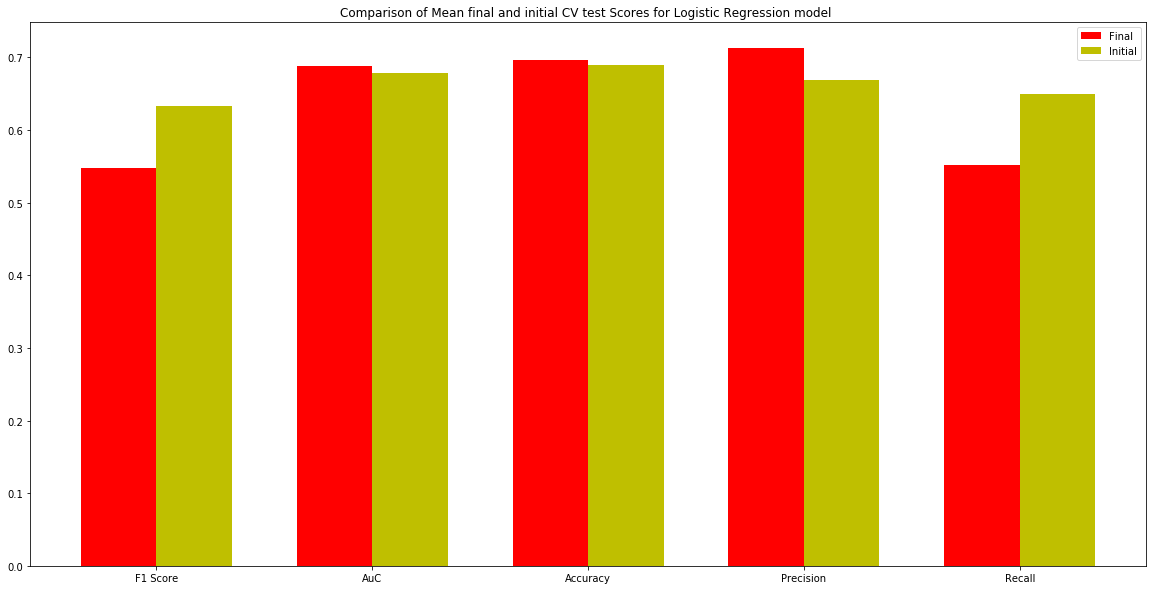

,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.547597,0.688262,0.696109,0.712815,0.55154


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.632667,0.678537,0.689982,0.66875,0.649996


In [61]:
N = 5

fig, ax = plt.subplots(figsize=(20,10))

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, p2lrBestFitModelCVTestResults.mean(), width, color='r', bottom=0)


p2 = ax.bar(ind + width, p2lrInitialModelCVTestResults.mean(), width, color='y', bottom=0)

ax.set_title('Comparison of Mean final and initial CV test Scores for Logistic Regression model ')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('F1 Score', 'AuC', 'Accuracy', 'Precision', 'Recall'))

ax.legend((p1[0], p2[0]), ('Final', 'Initial'))
ax.autoscale_view()

plt.show()

display(pd.DataFrame(p2lrBestFitModelCVTestResults.mean()).T)
display(pd.DataFrame(p2lrInitialModelCVTestResults.mean()).T)

**Comparing all scores of our Best Fit model with the Initial model, in the above plot for Logistic Regression, scores have mostly improved.Recall is reduced a bit but our main measure for this task is accuracy which has improved.**

#### Task 2 Model 2 : Random Forest Model

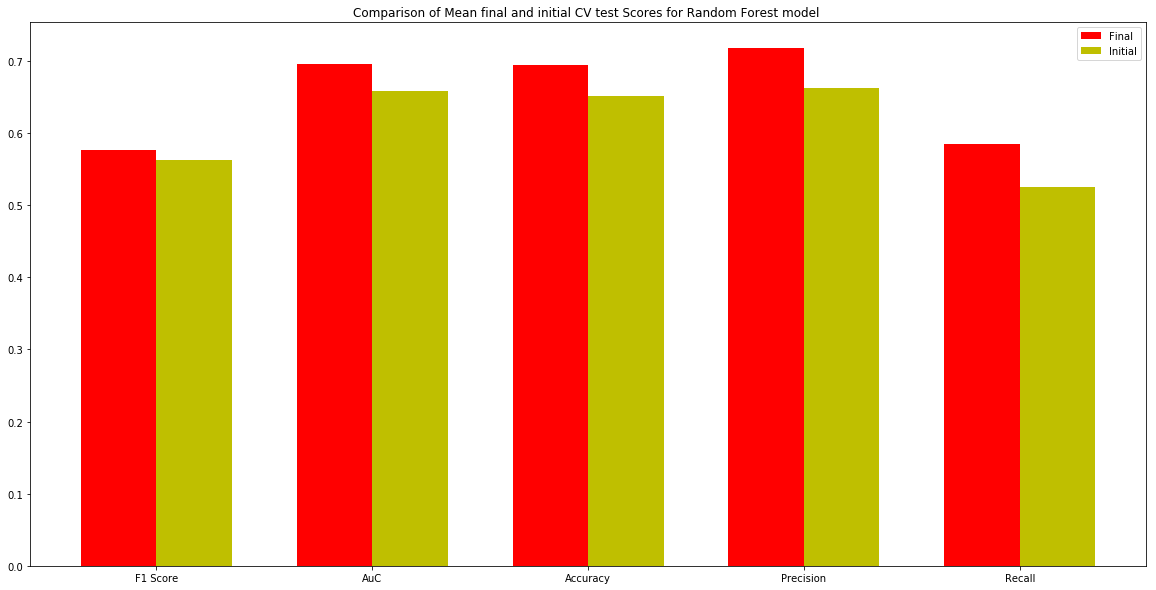

,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.577023,0.695651,0.694627,0.717628,0.584089


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.562516,0.658066,0.650966,0.66192,0.525598


In [60]:
N = 5

fig, ax = plt.subplots(figsize=(20,10))

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, RFBestFitModelCVTestResults.mean(), width, color='r', bottom=0)


p2 = ax.bar(ind + width, RFInitialModelCVTestResults.mean(), width, color='y', bottom=0)

ax.set_title('Comparison of Mean final and initial CV test Scores for Random Forest model ')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('F1 Score', 'AuC', 'Accuracy', 'Precision', 'Recall'))

ax.legend((p1[0], p2[0]), ('Final', 'Initial'))
ax.autoscale_view()

plt.show()

display(pd.DataFrame(RFBestFitModelCVTestResults.mean()).T)
display(pd.DataFrame(RFInitialModelCVTestResults.mean()).T)

**Comparing all scores of our Best Fit model with the Initial model, in the above plot for Random Forest, all scores have  improved.**

#### Task 2 Model 3 : XGBoost Model

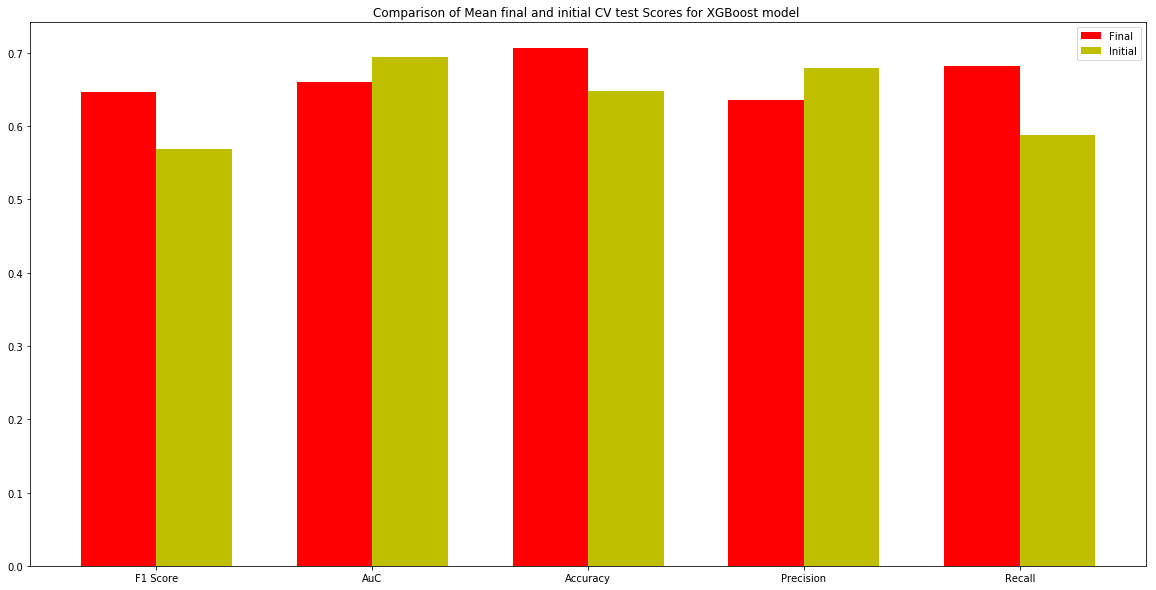

,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.646438,0.660162,0.70635,0.634876,0.681924


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.568348,0.694107,0.648354,0.678867,0.588384


In [59]:
N = 5

fig, ax = plt.subplots(figsize=(20,10))

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, XGBBestFitModelCVTestResults.mean(), width, color='r', bottom=0)


p2 = ax.bar(ind + width, XGBInitialModelCVTestResults.mean(), width, color='y', bottom=0)

ax.set_title('Comparison of Mean final and initial CV test Scores for XGBoost model ')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('F1 Score', 'AuC', 'Accuracy', 'Precision', 'Recall'))

ax.legend((p1[0], p2[0]), ('Final', 'Initial'))
ax.autoscale_view()

plt.show()

display(pd.DataFrame(XGBBestFitModelCVTestResults.mean()).T)
display(pd.DataFrame(XGBInitialModelCVTestResults.mean()).T)

**Comparing all scores of our Best Fit model with the Initial model, in the above plot for Logistic Regression, scores have mostly improved.AUC and Precision is reduced a bit but our main measure for this task is accuracy which has improved.**

________
<a href="#top">Back to Top</a>
<a id="tsk2_ModelEval5"></a>
## Task 2 : Model and Evaluation 5 

In [44]:
t = 2.26 / np.sqrt(10)

## Compare Logistic Regression and Random Forest Best Models
acc1 = p2lrBestFitModelCVTestResults['test_Accuracy']
acc2 = RFBestFitModelCVTestResults['test_Accuracy']

e = (1-acc1)-(1-acc2)
stdtot = np.std(e)

dbar = np.mean(e)
print("Compare Logistic Regression and Random Forest Best Models")
print("==========================================================")
print ('Range of:', dbar-t*stdtot,dbar+t*stdtot )
print (np.mean(acc1), np.mean(acc2))
print (dbar/stdtot)
print()

## Compare Logistic Regression and XGBoost Best Models
acc1 = p2lrBestFitModelCVTestResults['test_Accuracy']
acc2 = XGBBestFitModelCVTestResults['test_Accuracy']

e = (1-acc1)-(1-acc2)
stdtot = np.std(e)

dbar = np.mean(e)
print("Compare Logistic Regression and XGBoost Best Models")
print("==========================================================")
print ('Range of:', dbar-t*stdtot,dbar+t*stdtot )
print (np.mean(acc1), np.mean(acc2))
print (dbar/stdtot)
print()

## Compare Random Forest and XGBoost Best Models
acc1 = RFBestFitModelCVTestResults['test_Accuracy']
acc2 = XGBBestFitModelCVTestResults['test_Accuracy']

e = (1-acc1)-(1-acc2)
stdtot = np.std(e)

dbar = np.mean(e)
print("Compare Random Forest and XGBoost Best Models")
print("==========================================================")
print ('Range of:', dbar-t*stdtot,dbar+t*stdtot )
print (np.mean(acc1), np.mean(acc2))
print (dbar/stdtot)





Compare Logistic Regression and Random Forest Best Models
Range of: -0.02557748658263166 0.02261352098731311
0.6961093647112042 0.694627381913545
-0.04395573948769182

Compare Logistic Regression and XGBoost Best Models
Range of: -0.03302202168469786 0.05350420610668021
0.6961093647112042 0.7063504569221954
0.16917529435198034

Compare Random Forest and XGBoost Best Models
Range of: -0.03516750981008533 0.05861365982738623
0.694627381913545 0.7063504569221954
0.17867522334112074


**From the t-tests performed above on the accuracy values of the best version of each model, 95% interval includes 0, implying that the models are not statistically different. Hence we can consider any 1 of the model to evaluate the feature importances.** 

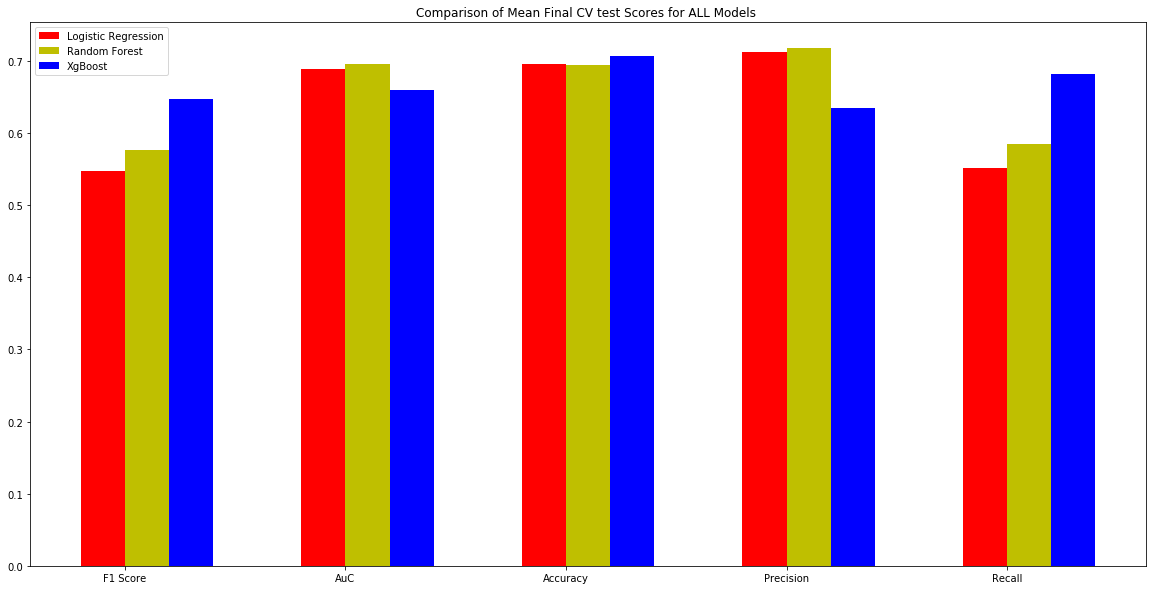

In [58]:
N = 5

fig, ax = plt.subplots(figsize=(20,10))

ind = np.arange(N)    # the x locations for the groups
width = 0.20         # the width of the bars
p1 = ax.bar(ind, p2lrBestFitModelCVTestResults.mean(), width, color='r', bottom=0)

p2 = ax.bar(ind + width, RFBestFitModelCVTestResults.mean(), width, color='y', bottom=0)

p3 = ax.bar(ind + 2*width, XGBBestFitModelCVTestResults.mean(), width, color='b', bottom=0)

ax.set_title('Comparison of Mean Final CV test Scores for ALL Models ')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('F1 Score', 'AuC', 'Accuracy', 'Precision', 'Recall'))

ax.legend((p1[0], p2[0], p3[0]), ('Logistic Regression', 'Random Forest', 'XgBoost'))
ax.autoscale_view()

plt.show()

Making side by side comparisons of all the scores for all 3 best fitted models, chosen evaluation metric **accuracy** is almost same, visually matching the results from our t-tests . However there is some difference in the Precision , Recall and F1Score values though between the models, but we have not considered these as our evaluation metric. **The overall accuracy of our all our models is relatively low and this can be explained by the fact that the original dataset was collected for predicting bank promotion subscription so many variables that are relevant to predicting whether a person would sign for a home loan, variables as monthly disposable income, Income/Expenditure ratio, family size etc as not present in this dataset.** For futhur boost in model accuracy for this model, the before mentioned features should be collected. Furthur Gains in accuracy could also be achieved via advanced feature engineering. 

________
<a href="#top">Back to Top</a>
<a id="tsk2_ModelEval6"></a>
## Task 2 : Model and Evaluation 6
#### Feature Importance on the Best Model

Based on the t-tests on the best fit models , we know that the models are not statistically different.We have considered best model from **Random Forest** to plot the variable importances

In [55]:
# Fitting the model using Best parameter 
rfRandomGridEst = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators = 194, min_samples_split = 76, min_samples_leaf = 19, \
                                                                         max_features = 'log2', max_depth = 29, class_weight = "balanced", \
                                                                         criterion = 'entropy', bootstrap = False,random_state=999, n_jobs=-1))

rfRandomGridEst.fit(X,y=y)


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestclassifier', RandomForestClassifier(bootstrap=False, class_weight='balanced',
            criterion='entropy', max_depth=29, max_features='log2',
            max_leaf_nodes=None, min_impurity_decrease=...mators=194, n_jobs=-1, oob_score=False, random_state=999,
            verbose=0, warm_start=False))])

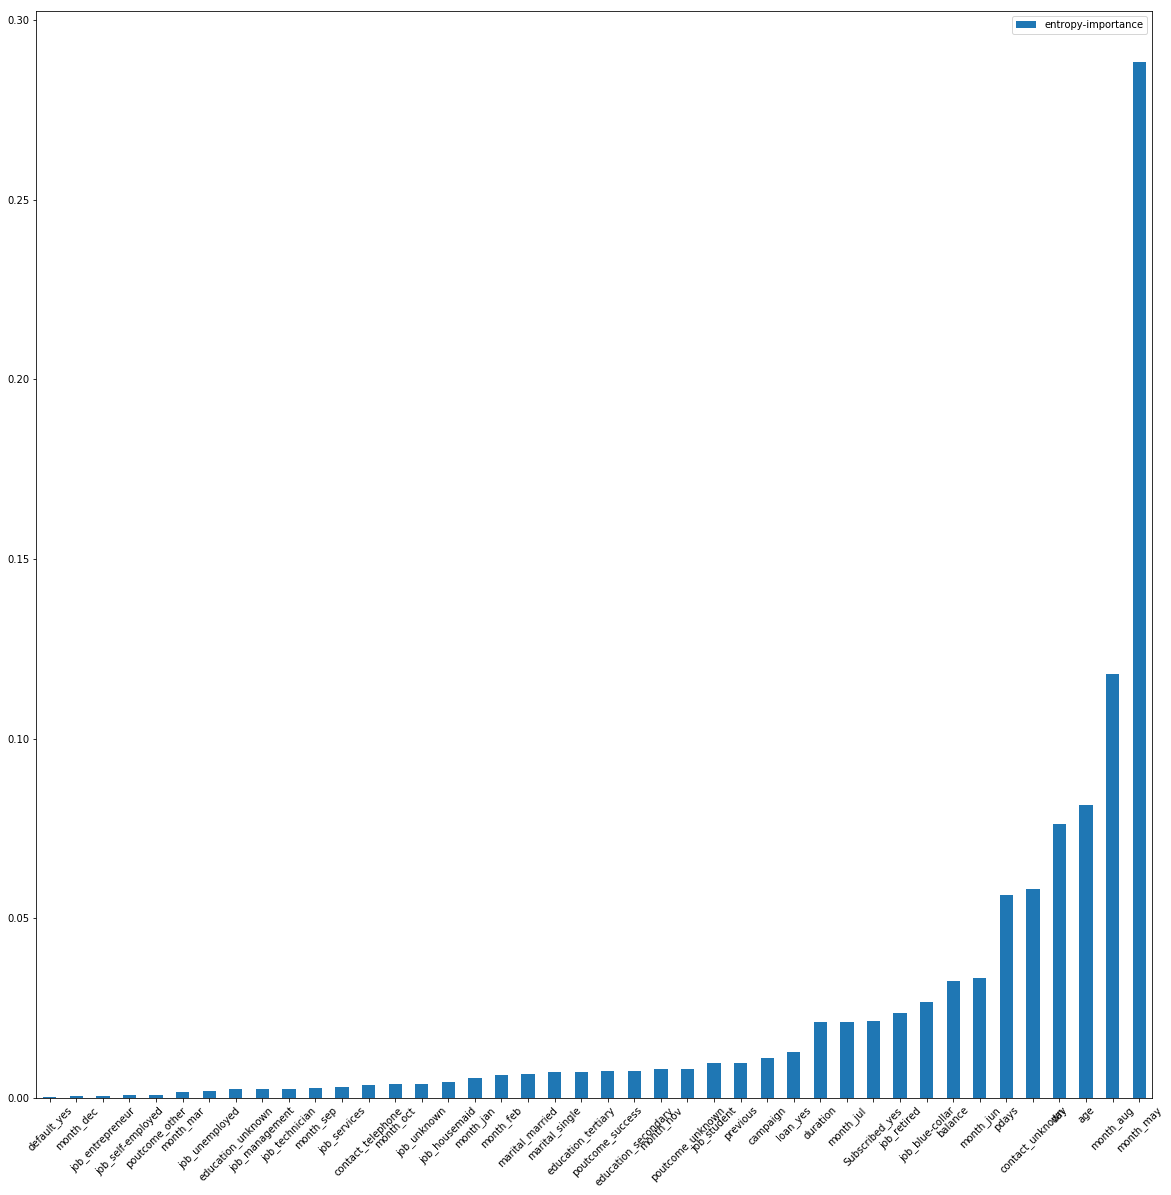

In [57]:
import pandas as pd
%matplotlib inline
#do code to support model
#"data" is the X dataframe and model is the SKlearn object


classifier_model = rfRandomGridEst.named_steps['randomforestclassifier']

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(bankPromoModel_hsng_Df.columns, classifier_model.feature_importances_):
   feats[feature] = importance #add the name/value pair

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'entropy-importance'})
importances.sort_values(by='entropy-importance').plot(kind='bar', rot=45, figsize = (20, 20))

**Based on the magnitude of the coefficients in above plot features- Month_May, Month_Aug, Age, Contact_Unknown , PDays and month_jun are among the most important features.**

As identified during the EDA in Lab 1, the clients could be contacted over a few months, but each of the months listed corresponds to the last month the client was contacted. The months that affect the housing model the most are May and August. May and August were some of the highest proportions of the data.  These months also had some of the most working days as identified in Lab 1. **_It is necessary to note the difference between the housing and the subscribe models - the subscribe model does not weight any months with a high coefficient until the tenth variable.**

**Contact Unknown** is considered the third most important feature.  As we discovered in the EDA in lab 1, our selections for this were Cellular, telephone and unknown.  Contact_unknown made up 30% of the data.  This is one of the features that we wish we had more information about.  We could not impute the data since we lacked additional information and we could not ignore the unknown status since it was a large portion of the contact method.Howver it is known that the contact methods were voice and so have to be either phone or cellular.

The **Age** of the client, which is the first non-month feature, is in the top 5. The age of prospective clients for home loans sounds as if that feature would be significant, _for example a 30 year old person is more likely to have a home loan as compared to an 18 year old._

**Pdays** is the last feature we will mention as significant. days is the number of days of contact between the current marketing campaign and a previous campaign. From the EDA in Lab 1, we discovered that 80% of the clients in this campaign were new to marketing campaigns from the bank. The right skewness of the data for this feature could have affected the singifance into the model.

Amongst the least important variables are **default_yes , month_dec , job_entrepreneur , job_self-employed**. From our earlier Chi-Sq tests we had noticed that _default_yes_ was not an important feature. Since the model didnot show drastic improvement without it either, and also this is not a high-dimensionality dataset, decision was made to leave the feature in the model. For _month-dec_, it can be considered that it being a holiday month,  most people would be interested in other activities and celebrations and may not be considering serious issues as housing loans. Also it is time for wrapping up annual income to make new family budget for next year.
_job_entrepreneur and job_self-employed_, well entrepreneurs are expected to have high salaries and there is a high chance they are not looking for loans.On the other hand self-employed people could be mostly running on low budget not involving plans to purchase loans. 

________
<a href="#top">Back to Top</a>
<a id="tsk2_Deployment"></a>
## Deployment of Models for Task 1 and Task 2

The models that we have derived, for both home loans and subscription to term deposits,  are of **interest** to the bank.  Banks, similar to other businesses, have a business case to increase customer base (or increase what current customers use the bank for) without increasing (or decrease) their customer acquisition cost.  We have focused on building predictive models for existing bank customers and would not affect the acquisiton cost for new customers.

In order to **benefit** the bank's sales, the banks could use these models to increase probability of the customers they phone that ultimately will subscribe to a term deposit or invest in a home.  This reduces the number of phone calls, reduces the hours that are paid to the bankers to make those phone calls and increases the probaility of the banks earning interest on the term deposits or home loans.

**We would encourage the bankers to continue to enter the data in order to refine the model at a later date.**  Market changes could effect the models' accuracy and continuing to collect data will make it simplier to refine for the next campaign.  Since the models do not need to be used for each phone call, the use of the model can be deployed to a few people in the bank and then the list of more likely candidates be distributed to the bankers that will be contacting the existing customers.  The use of the models could also be added to the process during signing up new customers.  The bank could run the model on the attributes of the new customer and then make offers on the spot if the model shows the determined level of probability. 

The attribute that we believe would refine the models even further and increase the models' performance is income.  Income is important to home loans as it shows purchasing power on average homes in the neighborhood.  Income is important to term deposits as it is an indicator on disposable income of the customers to save more. 

**The model could be refined in any time intervals, but at a minimum the model should be updated significant change in the market or national interest rate adjustments.**

_Note:  We have no evidence that these models can be extrapolated to other banks in Portugal or other countries.  (Despite us not knowing the randomness of the sample or the calls, we are going to assume that they were random in this case and we can use the model to predict the subscribe or housing outcomes to the entire bank population)._


## Exceptional Work

- We have explored a total of 4 main models , out of which Logistic Regression , SVM and Random Forest have been discussed in class. For the fourth one we have explored **XGBoost**. From our EDA phase we have seen that both the chosen response variables are overlapping, making KNN not a good choice for them. XGBoost is a popular algorithm and regrdless of the data type ( regression or classification), it is well known to provide better solutions than other ML algorithms.

- **GridSearch** is used for most of the models for tuning of Hyper parameters, for some linear Gridsearches are performed , while for others **Randomized Gridsearch** have been performed to narrow down best parameters for further Grid Searches. This was done for more complicated models taking up high computation power and time.

- Talking about high computation power and long hours of running Gridsearches, team have set up multiple **Google VMs** using **24-vCPUs** , maximum available limit without special consent  as well as **64vCPU** machine upon special request to Google team for the datascience school project. 

- We faced **memory leak issue** running GridSearch using anaconda. Further exploring the issue ,which is coming from numpy and joblib ( we used n_jobs=-1 so that all CPU cores are utilized). The reference to the issue is at:

*************************************************************************************
https://github.com/joblib/joblib/issues/721: Memory Leak in joblib.Parallel #721  
https://github.com/joblib/joblib/issues/781:  Large memory growth with parallel on numpy arrays. #781
**********************************************************************************************

   **The fix for both the issues is present in numpy 1.16.1 that is release last month.**  But installing this in anaconda environment is removing scikit-learn  and scipy libraries.**Hence Traditional python datascience rack was deployed on Google VMs to avoid the anaconda latest version errors while performing these extensive GridSearches.**

- **Multiple methods of Feature Elimination** have been used for both dataset - lasso shrinkage, coefficient based approaches and model based approaches from Logistic Regression, Random Forest and LightGM . From Minilab 1 , we had noticed that lasso shrinakge gave us similar list of important features as lasso and so this technique was not explored further this time.

-  We also explored **polynomial Logistic Regression** of degree 2, along with tuning of hyper parameters using 